# 01 Health Expenditure




In [1]:
# ==========================
# 0) Setup & Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns # Import seaborn for the faceted plot
import os

# set working dir
data_path = "/content/drive/MyDrive/Use"

# สร้าง folder สำหรับเก็บรูป
if not os.path.exists("figures"):
    os.makedirs("figures")

# ==========================
# 1) Load datasets

# Dataset:
# - health_expense_country.csv
# - gdp_per_capita.csv

df_health = pd.read_csv("/content/drive/MyDrive/Use/health_expense_country.csv")
df_gdp = pd.read_csv("/content/drive/MyDrive/Use/gdp_per_capita.csv")

print("Health dataset shape:", df_health.shape)
print("GDP dataset shape:", df_gdp.shape)

# preview
df_health.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Health dataset shape: (266, 21)
GDP dataset shape: (532, 19)


Country Name Country Code  \
0                        World          WLD   
1                  Afghanistan          AFG   
2  Africa Eastern and Southern          AFE   
3   Africa Western and Central          AFW   
4                      Albania          ALB   

                                              Region          IncomeGroup  \
0                                                  0                    0   
1  Middle East, North Africa, Afghanistan & Pakistan           Low income   
2                                                  0                    0   
3                                                  0                    0   
4                              Europe & Central Asia  Upper middle income   

                                         Series Name        Series Code  \
0  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
1  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
2  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
3  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
4  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013]  ... 2015 [YR2015]  \
0   900.1769017   974.1274671   982.0741499    992.234653  ...   973.1539973   
1   46.42438889   52.18721771   52.45247269   56.16043472  ...   59.91960526   
2    104.119647   112.2783817   109.0685562   104.7767173  ...   90.80057087   
3   59.63198718   65.36715007    67.9295613   75.42266559  ...   70.66991392   
4   253.9824677   273.7529297    260.683197   276.0765686  ...   253.9334717   

  2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020]  \
0   990.8286891   1027.118651    1066.64776   1084.163977    1158.07093   
1   61.37234497   66.82388306   71.22509003    74.0642395    80.0892334   
2   85.89921738   90.01315049   90.07565325   87.29824614   81.55189502   
3   61.44808881   58.22151491   56.12426456   59.06952771   64.40742275   
4   275.4367676    295.523468   349.2112732   366.3401489   396.1747742   

  2021 [YR2021] 2022 [YR2022] 2023 [YR2023] 2024 [YR2024]  
0   1245.909858   1235.603151            ..            ..  
1   81.52112579    80.6516037            ..            ..  
2   92.38657488   92.58152097            ..            ..  
3   72.24109467   74.42135122            ..            ..  
4   465.5704346   414.3502502            ..            ..  

[5 rows x 21 columns]

In [2]:
# ==========================
# --- Step 2: Explore dataset ---

# ตั้งค่าให้ pandas แสดงครบ
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 1) ดู 5 แถวแรกของแต่ละ dataset
print("Health Expenditure dataset preview:")
display(df_health.head())

print("\nGDP per capita dataset preview:")
display(df_gdp.head())

# 2) ดูสรุปโครงสร้าง dataset
print("\n--- Info: Health Expenditure ---")
df_health.info()

print("\n--- Info: GDP per capita ---")
df_gdp.info()

# 3) ตรวจสอบ missing values
print("\n--- Missing values (Health Expenditure) ---")
display(df_health.isnull().sum())

print("\n--- Missing values (GDP per capita) ---")
display(df_gdp.isnull().sum())

Health Expenditure dataset preview:


Country Name Country Code  \
0                        World          WLD   
1                  Afghanistan          AFG   
2  Africa Eastern and Southern          AFE   
3   Africa Western and Central          AFW   
4                      Albania          ALB   

                                              Region          IncomeGroup  \
0                                                  0                    0   
1  Middle East, North Africa, Afghanistan & Pakistan           Low income   
2                                                  0                    0   
3                                                  0                    0   
4                              Europe & Central Asia  Upper middle income   

                                         Series Name        Series Code  \
0  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
1  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
2  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
3  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
4  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   900.1769017   974.1274671   982.0741499    992.234653   1014.944203   
1   46.42438889   52.18721771   52.45247269   56.16043472   60.04951096   
2    104.119647   112.2783817   109.0685562   104.7767173   98.49932875   
3   59.63198718   65.36715007    67.9295613   75.42266559   78.72483058   
4   253.9824677   273.7529297    260.683197   276.0765686   293.1267395   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   973.1539973   990.8286891   1027.118651    1066.64776   1084.163977   
1   59.91960526   61.37234497   66.82388306   71.22509003    74.0642395   
2   90.80057087   85.89921738   90.01315049   90.07565325   87.29824614   
3   70.66991392   61.44808881   58.22151491   56.12426456   59.06952771   
4   253.9334717   275.4367676    295.523468   349.2112732   366.3401489   

  2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023] 2024 [YR2024]  
0    1158.07093   1245.909858   1235.603151            ..            ..  
1    80.0892334   81.52112579    80.6516037            ..            ..  
2   81.55189502   92.38657488   92.58152097            ..            ..  
3   64.40742275   72.24109467   74.42135122            ..            ..  
4   396.1747742   465.5704346   414.3502502            ..            ..


GDP per capita dataset preview:


Country Name Country Code                   Series Name  \
0                        World          WLD  GDP per capita (current US$)   
1                        World          WLD             Population, total   
2                  Afghanistan          AFG  GDP per capita (current US$)   
3                  Afghanistan          AFG             Population, total   
4  Africa Eastern and Southern          AFE  GDP per capita (current US$)   

      Series Code 2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013]  \
0  NY.GDP.PCAP.CD   9530.010809   10471.53643   10570.75881   10744.62036   
1     SP.POP.TOTL    7001266876    7087120034    7176968877    7265970522   
2  NY.GDP.PCAP.CD   560.6215055   606.6946763   651.4171345   637.0870991   
3     SP.POP.TOTL      28284089      29347708      30560034      31622704   
4  NY.GDP.PCAP.CD   1601.727651   1735.584923     1702.9691   1673.221102   

  2014 [YR2014] 2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018]  \
0   10911.80674   10175.40942   10221.36598   10765.26622    11326.9339   
1    7354183367    7441826877    7529066617    7614748582    7697492379   
2   625.0549418   565.5697304   522.0822156   525.4697709   491.3372214   
3      32792523      33831764      34700612      35688935      36743039   
4   1656.167709    1479.61526   1329.807285   1520.212231   1538.901679   

  2019 [YR2019] 2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]  \
0   11376.82334   10963.17564   12418.56592   12819.74484   13263.61955   
1    7778303912    7855075060    7920861888    7990399768    8064976601   
2   496.6025043   510.7870634   356.4962141   357.2611528   413.7578947   
3      37856121      39068979      40000412      40578842      41454761   
4   1493.817938    1344.10321   1522.393346   1628.318944   1568.159891   

  2024 [YR2024]  
0   13673.00396  
1    8142056446  
2            ..  
3      42647492  
4   1673.841139


--- Info: Health Expenditure ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   266 non-null    object
 1   Country Code   266 non-null    object
 2   Region         265 non-null    object
 3   IncomeGroup    265 non-null    object
 4   Series Name    266 non-null    object
 5   Series Code    266 non-null    object
 6   2010 [YR2010]  266 non-null    object
 7   2011 [YR2011]  266 non-null    object
 8   2012 [YR2012]  266 non-null    object
 9   2013 [YR2013]  266 non-null    object
 10  2014 [YR2014]  266 non-null    object
 11  2015 [YR2015]  266 non-null    object
 12  2016 [YR2016]  266 non-null    object
 13  2017 [YR2017]  266 non-null    object
 14  2018 [YR2018]  266 non-null    object
 15  2019 [YR2019]  266 non-null    object
 16  2020 [YR2020]  266 non-null    object
 17  2021 [YR2021]  266 non-null    object
 

Country Name     0
Country Code     0
Region           1
IncomeGroup      1
Series Name      0
Series Code      0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
2023 [YR2023]    0
2024 [YR2024]    0
dtype: int64


--- Missing values (GDP per capita) ---


Country Name     0
Country Code     0
Series Name      0
Series Code      0
2010 [YR2010]    0
2011 [YR2011]    0
2012 [YR2012]    0
2013 [YR2013]    0
2014 [YR2014]    0
2015 [YR2015]    0
2016 [YR2016]    0
2017 [YR2017]    0
2018 [YR2018]    0
2019 [YR2019]    0
2020 [YR2020]    0
2021 [YR2021]    0
2022 [YR2022]    0
2023 [YR2023]    0
2024 [YR2024]    0
dtype: int64

In [3]:
# ==========================
# --- Step 3: Data Cleaning ---

# ระบุ columns ที่จะลบทิ้ง
cols_to_drop = ["Series Code", "2023 [YR2023]", "2024 [YR2024]"]

# --- 1) Drop columns ที่ไม่ต้องการ ---
columns_to_drop = ['Series Code','2023 [YR2023]', '2024 [YR2024]']
df_health = df_health.drop(columns=columns_to_drop, errors='ignore')
df_gdp = df_gdp.drop(columns=columns_to_drop, errors='ignore')

# --- 2) Drop rows where 'Region' or 'IncomeGroup' is '0' or '#N/A' in df_health ---
df_health = df_health[
    (~df_health['Region'].isin(['0', '#N/A'])) &
    (~df_health['IncomeGroup'].isin(['0', '#N/A'])) &
    (df_health['Country Name'] != 'Not classified')]

# -- 3) Drop rows where 'Series Name' is 'Population, total' in df_gdp ---
df_gdp = df_gdp[df_gdp['Series Name'] != 'Population, total']

# --- 3) Check ขนาด dataset หลัง cleaning ---
print("✅ Cleaning completed.")

print("\n--- Health Expenditure (after cleaning) ---")
print(f"Shape: {df_health.shape[0]} rows × {df_health.shape[1]} columns")
display(df_health.head())

print("\n--- GDP per Capita (after cleaning) ---")
print(f"Shape: {df_gdp.shape[0]} rows × {df_gdp.shape[1]} columns")
display(df_gdp.head())

✅ Cleaning completed.

--- Health Expenditure (after cleaning) ---
Shape: 215 rows × 18 columns


Country Name Country Code  \
1     Afghanistan          AFG   
4         Albania          ALB   
5         Algeria          DZA   
6  American Samoa          ASM   
7         Andorra          AND   

                                              Region          IncomeGroup  \
1  Middle East, North Africa, Afghanistan & Pakistan           Low income   
4                              Europe & Central Asia  Upper middle income   
5  Middle East, North Africa, Afghanistan & Pakistan  Upper middle income   
6                                East Asia & Pacific          High income   
7                              Europe & Central Asia          High income   

                                         Series Name 2010 [YR2010]  \
1  Current health expenditure per capita (current...   46.42438889   
4  Current health expenditure per capita (current...   253.9824677   
5  Current health expenditure per capita (current...   227.9539642   
6  Current health expenditure per capita (current...            ..   
7  Current health expenditure per capita (current...   3277.785156   

  2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014] 2015 [YR2015]  \
1   52.18721771   52.45247269   56.16043472   60.04951096   59.91960526   
4   273.7529297    260.683197   276.0765686   293.1267395   253.9334717   
5   285.5020752   340.0913391   337.5736084   366.5867004   296.7682495   
6            ..            ..            ..            ..            ..   
7   3550.908203   2785.188965   2887.025879   3001.196045   2672.264648   

  2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019] 2020 [YR2020]  \
1   61.37234497   66.82388306   71.22509003    74.0642395    80.0892334   
4   275.4367676    295.523468   349.2112732   366.3401489   396.1747742   
5   265.5343933   270.9326172   271.5377808   242.0700226   211.0727692   
6            ..            ..            ..            ..            ..   
7   2769.152832   2876.178711   3158.136475   3021.432617   3282.817383   

  2021 [YR2021] 2022 [YR2022]  
1   81.52112579    80.6516037  
4   465.5704346   414.3502502  
5    208.526825   179.6968842  
6            ..            ..  
7   3535.989746   3192.315674


--- GDP per Capita (after cleaning) ---
Shape: 266 rows × 16 columns


Country Name Country Code                   Series Name  \
0                        World          WLD  GDP per capita (current US$)   
2                  Afghanistan          AFG  GDP per capita (current US$)   
4  Africa Eastern and Southern          AFE  GDP per capita (current US$)   
6   Africa Western and Central          AFW  GDP per capita (current US$)   
8                      Albania          ALB  GDP per capita (current US$)   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   9530.010809   10471.53643   10570.75881   10744.62036   10911.80674   
2   560.6215055   606.6946763   651.4171345   637.0870991   625.0549418   
4   1601.727651   1735.584923     1702.9691   1673.221102   1656.167709   
6   1663.966937   1844.198595   1941.369556   2131.662067   2221.010665   
8   4149.144699   4465.709143   4222.347099    4420.23462   4602.230514   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   10175.40942   10221.36598   10765.26622    11326.9339   11376.82334   
2   565.5697304   522.0822156   525.4697709   491.3372214   496.6025043   
4    1479.61526   1329.807285   1520.212231   1538.901679   1493.817938   
6   1860.727694   1630.039447    1574.23056    1720.14028   1798.340685   
8   3981.726623   4168.375445   4614.047969   5365.488802   5460.430509   

  2020 [YR2020] 2021 [YR2021] 2022 [YR2022]  
0   10963.17564   12418.56592   12819.74484  
2   510.7870634   356.4962141   357.2611528  
4    1344.10321   1522.393346   1628.318944  
6   1680.039332   1765.954788   1796.668633  
8     5370.7775   6413.282808   6846.426694

In [4]:
# ==========================
# --- Step 4: Reshape (Wide → Long) & Merge ---

# --- 1) Reshape df_health ---
df_health_long = pd.melt(
    df_health,
    id_vars=['Country Name','Country Code','Region','IncomeGroup','Series Name'],
    value_vars=[col for col in df_health.columns if '[YR' in col],
    var_name='Year',
    value_name='Health_Expenditure_per_Capita'
)
# แปลง Year เป็น int
df_health_long['Year'] = df_health_long['Year'].str.extract(r'(\d{4})').astype(int)

# --- 2) Reshape df_gdp ---
df_gdp_long = pd.melt(
    df_gdp,
    id_vars=['Country Name','Country Code','Series Name'],
    value_vars=[col for col in df_gdp.columns if '[YR' in col],
    var_name='Year',
    value_name='GDP_per_Capita'
)
df_gdp_long['Year'] = df_gdp_long['Year'].str.extract(r'(\d{4})').astype(int)

# --- 3) Merge datasets using Country Code + Year ---
df_merged = pd.merge(
    df_health_long,
    df_gdp_long[['Country Code','Year','GDP_per_Capita']],
    on=['Country Code','Year'],
    how='inner'
)

# --- 4) Convert columns to numeric ---
df_merged['Health_Expenditure_per_Capita'] = pd.to_numeric(df_merged['Health_Expenditure_per_Capita'], errors='coerce')
df_merged['GDP_per_Capita'] = pd.to_numeric(df_merged['GDP_per_Capita'], errors='coerce')

# Drop rows with NaN
df_merged = df_merged.dropna(subset=['Health_Expenditure_per_Capita','GDP_per_Capita'])
# Drop Series Name column ของ Health dataset
df_merged = df_merged.drop(columns=['Series Name'], errors='ignore')

# --- 5) Calculate HE % of GDP ---
df_merged['HE_percent_GDP'] = (df_merged['Health_Expenditure_per_Capita'] / df_merged['GDP_per_Capita']) * 100

# --- เปลี่ยนชื่อ column พร้อมใส่หน่วย ---
df_merged = df_merged.rename(columns={
    'Health_Expenditure_per_Capita': 'Health_Expenditure_per_Capita (USD per Capita)',
    'GDP_per_Capita': 'GDP_per_Capita (USD per Capita)',
    'HE_percent_GDP': 'HE_percent_GDP (%)'})

# ปรับทศนิยม 4 ตำแหน่ง สำหรับหลาย column พร้อมกัน
cols_to_round = [
    'Health_Expenditure_per_Capita (USD per Capita)',
    'GDP_per_Capita (USD per Capita)',
    'HE_percent_GDP (%)']

df_merged[cols_to_round] = df_merged[cols_to_round].round(4)

# --- 6) Check merged dataset ---
print("✅ Reshape & Merge completed.\n")
print(f"Shape: {df_merged.shape[0]} rows × {df_merged.shape[1]} columns\n")

print("--- Dataframe preview ---")
display(df_merged.head())

print("\n--- Dataset info ---")
df_merged.info()


✅ Reshape & Merge completed.

Shape: 2439 rows × 8 columns

--- Dataframe preview ---


Country Name Country Code  \
0  Afghanistan          AFG   
1      Albania          ALB   
2      Algeria          DZA   
4      Andorra          AND   
5       Angola          AGO   

                                              Region          IncomeGroup  \
0  Middle East, North Africa, Afghanistan & Pakistan           Low income   
1                              Europe & Central Asia  Upper middle income   
2  Middle East, North Africa, Afghanistan & Pakistan  Upper middle income   
4                              Europe & Central Asia          High income   
5                                 Sub-Saharan Africa  Lower middle income   

   Year  Health_Expenditure_per_Capita (USD per Capita)  \
0  2010                                         46.4244   
1  2010                                        253.9825   
2  2010                                        227.9540   
4  2010                                       3277.7852   
5  2010                                         96.9520   

   GDP_per_Capita (USD per Capita)  HE_percent_GDP (%)  
0                         560.6215              8.2809  
1                        4149.1447              6.1213  
2                        4912.7859              4.6400  
4                       42746.8310              7.6679  
5                        3597.3429              2.6951


--- Dataset info ---
<class 'pandas.core.frame.DataFrame'>
Index: 2439 entries, 0 to 2794
Data columns (total 8 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country Name                                    2439 non-null   object 
 1   Country Code                                    2439 non-null   object 
 2   Region                                          2439 non-null   object 
 3   IncomeGroup                                     2439 non-null   object 
 4   Year                                            2439 non-null   int64  
 5   Health_Expenditure_per_Capita (USD per Capita)  2439 non-null   float64
 6   GDP_per_Capita (USD per Capita)                 2439 non-null   float64
 7   HE_percent_GDP (%)                              2439 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 171.5+ KB


🌟 Top 5 countries by Health Expenditure (% of GDP):


Country Name          IncomeGroup  HE_percent_GDP (%)
1    Afghanistan           Low income             22.5750
2         Tuvalu  Upper middle income             18.3490
3          Nauru          High income             17.5568
4  United States          High income             15.9701
5          Palau          High income             13.7495

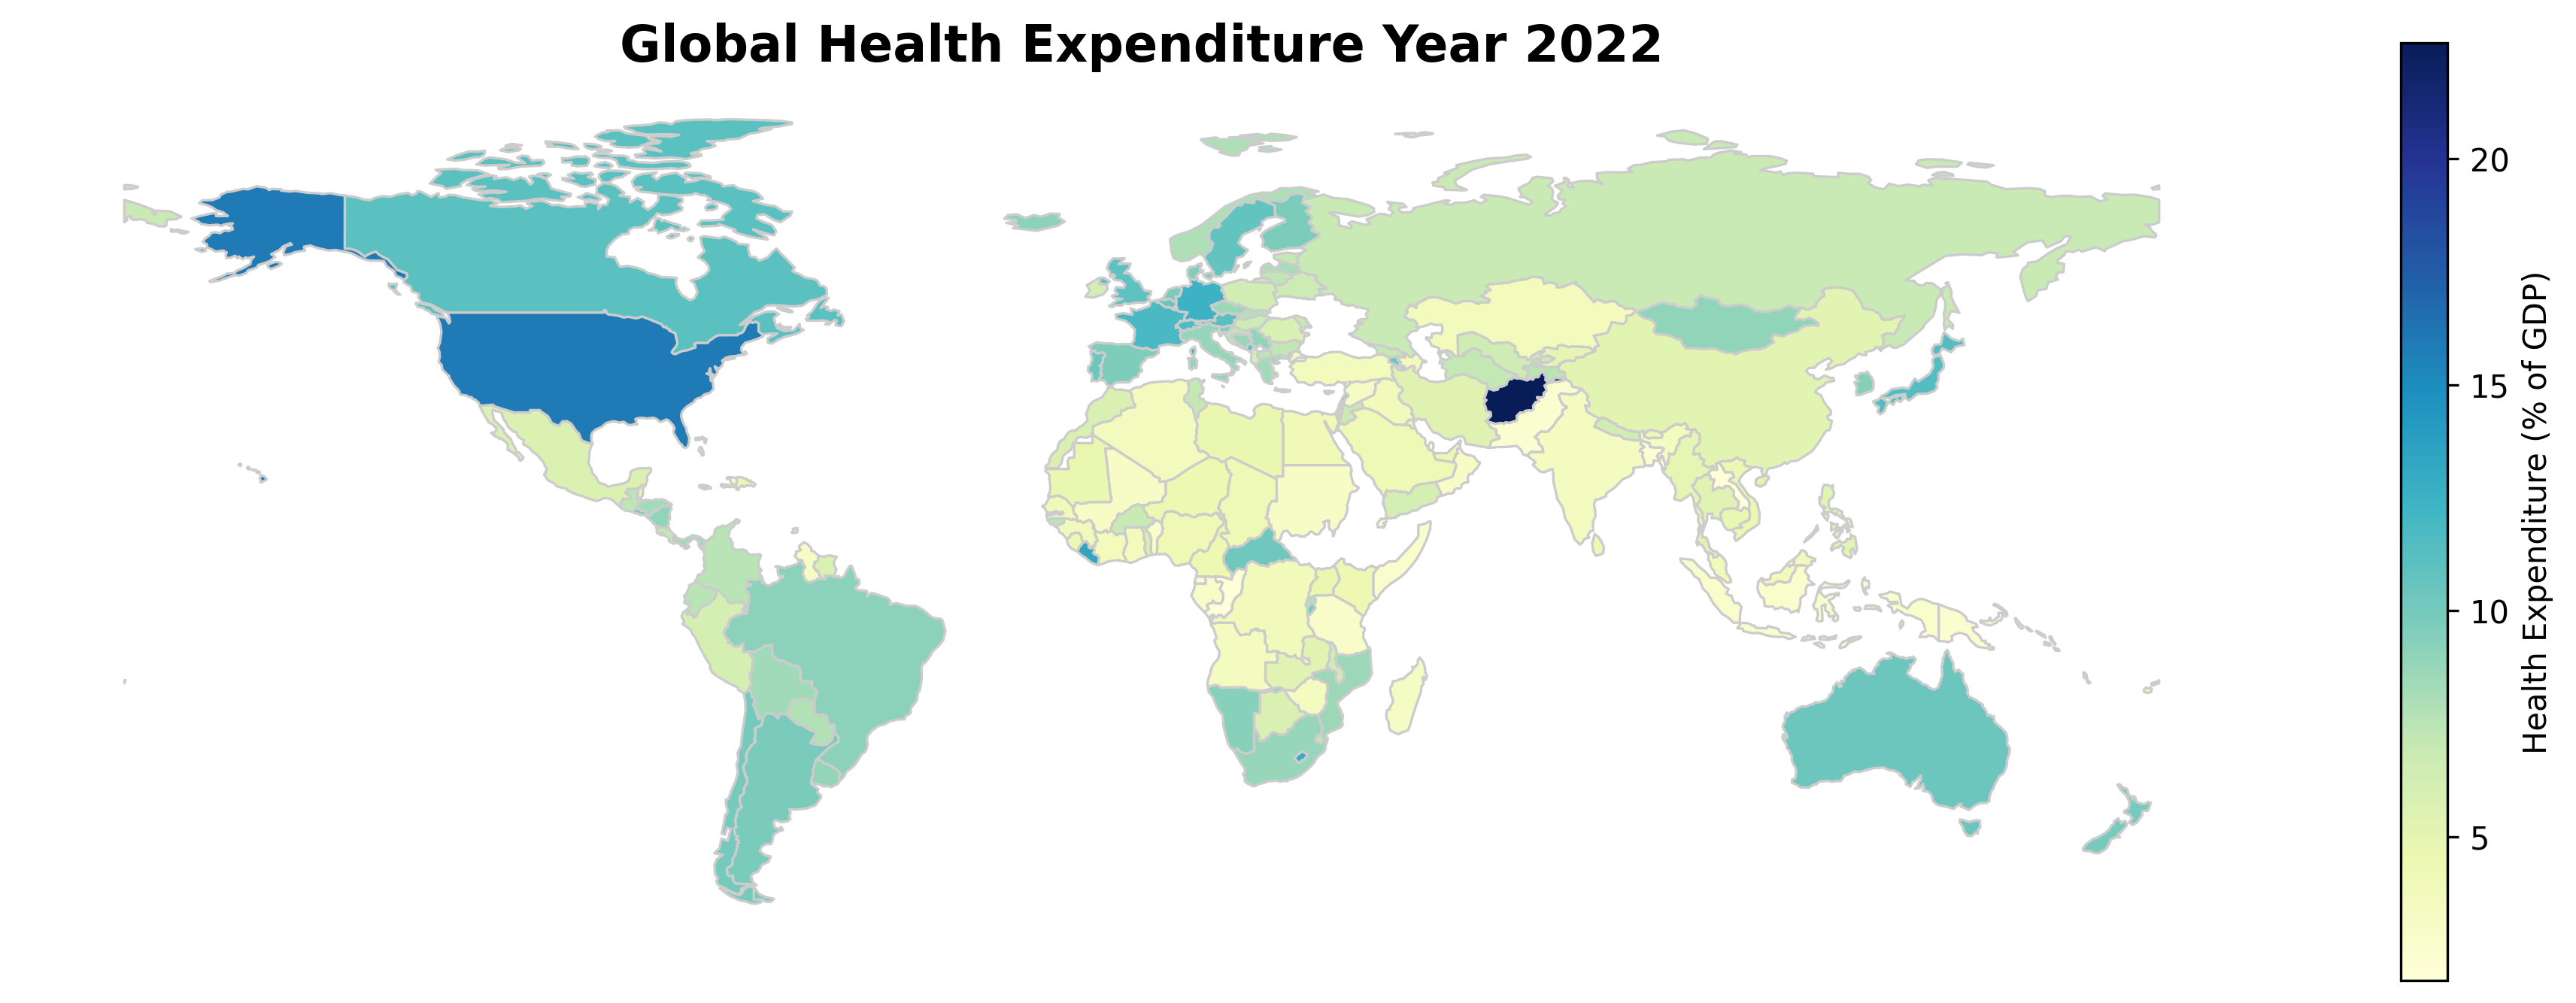

In [23]:
# ==========================
# --- Step 5a: Static Choropleth Map + Top 5 Table ---
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# --- 1) โหลด world map ---
world = gpd.read_file("https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json")

# --- 2) ใช้ latest year ของ Health Expenditure ---
latest_year = df_merged['Year'].max()
df_latest = df_merged[df_merged['Year'] == latest_year].copy()

# --- 3) Merge world map กับ HE data ผ่าน Country Code (ISO3) ---
world_map = world.merge(df_latest, left_on='id', right_on='Country Code', how='left')

# --- 4) Plot map ---
fig, ax = plt.subplots(1, 1, figsize=(16, 9), dpi=300)
world_map.plot(column='HE_percent_GDP (%)',
               cmap='YlGnBu',
               linewidth=0.8,
               edgecolor='0.8',
               legend=True,
               legend_kwds={'label': "Health Expenditure (% of GDP)",
                            'orientation': "vertical",
                            'shrink': 0.6,
                            'ticks': range(0, 21, 5)},  # 0-20% scale, tick every 5%
               ax=ax)

ax.set_title(f'Global Health Expenditure Year {latest_year}', fontsize=16, fontweight='bold')
ax.set_axis_off()

# --- 5) Top 5 countries table with IncomeGroup ---
top5 = df_latest.nlargest(5, 'HE_percent_GDP (%)')[['Country Name', 'IncomeGroup', 'HE_percent_GDP (%)']].copy()
top5.index = range(1, 6)  # set index 1-5

print("🌟 Top 5 countries by Health Expenditure (% of GDP):")
display(top5)

plt.show()

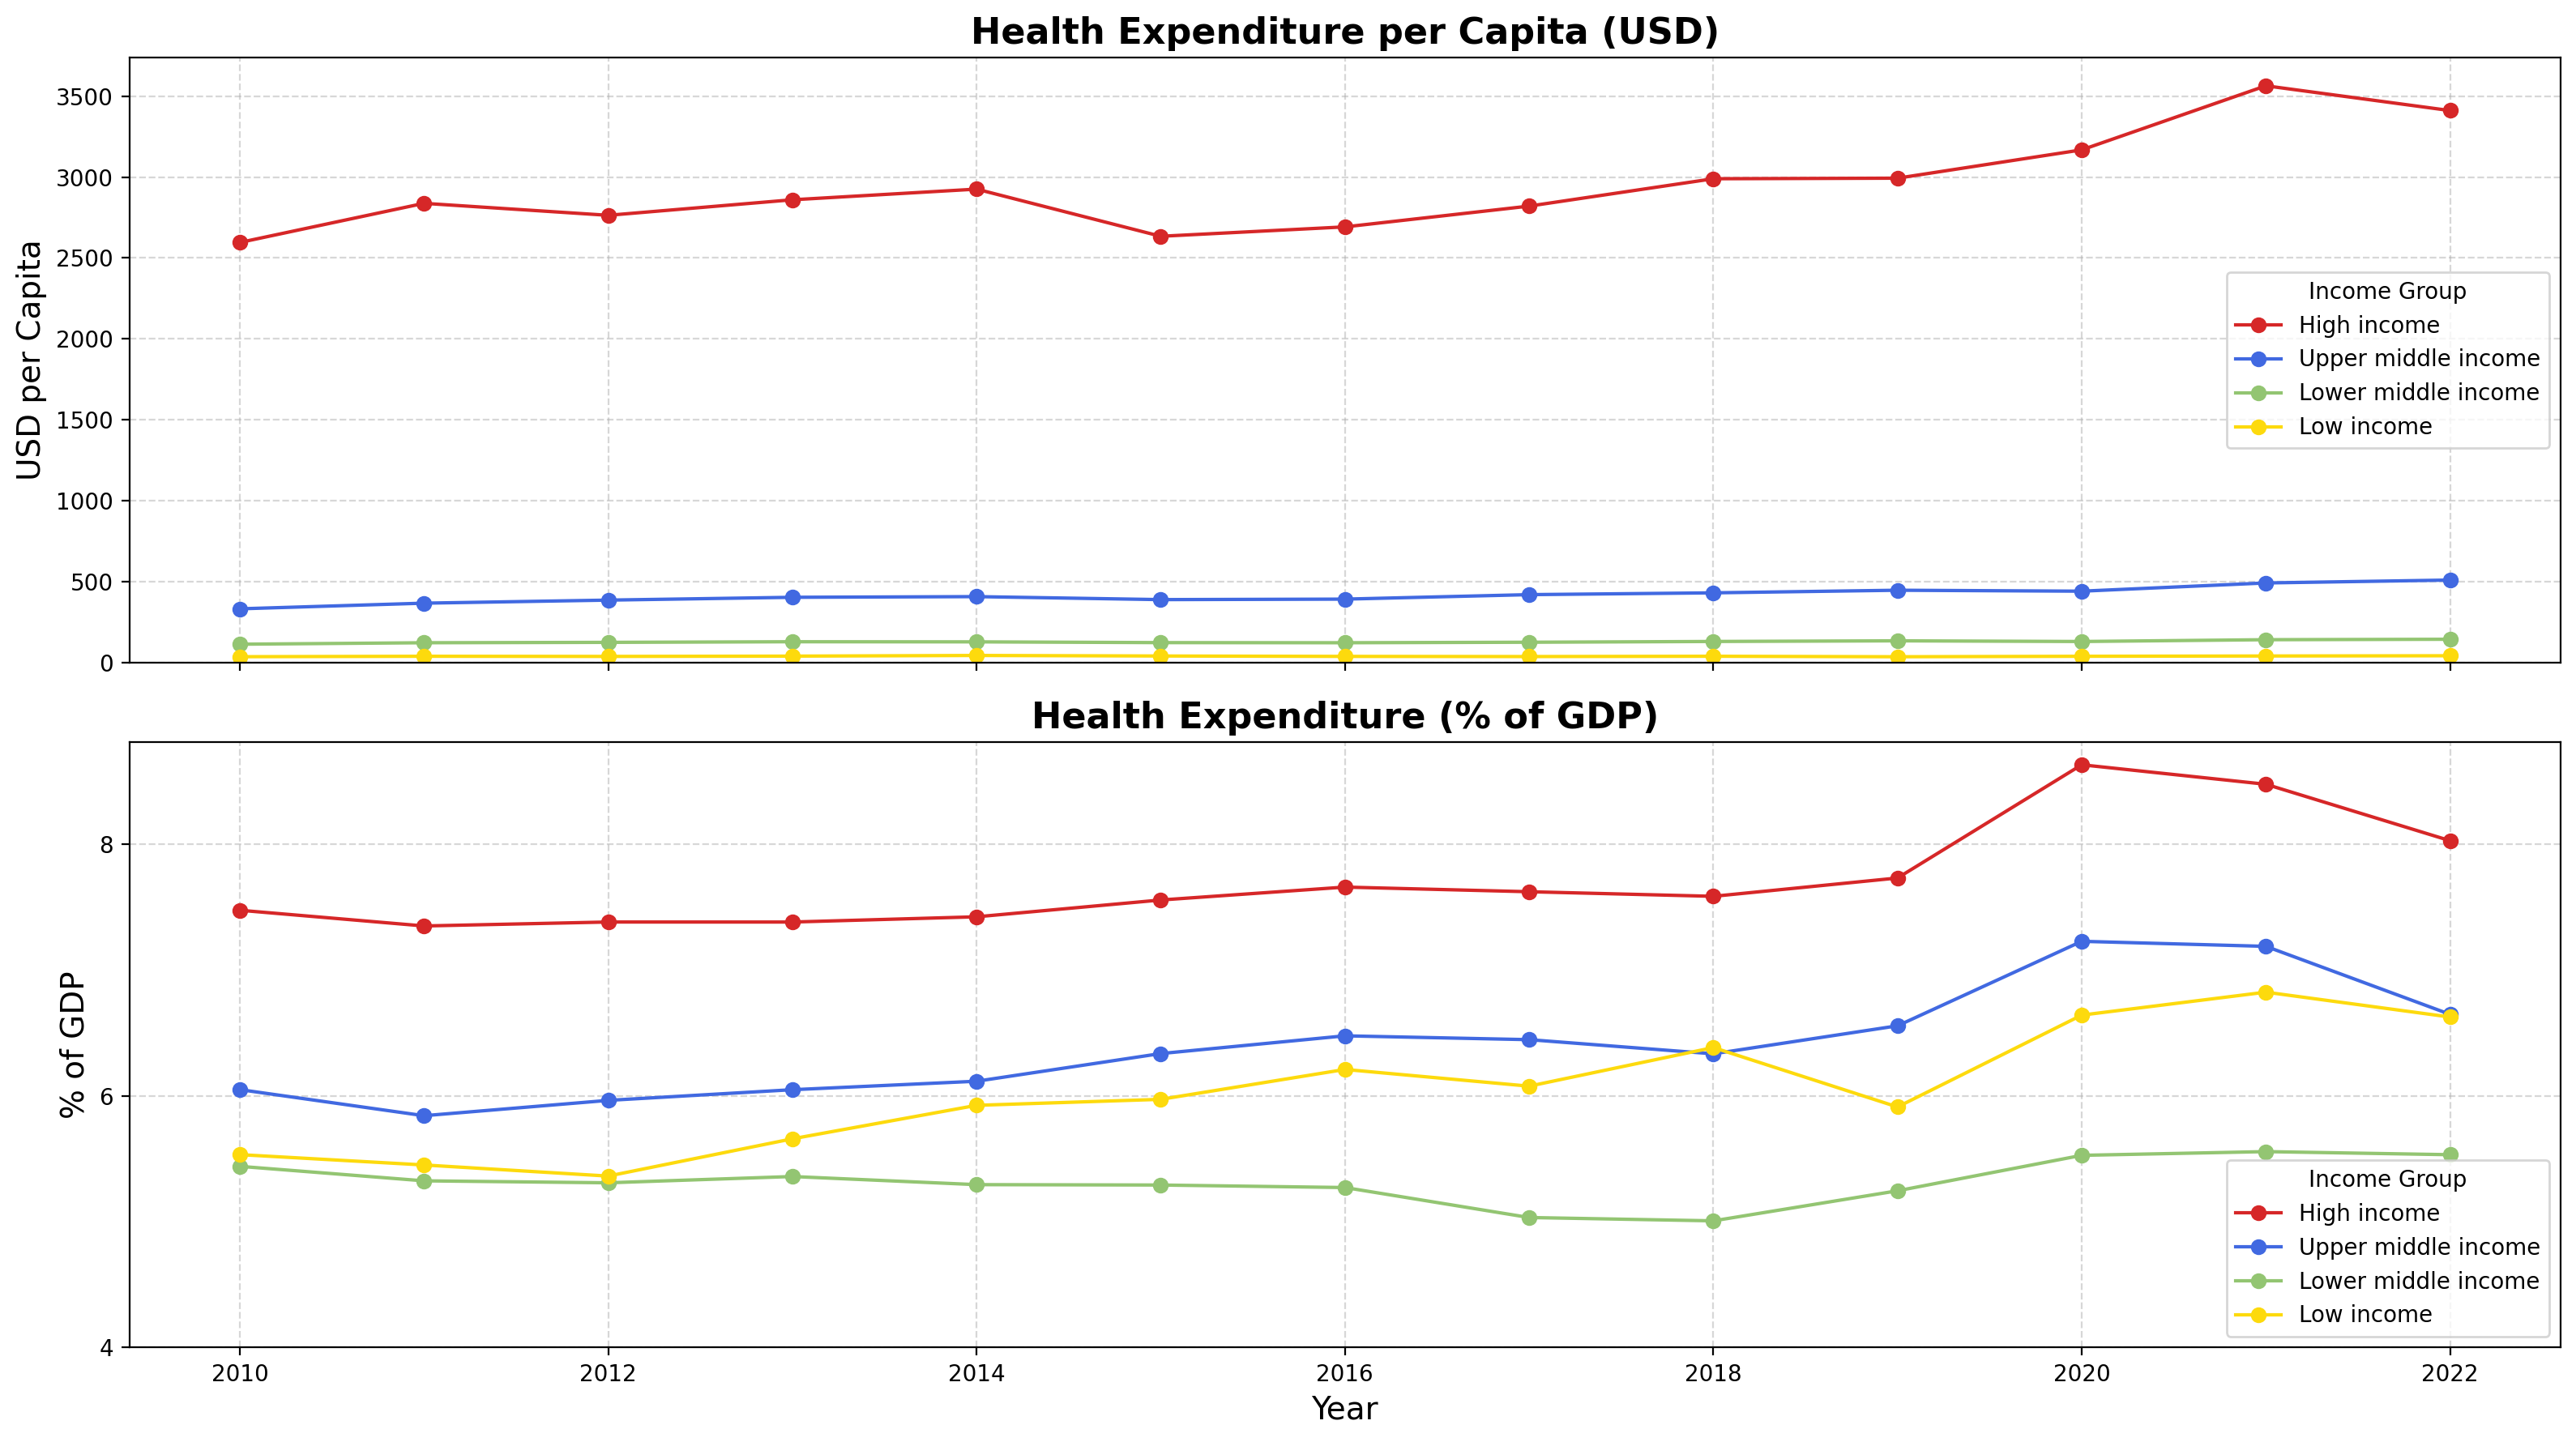

In [6]:
# ==========================
# --- Step 5b: Line Chart (HE per Capita & HE % GDP by Income Group) ---

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# กำหนดลำดับ IncomeGroup
income_order = [ 'High income', 'Upper middle income','Lower middle income','Low income']

# --- 1) Aggregate data by IncomeGroup & Year ---
df_line_percap = df_merged.groupby(['IncomeGroup', 'Year'], as_index=False).agg({
    'Health_Expenditure_per_Capita (USD per Capita)': 'mean'
})

df_line_percent = df_merged.groupby(['IncomeGroup', 'Year'], as_index=False).agg({
    'HE_percent_GDP (%)': 'mean'
})

# --- 2) Plot Line Chart ---
fig, axes = plt.subplots(2, 1, figsize=(16, 9), dpi=200, sharex=True)
colors = ['#d62728', '#4169E1', '#93C572', '#FDDA0D']

# --- Top: HE per Capita ---
for i, income in enumerate(income_order):
    df_tmp = df_line_percap[df_line_percap['IncomeGroup'] == income]
    axes[0].plot(df_tmp['Year'], df_tmp['Health_Expenditure_per_Capita (USD per Capita)'],
                 label=income, color=colors[i], marker='o')
axes[0].set_title("Health Expenditure per Capita (USD)", fontsize=16, fontweight='bold')
axes[0].set_ylabel("USD per Capita", fontsize=14)
axes[0].set_ylim(0)  # start Y at 0
axes[0].yaxis.set_major_locator(MultipleLocator(500))  # tick every 500
axes[0].legend(title="Income Group")
axes[0].grid(True, linestyle='--', alpha=0.5)

# --- Bottom: HE % GDP ---
for i, income in enumerate(income_order):
    df_tmp = df_line_percent[df_line_percent['IncomeGroup'] == income]
    axes[1].plot(df_tmp['Year'], df_tmp['HE_percent_GDP (%)'],
                 label=income, color=colors[i], marker='o')
axes[1].set_title("Health Expenditure (% of GDP)", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Year", fontsize=14)
axes[1].set_ylabel("% of GDP", fontsize=14)
axes[1].set_ylim(4)  # start Y at 4
axes[1].yaxis.set_major_locator(MultipleLocator(2))  # tick every 2%
axes[1].legend(title="Income Group")
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

/tmp/ipython-input-4291139068.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IncomeGroup', y='HE_percent_GDP (%)',


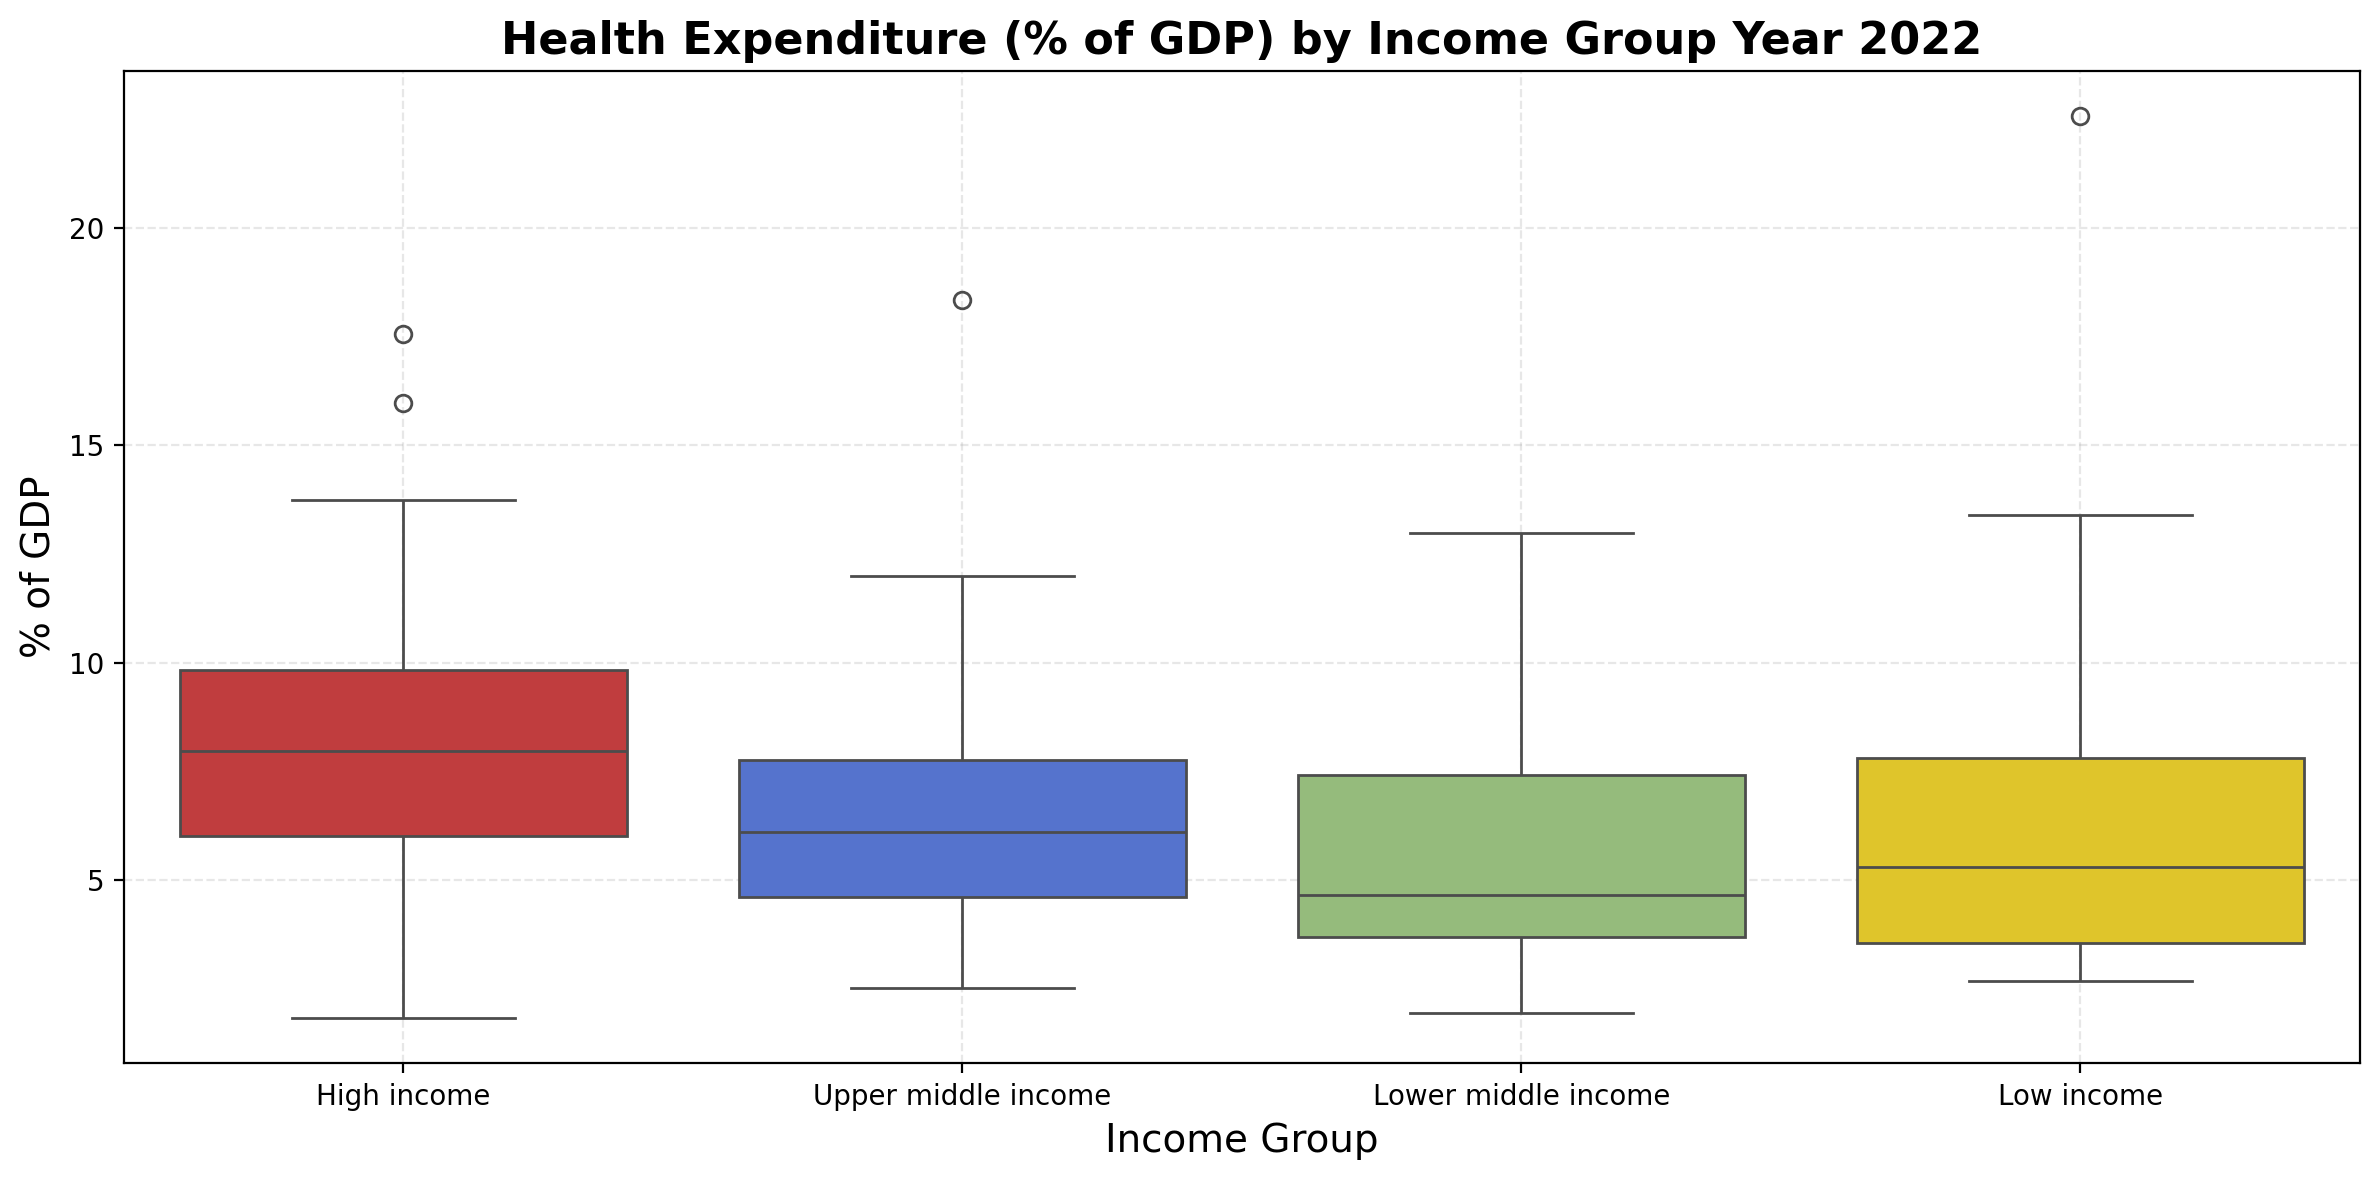

In [7]:
# --- Step 5c (Alt): Boxplot HE % GDP by Income Group, Year 2022 ---
import seaborn as sns
import matplotlib.pyplot as plt

# filter ข้อมูลเฉพาะปี 2022
df_2022 = df_merged[df_merged['Year'] == 2022]

# สร้าง figure
plt.figure(figsize=(12,6), dpi=200)

# กำหนด order ของ income group
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']

# สีตามลำดับ income_order
colors = ['#d62728', '#4169E1', '#93C572', '#FDDA0D']
palette = dict(zip(income_order, colors))

# Boxplot HE %GDP เฉพาะปี 2022
sns.boxplot(x='IncomeGroup', y='HE_percent_GDP (%)',
            data=df_2022, order=income_order, palette=palette)

# title & labels
plt.title("Health Expenditure (% of GDP) by Income Group Year 2022", fontsize=16, fontweight='bold')
plt.xlabel("Income Group", fontsize=14)
plt.ylabel("% of GDP", fontsize=14)

# grid
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


# 04 Disease Trend

In [8]:
# ==========================
# 0) Setup & Mount Google Drive
# ==========================

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

# set working dir
data_path = "/content/drive/MyDrive/Use"

# สร้าง folder สำหรับเก็บรูป
if not os.path.exists("figures"):
    os.makedirs("figures")

# ==========================
# 1) Load dataset: Global Burden of Disease (GBD)
# ==========================

# Dataset:
# - gbd_cause_of_death.csv

df_gbd = pd.read_csv(os.path.join(data_path, "gbd_cause_of_death.csv"))

print("GBD dataset shape:", df_gbd.shape)

# preview head
print("\n--- Preview head ---")
display(df_gbd.head())

# preview tail
print("\n--- Preview tail ---")
display(df_gbd.tail())

# check column info
print("\n--- Info ---")
df_gbd.info()

# check columns list
print("\n--- Columns ---")
print(df_gbd.columns.tolist())

# optional: check unique values ของ cause ถ้ามีคอลัมน์ชื่อ 'Cause'
if any("cause" in c.lower() for c in df_gbd.columns):
    cause_col = [c for c in df_gbd.columns if "cause" in c.lower()][0]
    print(f"\nUnique values in '{cause_col}':")
    print(df_gbd[cause_col].unique()[:20])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
GBD dataset shape: (58752, 19)

--- Preview head ---


measure_id measure_name  location_id location_name Country Code  \
0           1       Deaths           52       Romania          ROU   
1           1       Deaths           52       Romania          ROU   
2           1       Deaths           52       Romania          ROU   
3           1       Deaths           35       Georgia          GEO   
4           1       Deaths           35       Georgia          GEO   

                  Region          IncomeGroup  sex_id sex_name  age_id  \
0  Europe & Central Asia          High income       3     Both      22   
1  Europe & Central Asia          High income       3     Both      22   
2  Europe & Central Asia          High income       3     Both      22   
3  Europe & Central Asia  Upper middle income       3     Both      22   
4  Europe & Central Asia  Upper middle income       3     Both      22   

   age_name  cause_id                                cause_name  metric_id  \
0  All ages       409                 Non-communicable diseases          1   
1  All ages       409                 Non-communicable diseases          2   
2  All ages       409                 Non-communicable diseases          3   
3  All ages      1058  Other COVID-19 pandemic-related outcomes          1   
4  All ages      1058  Other COVID-19 pandemic-related outcomes          2   

  metric_name  year            val          upper          lower  
0      Number  2010  238628.930900  240373.994100  236982.670600  
1     Percent  2010       0.920526       0.922522       0.918877  
2        Rate  2010    1153.518706    1161.954242    1145.560777  
3      Number  2010       0.000000       0.000000       0.000000  
4     Percent  2010       0.000000       0.000000       0.000000


--- Preview tail ---


measure_id                            measure_name  location_id  \
58747           2  DALYs (Disability-Adjusted Life Years)          136   
58748           2  DALYs (Disability-Adjusted Life Years)          136   
58749           2  DALYs (Disability-Adjusted Life Years)          101   
58750           2  DALYs (Disability-Adjusted Life Years)          101   
58751           2  DALYs (Disability-Adjusted Life Years)          101   

      location_name Country Code                     Region  \
58747      Paraguay          PRY  Latin America & Caribbean   
58748      Paraguay          PRY  Latin America & Caribbean   
58749        Canada          CAN              North America   
58750        Canada          CAN              North America   
58751        Canada          CAN              North America   

               IncomeGroup  sex_id sex_name  age_id  age_name  cause_id  \
58747  Upper middle income       3     Both      22  All ages      1058   
58748  Upper middle income       3     Both      22  All ages      1058   
58749          High income       3     Both      22  All ages       687   
58750          High income       3     Both      22  All ages       687   
58751          High income       3     Both      22  All ages       687   

                                     cause_name  metric_id metric_name  year  \
58747  Other COVID-19 pandemic-related outcomes          2     Percent  2021   
58748  Other COVID-19 pandemic-related outcomes          3        Rate  2021   
58749                                  Injuries          1      Number  2021   
58750                                  Injuries          2     Percent  2021   
58751                                  Injuries          3        Rate  2021   

                 val         upper          lower  
58747       0.016234  2.346078e-02       0.009196  
58748     501.298693  7.034702e+02     282.427842  
58749  896447.573800  1.038557e+06  779987.815500  
58750       0.081403  8.802485e-02       0.075551  
58751    2392.491451  2.771762e+03    2081.676871


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58752 entries, 0 to 58751
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     58752 non-null  int64  
 1   measure_name   58752 non-null  object 
 2   location_id    58752 non-null  int64  
 3   location_name  58752 non-null  object 
 4   Country Code   57600 non-null  object 
 5   Region         57600 non-null  object 
 6   IncomeGroup    57600 non-null  object 
 7   sex_id         58752 non-null  int64  
 8   sex_name       58752 non-null  object 
 9   age_id         58752 non-null  int64  
 10  age_name       58752 non-null  object 
 11  cause_id       58752 non-null  int64  
 12  cause_name     58752 non-null  object 
 13  metric_id      58752 non-null  int64  
 14  metric_name    58752 non-null  object 
 15  year           58752 non-null  int64  
 16  val            58752 non-null  float64
 17  upper          58752 non-null  float

In [9]:
# ==========================
# Step 2: Explore dataset - GBD Cause of Death

# ตั้งค่าให้ pandas แสดงครบ
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 1) ดู 5 แถวแรก
print("Preview GBD Cause of Death dataset:")
display(df_gbd.head())

# 2) สรุปโครงสร้าง dataset
print("\n--- Info: GBD dataset ---")
df_gbd.info()

# 3) ตรวจสอบ missing values
print("\n--- Missing values ---")
display(df_gbd.isnull().sum())


Preview GBD Cause of Death dataset:


measure_id measure_name  location_id location_name Country Code  \
0           1       Deaths           52       Romania          ROU   
1           1       Deaths           52       Romania          ROU   
2           1       Deaths           52       Romania          ROU   
3           1       Deaths           35       Georgia          GEO   
4           1       Deaths           35       Georgia          GEO   

                  Region          IncomeGroup  sex_id sex_name  age_id  \
0  Europe & Central Asia          High income       3     Both      22   
1  Europe & Central Asia          High income       3     Both      22   
2  Europe & Central Asia          High income       3     Both      22   
3  Europe & Central Asia  Upper middle income       3     Both      22   
4  Europe & Central Asia  Upper middle income       3     Both      22   

   age_name  cause_id                                cause_name  metric_id  \
0  All ages       409                 Non-communicable diseases          1   
1  All ages       409                 Non-communicable diseases          2   
2  All ages       409                 Non-communicable diseases          3   
3  All ages      1058  Other COVID-19 pandemic-related outcomes          1   
4  All ages      1058  Other COVID-19 pandemic-related outcomes          2   

  metric_name  year            val          upper          lower  
0      Number  2010  238628.930900  240373.994100  236982.670600  
1     Percent  2010       0.920526       0.922522       0.918877  
2        Rate  2010    1153.518706    1161.954242    1145.560777  
3      Number  2010       0.000000       0.000000       0.000000  
4     Percent  2010       0.000000       0.000000       0.000000


--- Info: GBD dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58752 entries, 0 to 58751
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   measure_id     58752 non-null  int64  
 1   measure_name   58752 non-null  object 
 2   location_id    58752 non-null  int64  
 3   location_name  58752 non-null  object 
 4   Country Code   57600 non-null  object 
 5   Region         57600 non-null  object 
 6   IncomeGroup    57600 non-null  object 
 7   sex_id         58752 non-null  int64  
 8   sex_name       58752 non-null  object 
 9   age_id         58752 non-null  int64  
 10  age_name       58752 non-null  object 
 11  cause_id       58752 non-null  int64  
 12  cause_name     58752 non-null  object 
 13  metric_id      58752 non-null  int64  
 14  metric_name    58752 non-null  object 
 15  year           58752 non-null  int64  
 16  val            58752 non-null  float64
 17  upper          58752 no

measure_id          0
measure_name        0
location_id         0
location_name       0
Country Code     1152
Region           1152
IncomeGroup      1152
sex_id              0
sex_name            0
age_id              0
age_name            0
cause_id            0
cause_name          0
metric_id           0
metric_name         0
year                0
val                 0
upper               0
lower               0
dtype: int64

In [10]:
# ==========================
# --- Step 3: Data Cleaning (GBD) ---

# --- 1) Drop columns ที่ไม่ต้องการ ---
cols_to_drop = ["measure_id", "location_id", "sex_id", "sex_name", "age_id", "age_name", "cause_id"]
df_gbd = df_gbd.drop(columns=cols_to_drop, errors="ignore")

# --- 2) Drop rows ที่ Region หรือ IncomeGroup เป็น '0', '#N/A' หรือ 'Not classified' ---
if "Region" in df_gbd.columns and "IncomeGroup" in df_gbd.columns:
    df_gbd = df_gbd[
        (~df_gbd["Region"].isin(["0", "#N/A", "Not classified"])) &
        (~df_gbd["IncomeGroup"].isin(["0", "#N/A", "Not classified"]))
    ]

# --- 3) Drop rows ที่ measure_name = "Deaths" ---
if "measure_name" in df_gbd.columns:
    df_gbd = df_gbd[df_gbd["measure_name"] != "Deaths"]

# --- 4) Check ขนาด dataset หลัง cleaning ---
print("✅ Cleaning completed.")

print("\n--- GBD Dataset (after cleaning) ---")
print(f"Shape: {df_gbd.shape[0]} rows × {df_gbd.shape[1]} columns")
display(df_gbd.head())

✅ Cleaning completed.

--- GBD Dataset (after cleaning) ---
Shape: 29088 rows × 12 columns


measure_name location_name Country Code  \
15360  DALYs (Disability-Adjusted Life Years)         Congo          COG   
15361  DALYs (Disability-Adjusted Life Years)         Congo          COG   
15362  DALYs (Disability-Adjusted Life Years)         Congo          COG   
15417  DALYs (Disability-Adjusted Life Years)         Congo          COG   
15418  DALYs (Disability-Adjusted Life Years)         Congo          COG   

                   Region          IncomeGroup  \
15360  Sub-Saharan Africa  Lower middle income   
15361  Sub-Saharan Africa  Lower middle income   
15362  Sub-Saharan Africa  Lower middle income   
15417  Sub-Saharan Africa  Lower middle income   
15418  Sub-Saharan Africa  Lower middle income   

                                     cause_name  metric_id metric_name  year  \
15360  Other COVID-19 pandemic-related outcomes          1      Number  2010   
15361  Other COVID-19 pandemic-related outcomes          2     Percent  2010   
15362  Other COVID-19 pandemic-related outcomes          3        Rate  2010   
15417                 Non-communicable diseases          1      Number  2012   
15418                 Non-communicable diseases          2     Percent  2012   

                 val          upper          lower  
15360       0.000000       0.000000       0.000000  
15361       0.000000       0.000000       0.000000  
15362       0.000000       0.000000       0.000000  
15417  804907.854100  943929.648300  698403.780300  
15418       0.349543       0.375805       0.321255

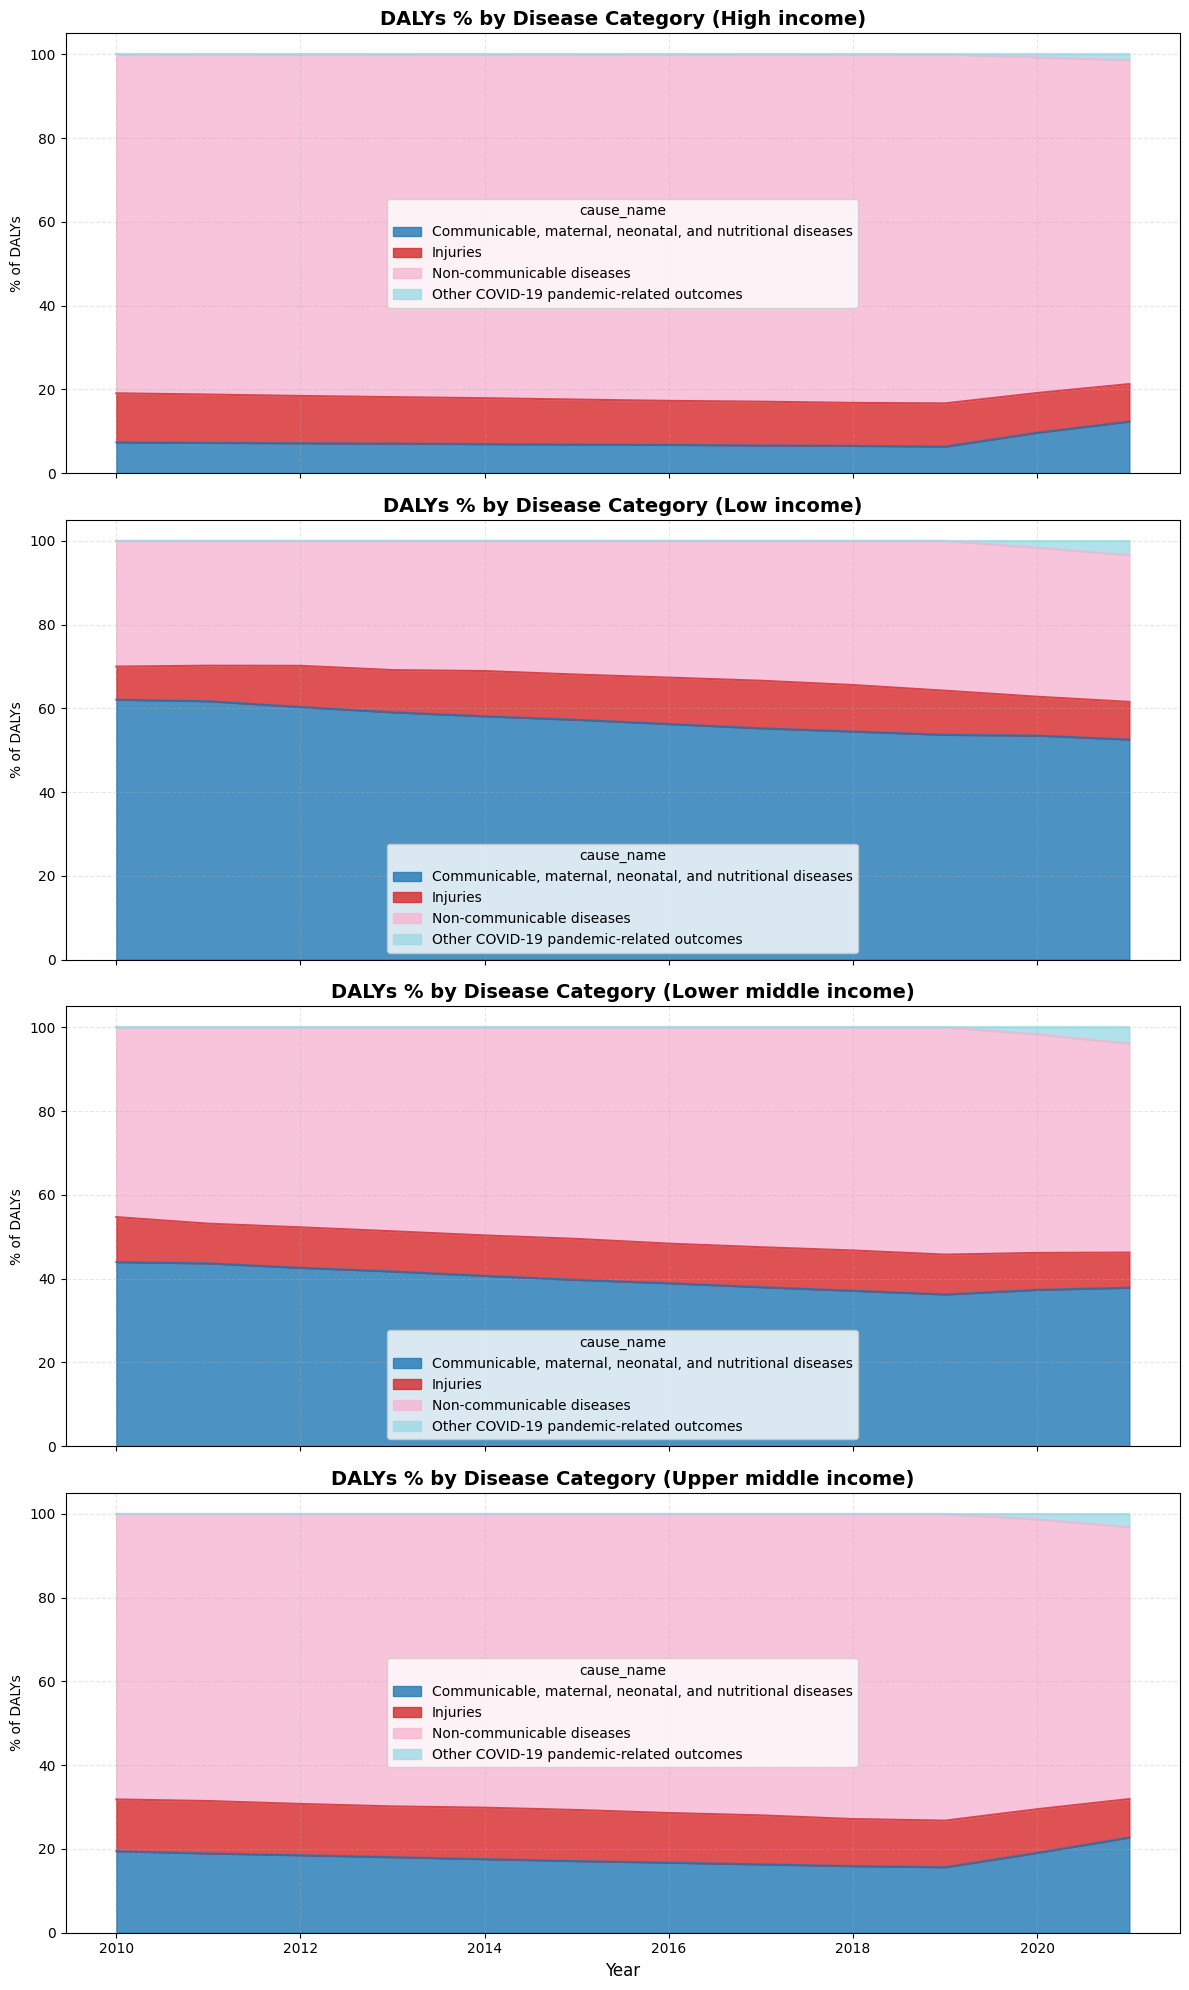

In [11]:
# ==========================
# Step 4 – Block 1: Stacked Area Chart - DALYs % by Disease Category and IncomeGroup (Option01)

import matplotlib.pyplot as plt
import pandas as pd

# --- 1) Filter dataset สำหรับ DALYs และ Percent ---
df_dalys = df_gbd[
    (df_gbd['measure_name'] == 'DALYs (Disability-Adjusted Life Years)') &
    (df_gbd['metric_name'] == 'Percent')
].copy()

# --- 2) เลือก columns ที่จำเป็น ---
cols = ['year', 'IncomeGroup', 'cause_name', 'val']
df_dalys = df_dalys[cols]

# --- 3) Aggregate per year, IncomeGroup, and disease category ---
df_grouped = df_dalys.groupby(['year', 'IncomeGroup', 'cause_name'])['val'].sum().reset_index()

# --- 4) Compute % share per year and IncomeGroup safely ---
df_grouped['dalys_pct'] = df_grouped.groupby(['year', 'IncomeGroup'])['val'].transform(lambda x: x / x.sum() * 100)

# --- 5) Plot Stacked Area Chart ---
income_groups = df_grouped['IncomeGroup'].unique()

fig, axes = plt.subplots(len(income_groups), 1, figsize=(12, 5*len(income_groups)), sharex=True)

for i, ig in enumerate(income_groups):
    ax = axes[i] if len(income_groups) > 1 else axes
    df_plot = df_grouped[df_grouped['IncomeGroup'] == ig]

    # pivot for stacked area
    df_pivot = df_plot.pivot(index='year', columns='cause_name', values='dalys_pct')

    # stacked area plot
    df_pivot.plot(kind='area', stacked=True, ax=ax, colormap='tab20', alpha=0.8)
    ax.set_title(f"DALYs % by Disease Category ({ig})", fontsize=14, fontweight='bold')
    ax.set_ylabel("% of DALYs")
    ax.grid(True, linestyle='--', alpha=0.3)

plt.xlabel("Year", fontsize=12)
plt.tight_layout()
plt.show()


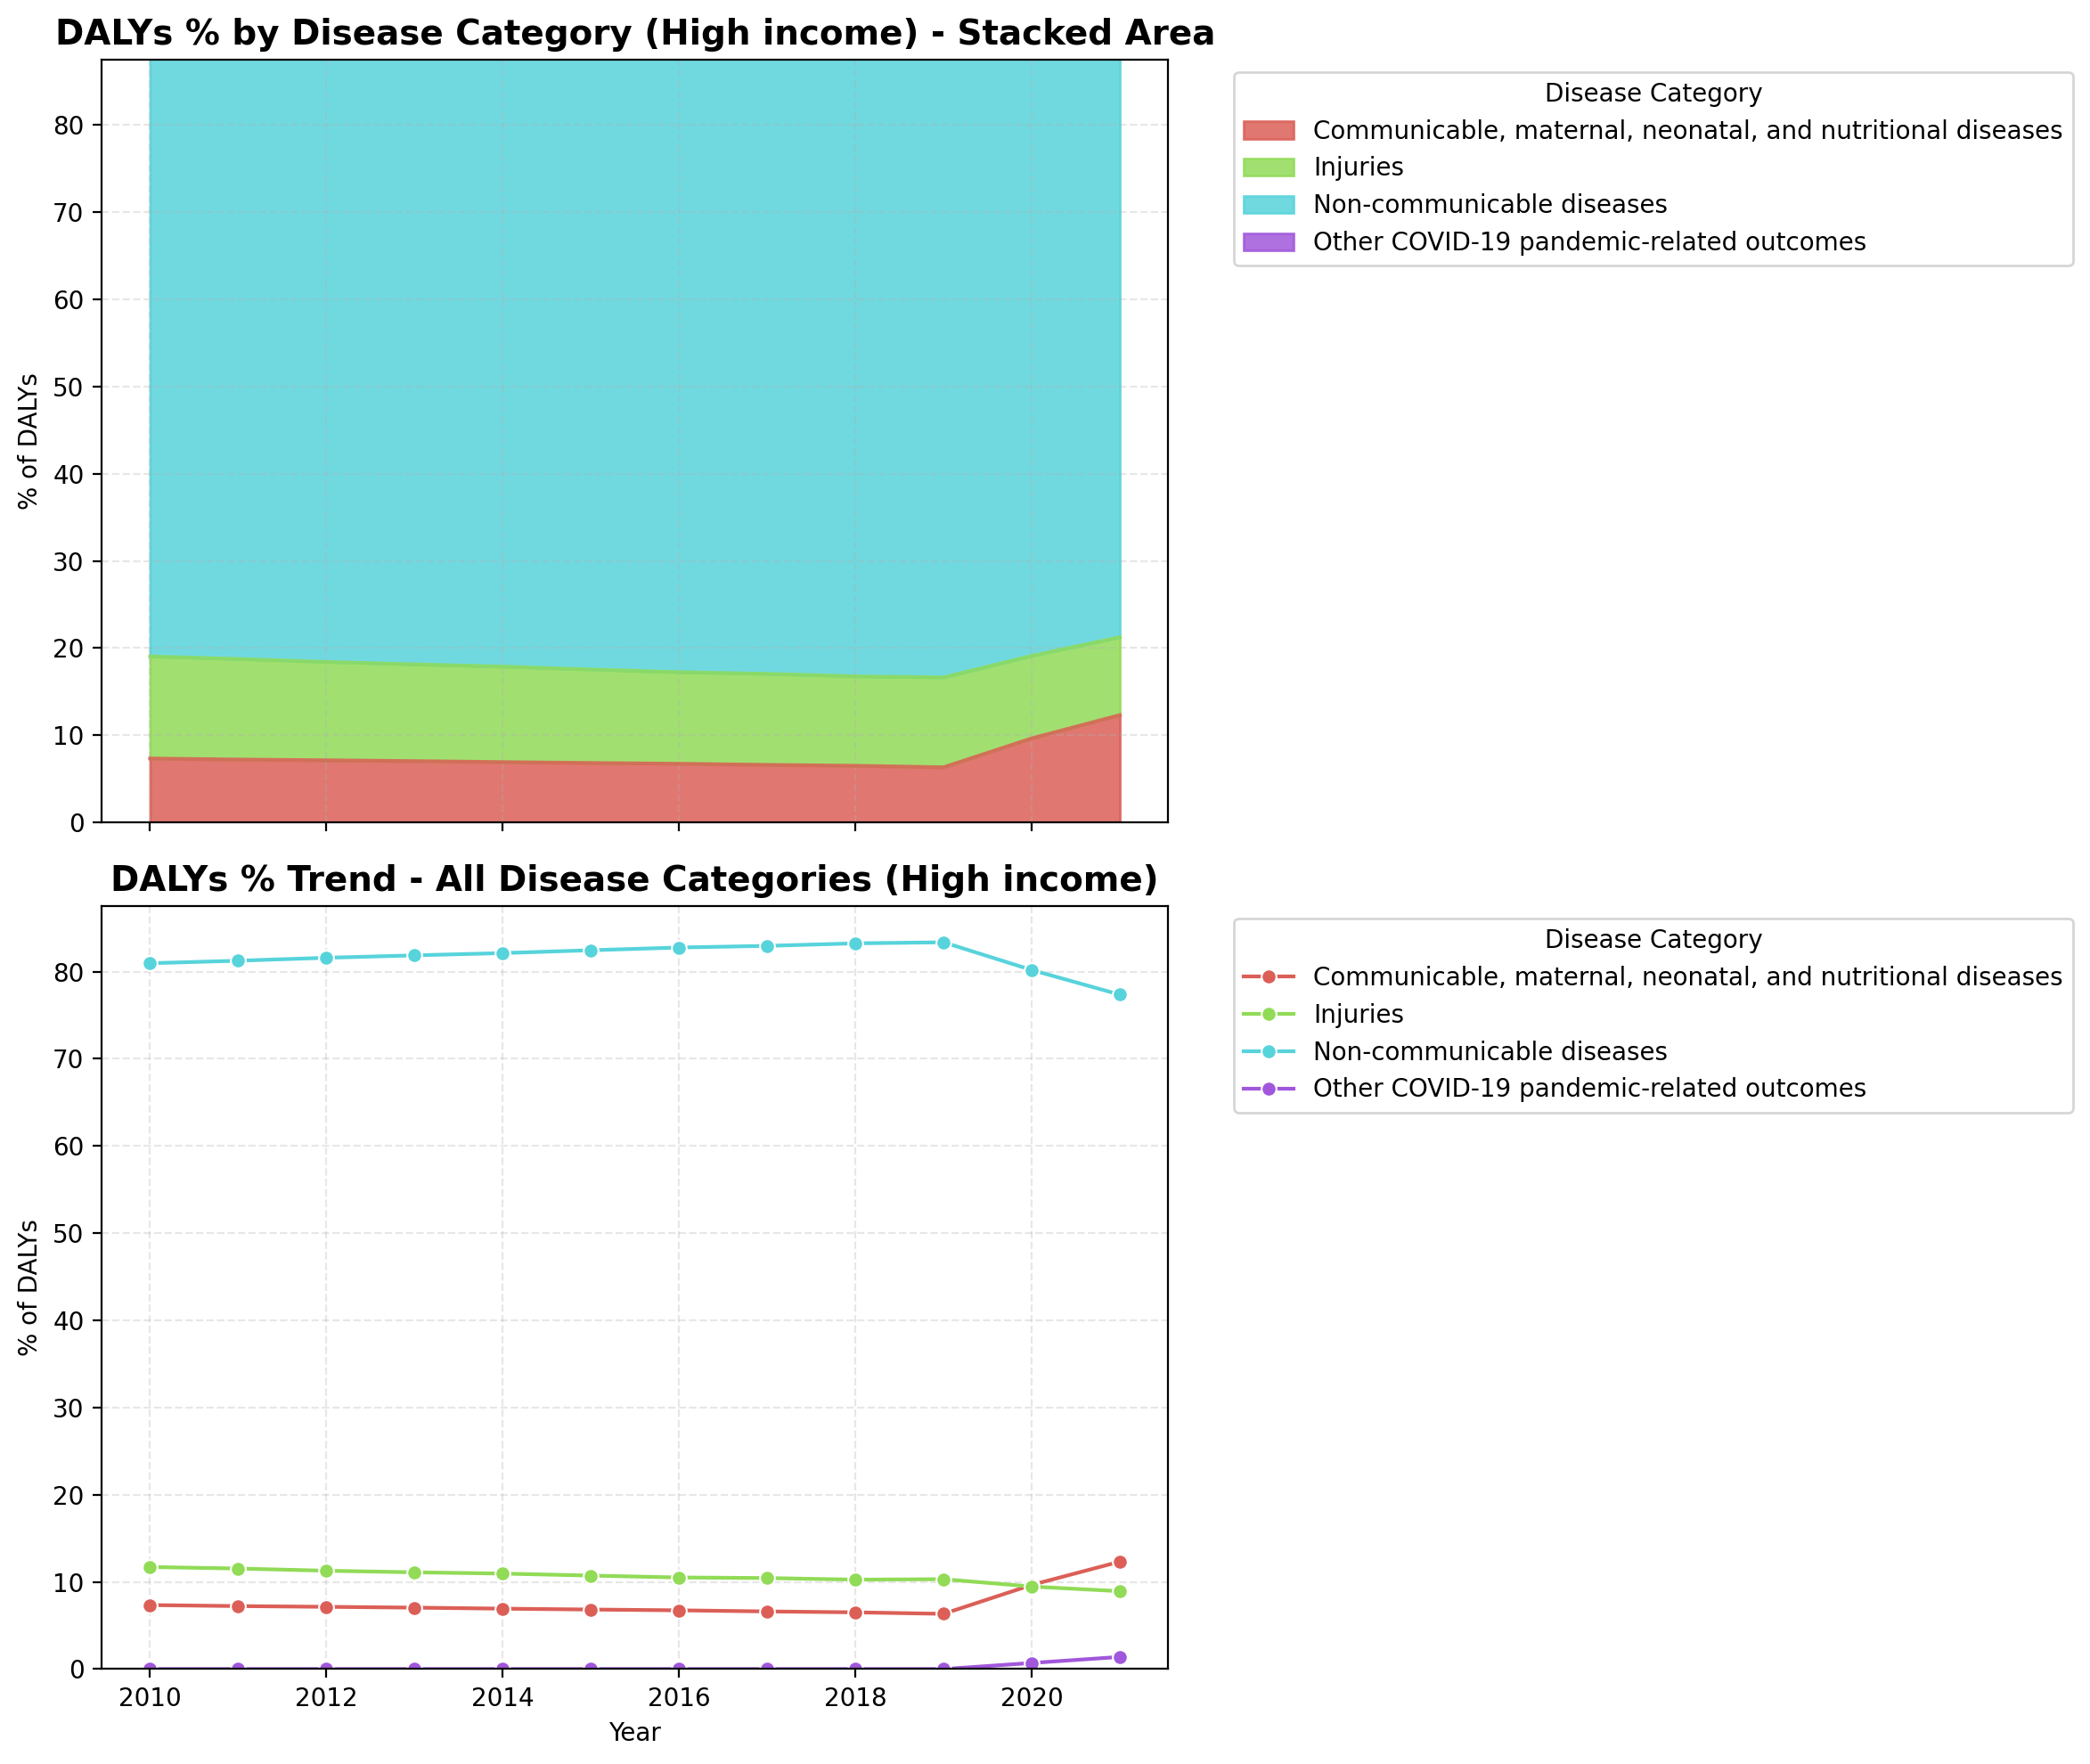

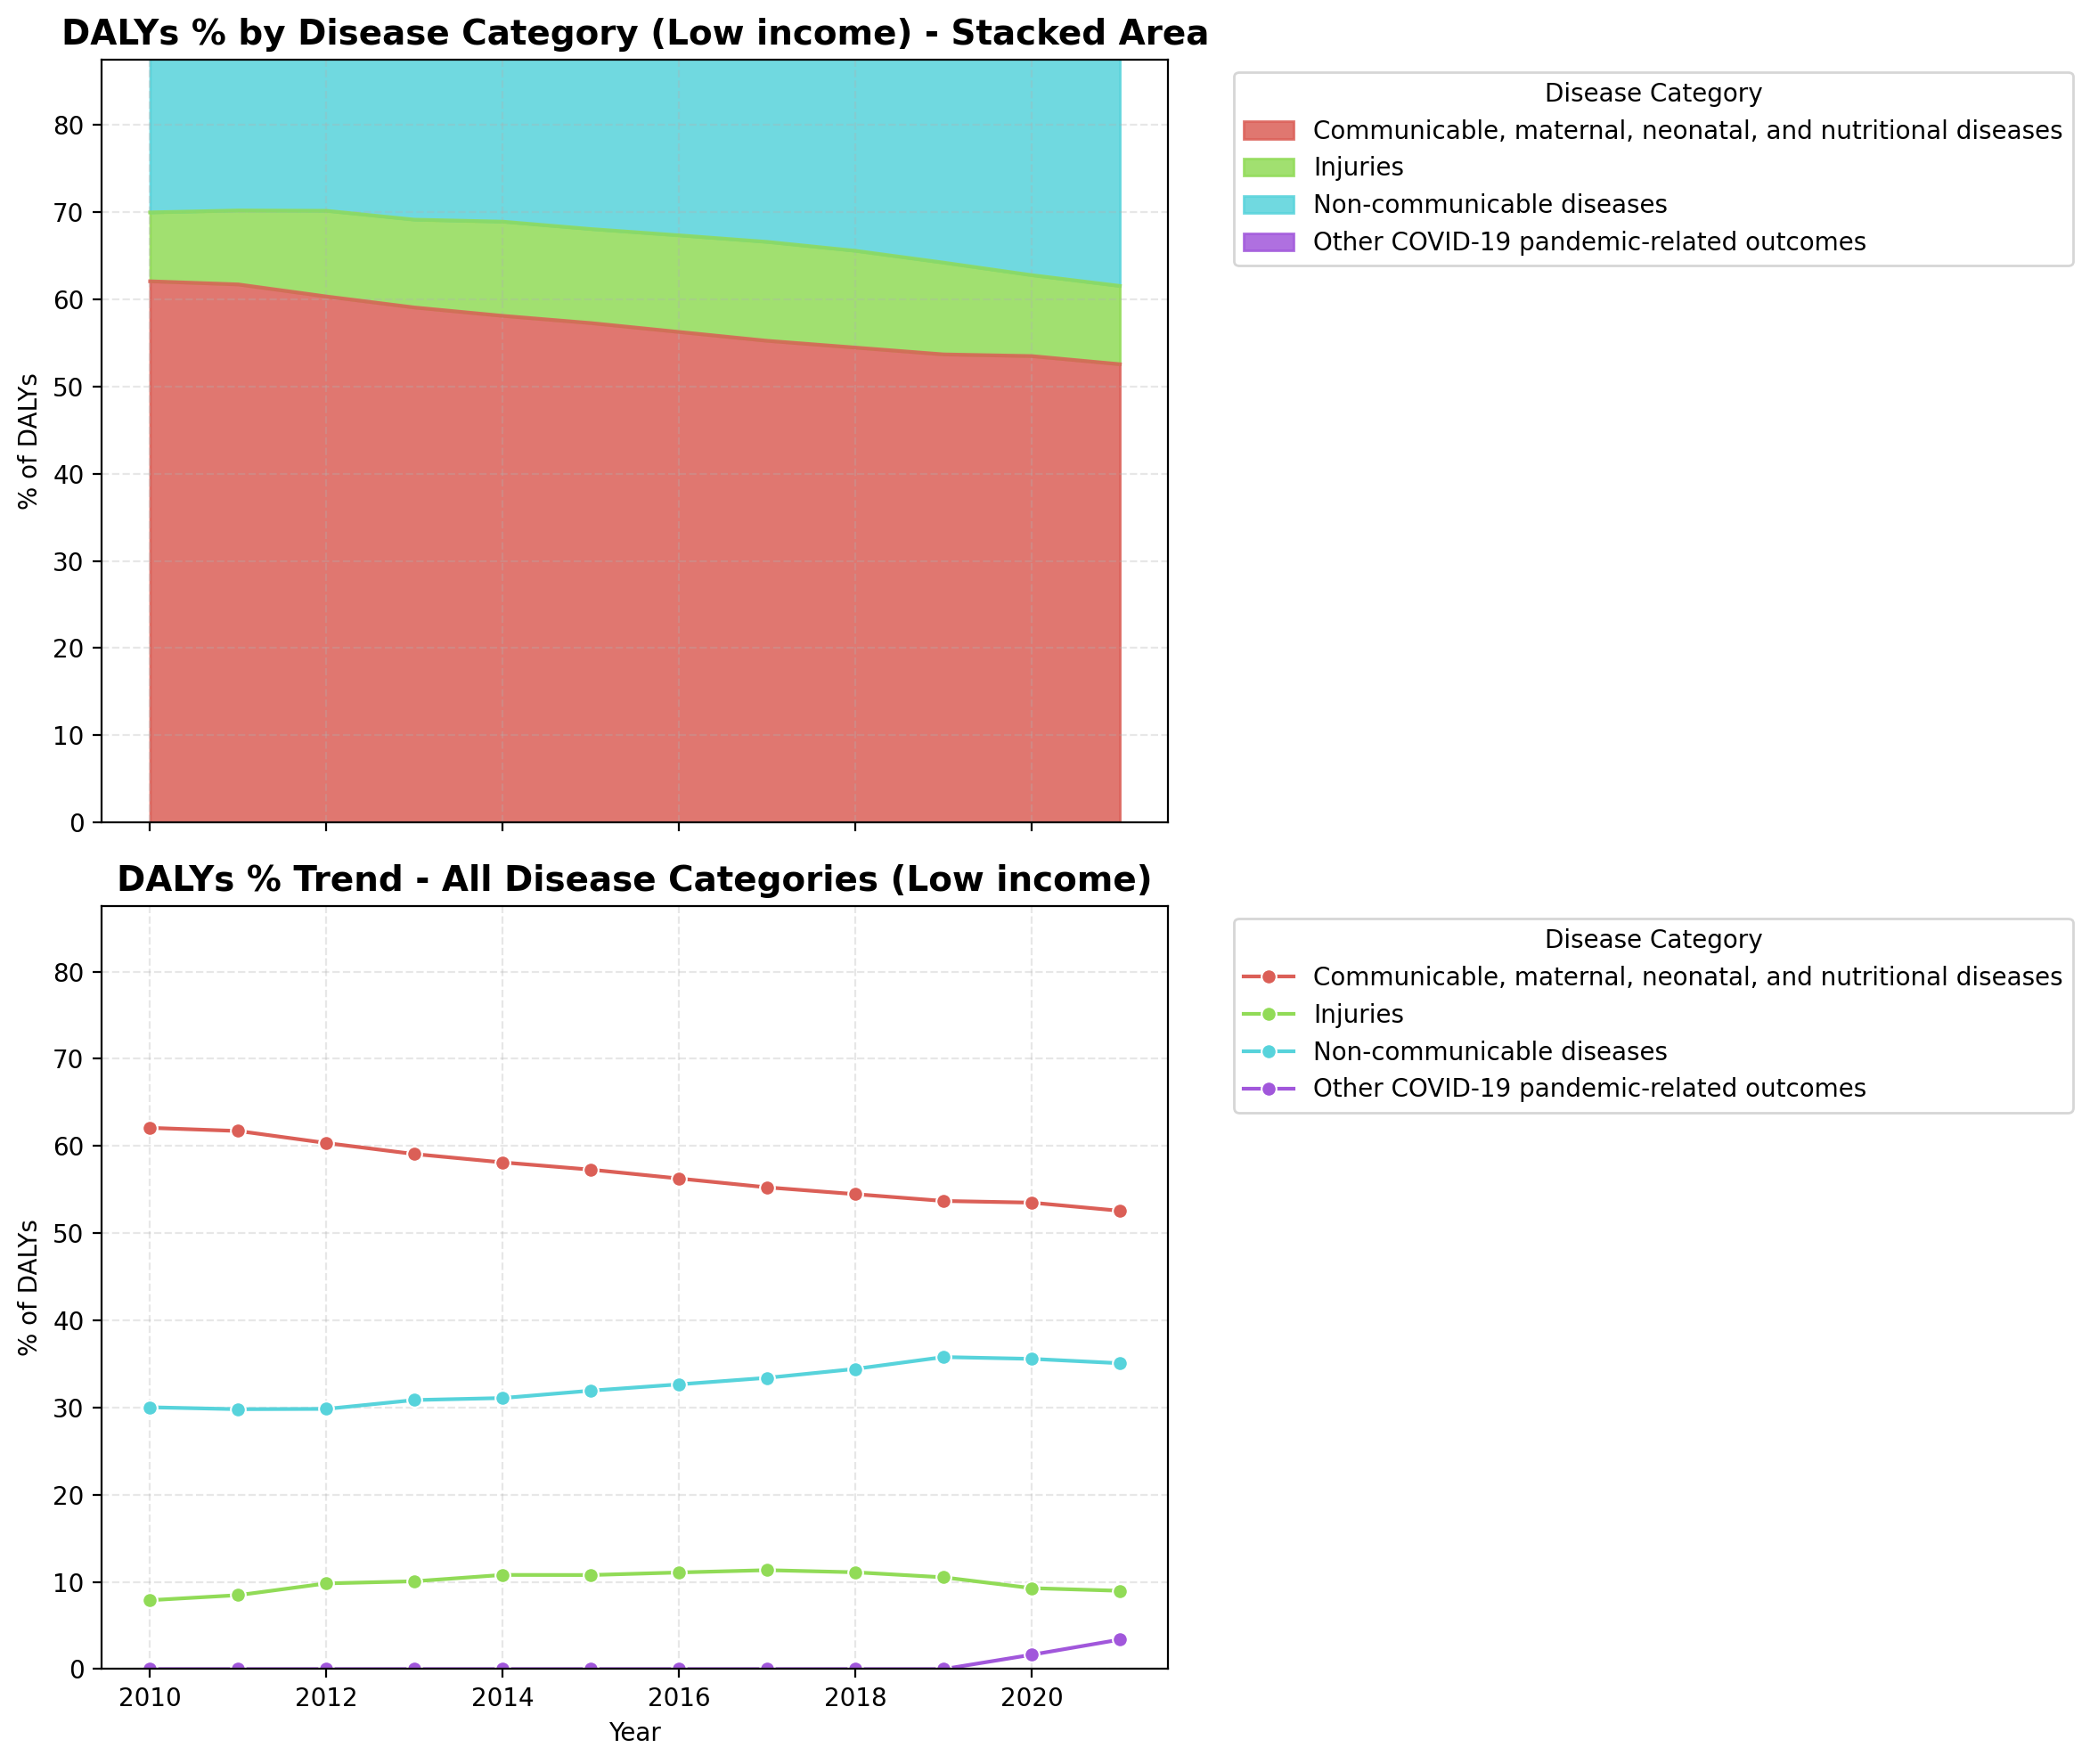

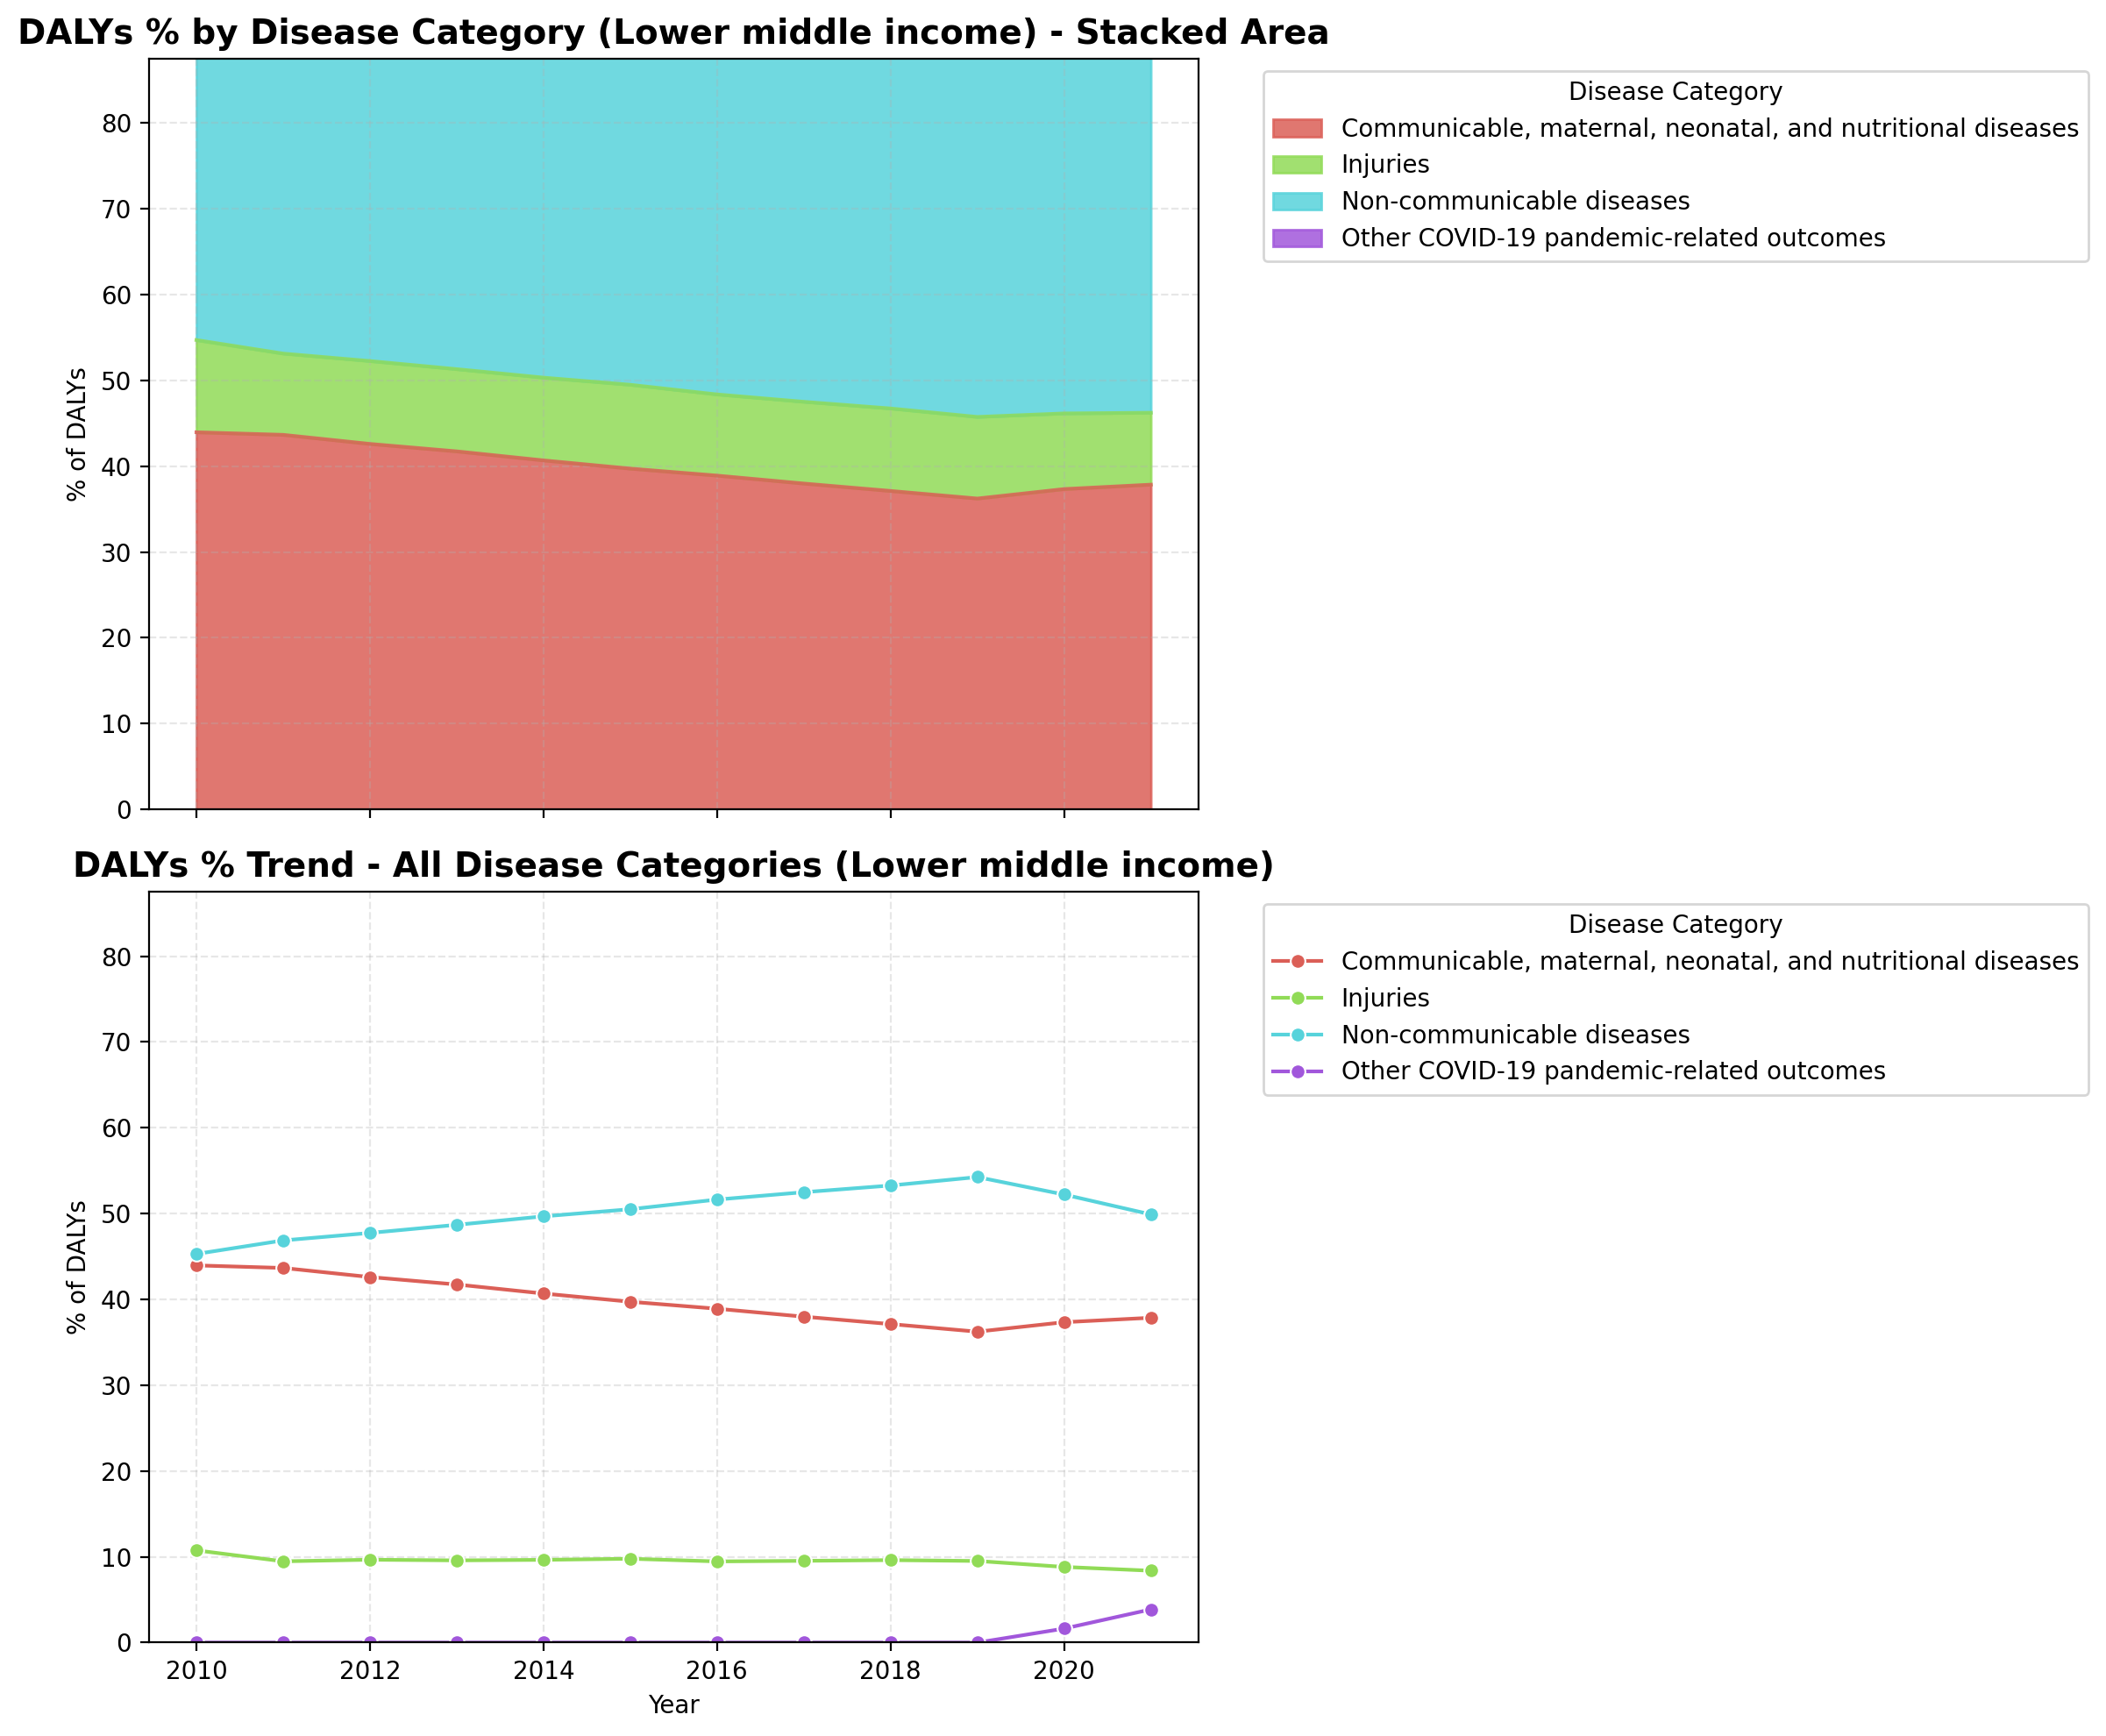

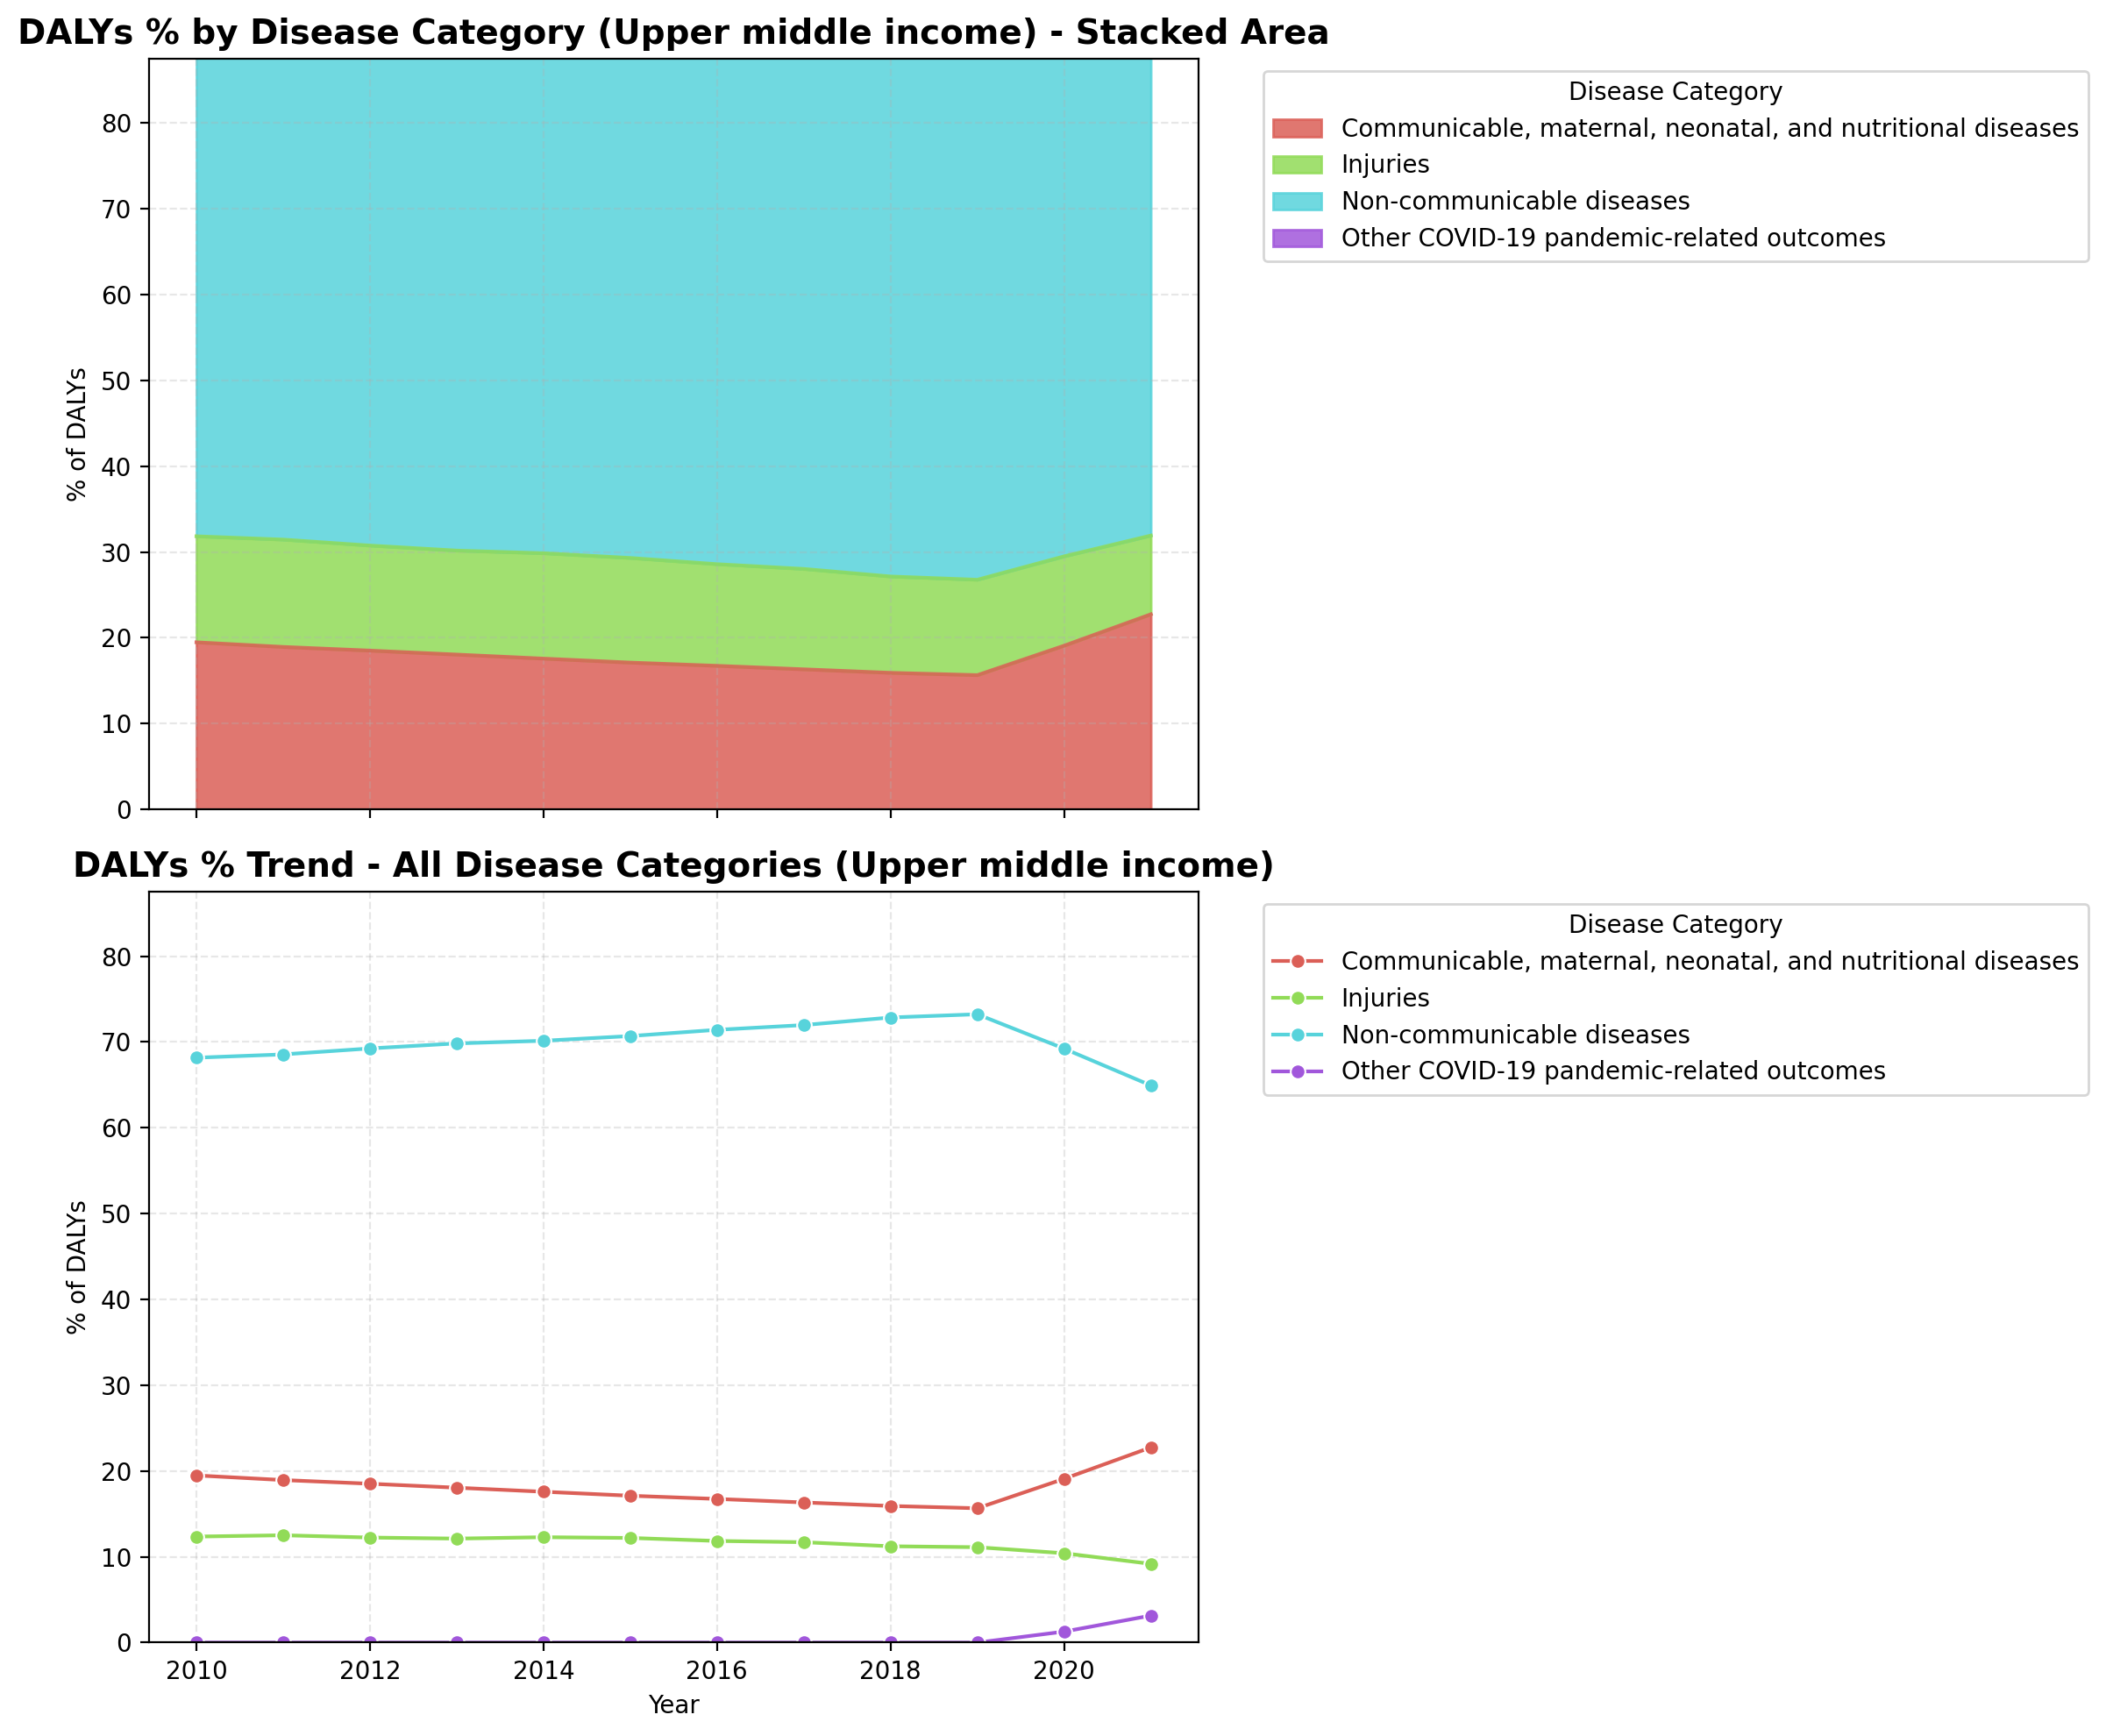

In [12]:
# ==========================
# Step 4 – Block 1: Stacked Area + Line Chart per IncomeGroup (Option02)
# Features: dpi=200, dynamic colors, same y-axis scale, legend right-side

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- 1) Filter dataset สำหรับ DALYs และ Percent ---
df_dalys = df_gbd[
    (df_gbd['measure_name'] == 'DALYs (Disability-Adjusted Life Years)') &
    (df_gbd['metric_name'] == 'Percent')
].copy()

# --- 2) เลือก columns ที่จำเป็น ---
cols = ['year', 'IncomeGroup', 'cause_name', 'val']
df_dalys = df_dalys[cols]

# --- 3) Aggregate per year, IncomeGroup, and disease category ---
df_grouped = df_dalys.groupby(['year', 'IncomeGroup', 'cause_name'])['val'].sum().reset_index()

# --- 4) Compute % share per year and IncomeGroup safely ---
df_grouped['dalys_pct'] = df_grouped.groupby(['year', 'IncomeGroup'])['val'].transform(lambda x: x / x.sum() * 100)

# --- 5) หา min-max ของ DALYs % ทั้ง dataset เพื่อใช้ y-axis เดียวกัน ---
y_min = 0
y_max = df_grouped['dalys_pct'].max() * 1.05  # เพิ่ม margin 5%

# --- 6) Plot Stacked Area + Line Chart per IncomeGroup ---
income_groups = df_grouped['IncomeGroup'].unique()

for ig in income_groups:
    df_plot = df_grouped[df_grouped['IncomeGroup'] == ig]

    # pivot for stacked area
    df_pivot = df_plot.pivot(index='year', columns='cause_name', values='dalys_pct').fillna(0)

    # dynamic colors
    categories = df_pivot.columns.tolist()
    palette_area = sns.color_palette("hls", n_colors=len(categories))
    palette_line = palette_area  # match colors กับ stacked area

    # create figure
    fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True, dpi=200)

    # --- Top: Stacked Area Chart with legend on right ---
    df_pivot.plot(kind='area', stacked=True, ax=axes[0], color=palette_area, alpha=0.85, legend=False)
    axes[0].set_title(f"DALYs % by Disease Category ({ig}) - Stacked Area", fontsize=14, fontweight='bold')
    axes[0].set_ylabel("% of DALYs")
    axes[0].set_ylim(y_min, y_max)
    axes[0].grid(True, linestyle='--', alpha=0.3)

    # Add legend on the right
    handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend(handles, labels, title='Disease Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    # --- Bottom: Line Chart for ALL categories ---
    df_line = df_plot.copy()
    sns.lineplot(
        data=df_line,
        x='year',
        y='dalys_pct',
        hue='cause_name',
        marker='o',
        ax=axes[1],
        palette=palette_line
    )
    axes[1].set_title(f"DALYs % Trend - All Disease Categories ({ig})", fontsize=14, fontweight='bold')
    axes[1].set_ylabel("% of DALYs")
    axes[1].set_xlabel("Year")
    axes[1].set_ylim(y_min, y_max)
    axes[1].grid(True, linestyle='--', alpha=0.3)
    axes[1].legend(title='Disease Category', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

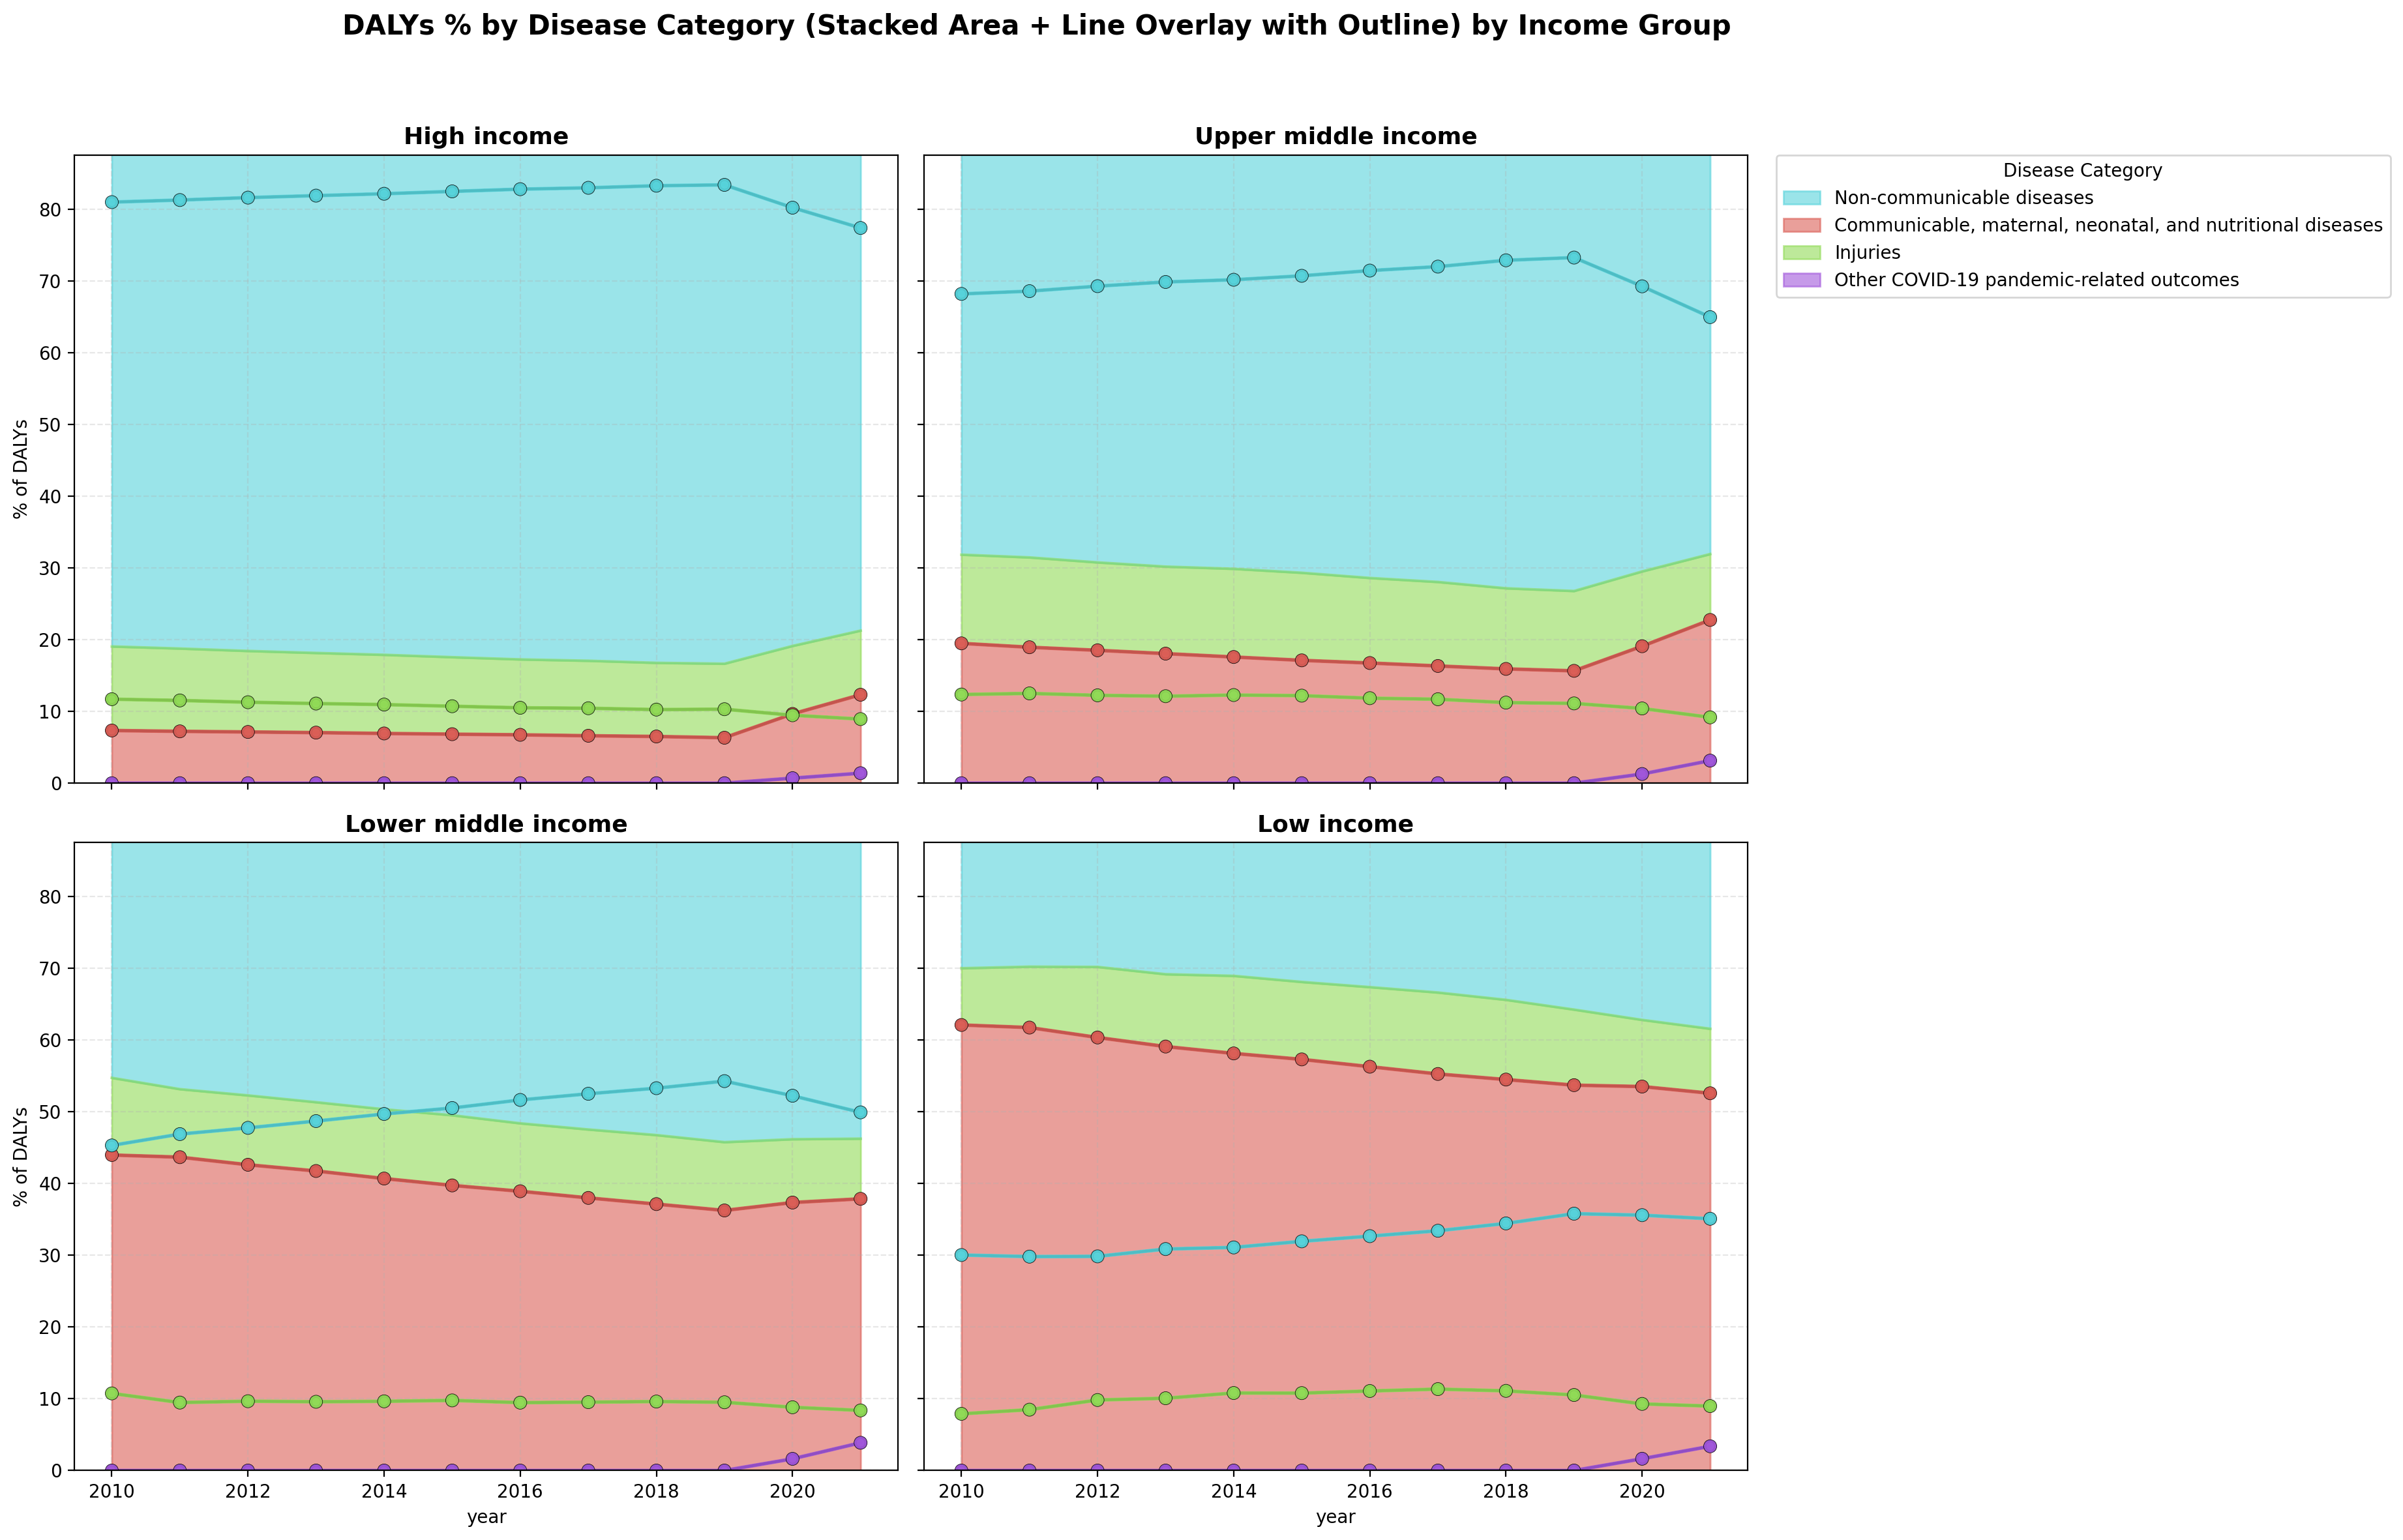

In [13]:
# ==========================
# Step 4 – Block 1: DALYs % by Disease Category
# 2x2 layout, Stacked Area + Line Overlay with Outline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patheffects as pe

# --- 1) Filter dataset สำหรับ DALYs และ Percent ---
df_dalys = df_gbd[
    (df_gbd['measure_name'] == 'DALYs (Disability-Adjusted Life Years)') &
    (df_gbd['metric_name'] == 'Percent')
].copy()

# --- 2) เลือก columns ที่จำเป็น ---
cols = ['year', 'IncomeGroup', 'cause_name', 'val']
df_dalys = df_dalys[cols]

# --- 3) Aggregate per year, IncomeGroup, and disease category ---
df_grouped = df_dalys.groupby(['year', 'IncomeGroup', 'cause_name'])['val'].sum().reset_index()

# --- 4) Compute % share per year and IncomeGroup safely ---
df_grouped['dalys_pct'] = df_grouped.groupby(['year', 'IncomeGroup'])['val'].transform(
    lambda x: x / x.sum() * 100
)

# --- 5) หา min-max ของ DALYs % ทั้ง dataset เพื่อใช้ y-axis เดียวกัน ---
y_min = 0
y_max = df_grouped['dalys_pct'].max() * 1.05  # เพิ่ม margin 5%

# --- 6) Plot Stacked Area + Line Overlay per IncomeGroup (2x2 layout) ---
income_order = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=200, sharex=True, sharey=True)
axes = axes.flatten()

# กำหนดลำดับ legend
legend_order = ['Non-communicable diseases', 'Communicable, maternal, neonatal, and nutritional diseases', 'Injuries', 'Other COVID-19 pandemic-related outcomes']

for ax, ig in zip(axes, income_order):
    df_plot = df_grouped[df_grouped['IncomeGroup'] == ig]

    # pivot for stacked area
    df_pivot = df_plot.pivot(index='year', columns='cause_name', values='dalys_pct').fillna(0)

    # dynamic colors
    categories = df_pivot.columns.tolist()
    palette_area = sns.color_palette("hls", n_colors=len(categories))

    # --- Stacked Area ---
    df_pivot.plot(
        kind='area', stacked=True, ax=ax,
        color=palette_area, alpha=0.6, legend=False
    )

    # --- Line Overlay with outline (stroke) ---
    for cat, color in zip(categories, palette_area):
        ax.plot(
            df_pivot.index, df_pivot[cat],
            marker='o', linestyle='-', color=color,
            lw=2, alpha=0.9,
            path_effects=[pe.Stroke(linewidth=1.5, foreground='black'), pe.Normal()]
        )

    # --- Formatting ---
    ax.set_title(f"{ig}", fontsize=13, fontweight='bold')
    ax.set_ylabel("% of DALYs")
    ax.set_ylim(y_min, y_max)
    ax.grid(True, linestyle='--', alpha=0.3)

# --- Legend (รวมด้านขวา) ---
# map handles to labels
handles, labels = ax.get_legend_handles_labels()
handle_dict = dict(zip(labels, handles))
handles_ordered = [handle_dict[lbl] for lbl in legend_order if lbl in handle_dict]

fig.legend(
    handles_ordered, legend_order,
    title="Disease Category",
    bbox_to_anchor=(0.85, 0.895),
    loc='upper left'
)

plt.suptitle(
    "DALYs % by Disease Category (Stacked Area + Line Overlay with Outline) by Income Group",
    fontsize=15, fontweight='bold'
)
plt.tight_layout(rect=[0, 0, 0.85, 0.95])
plt.show()

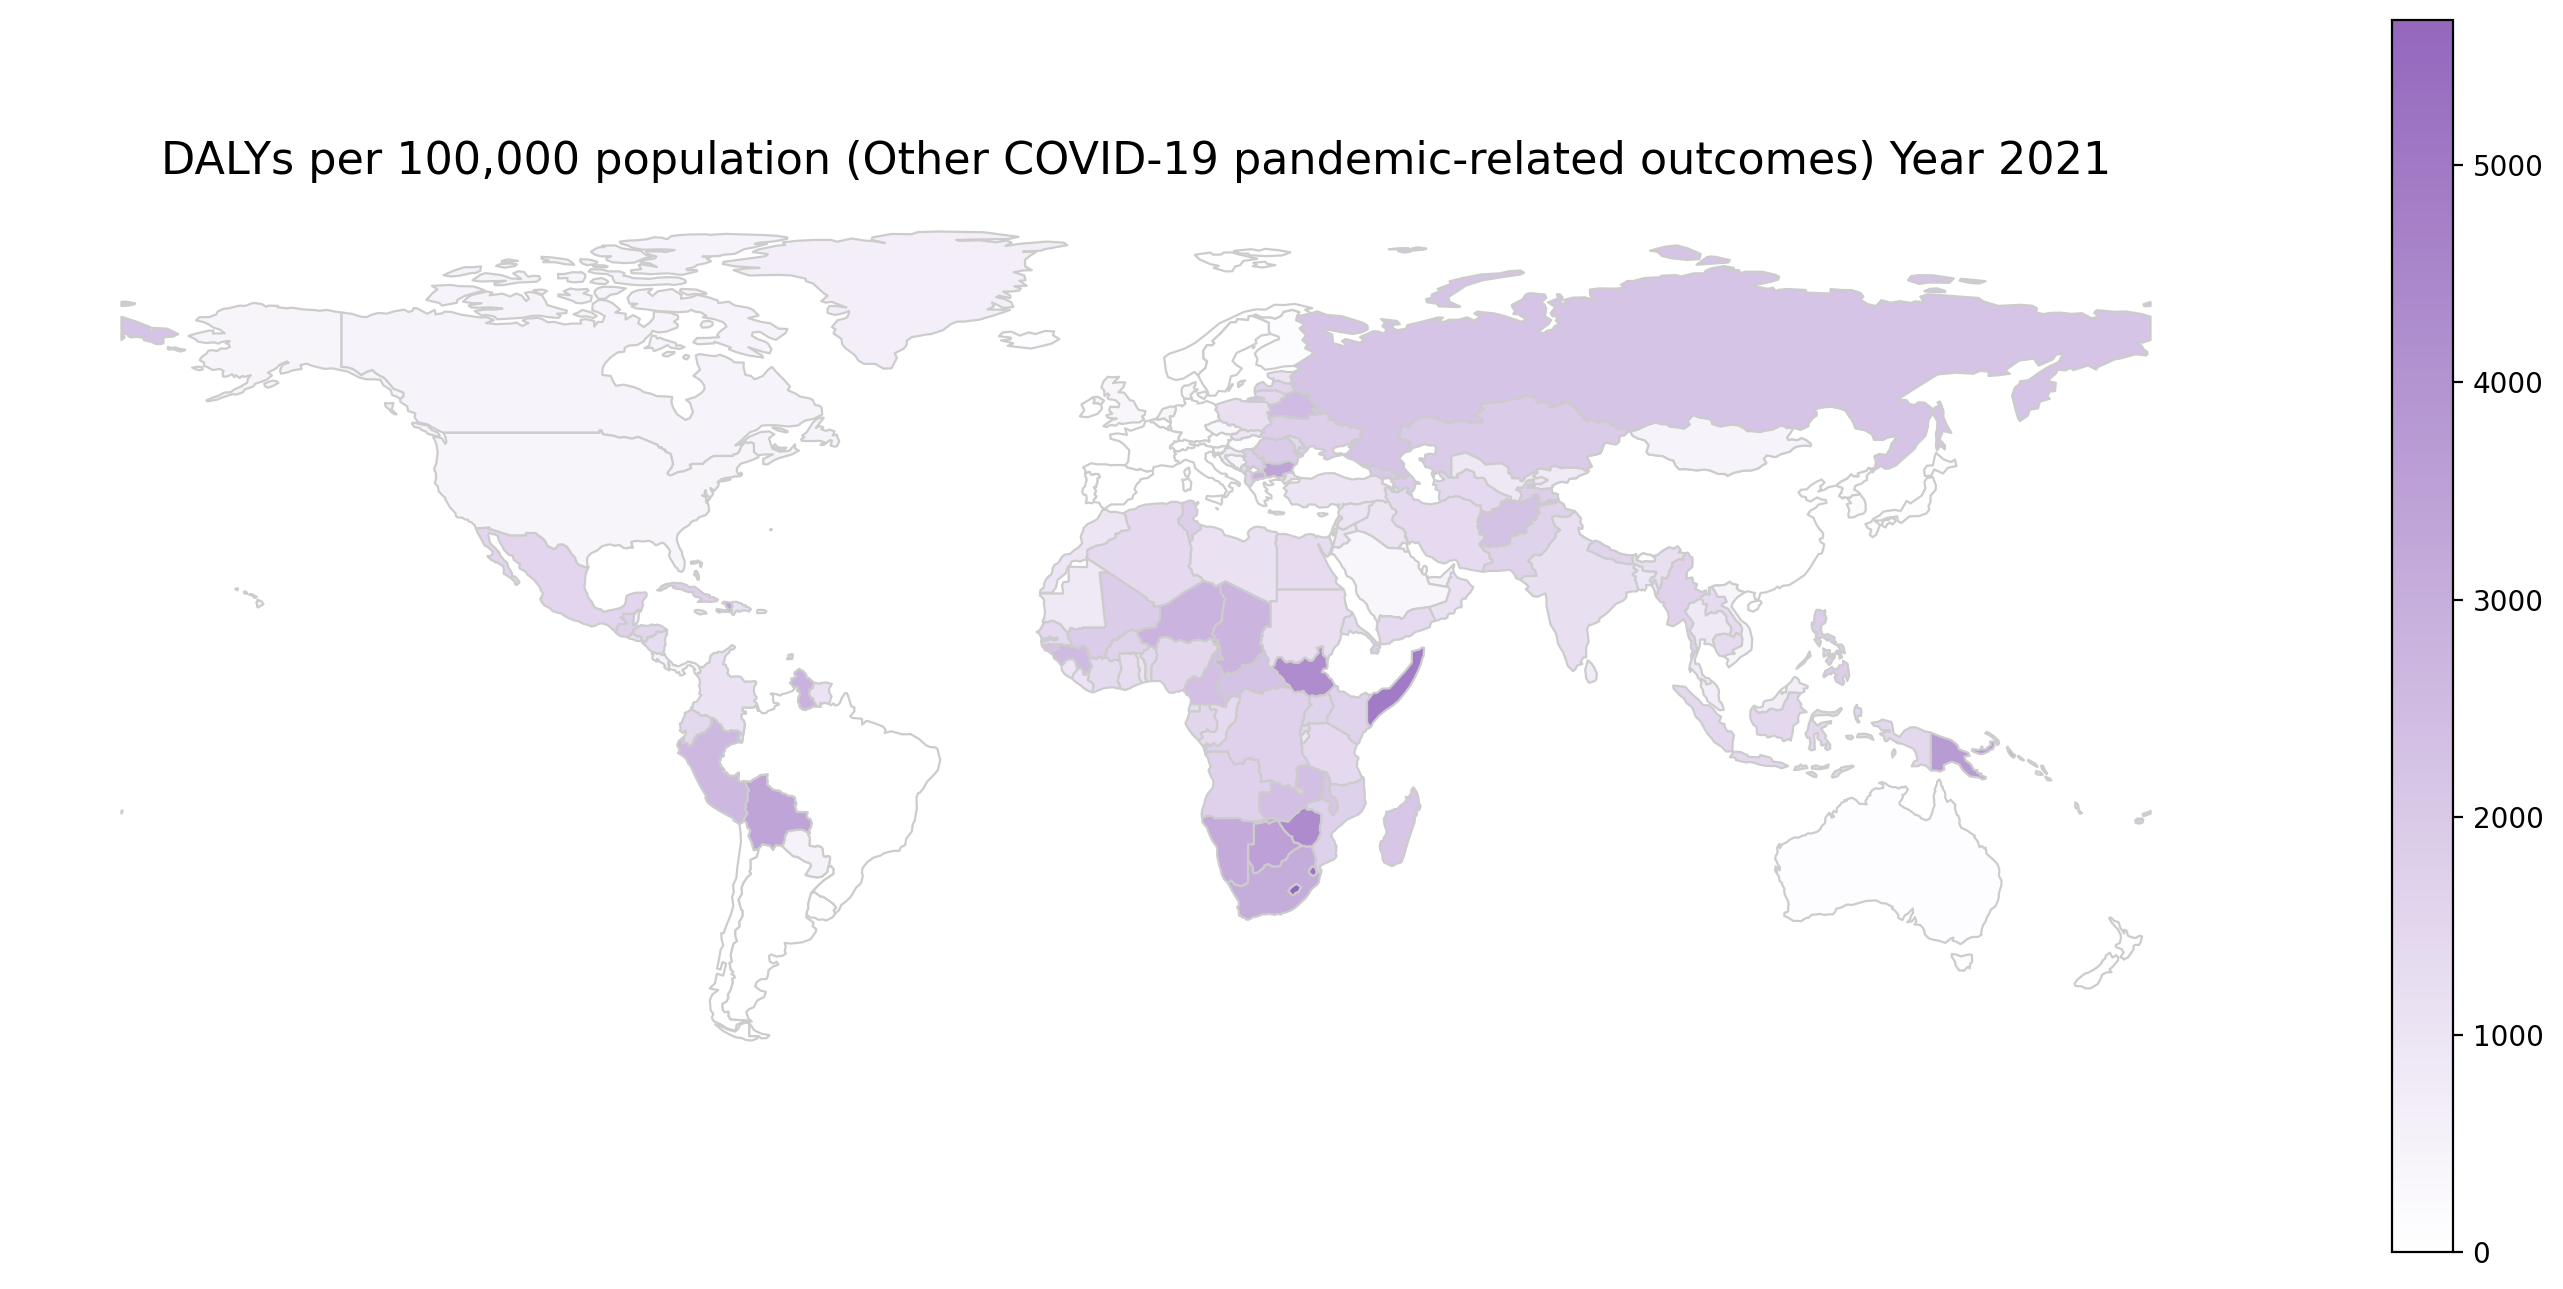

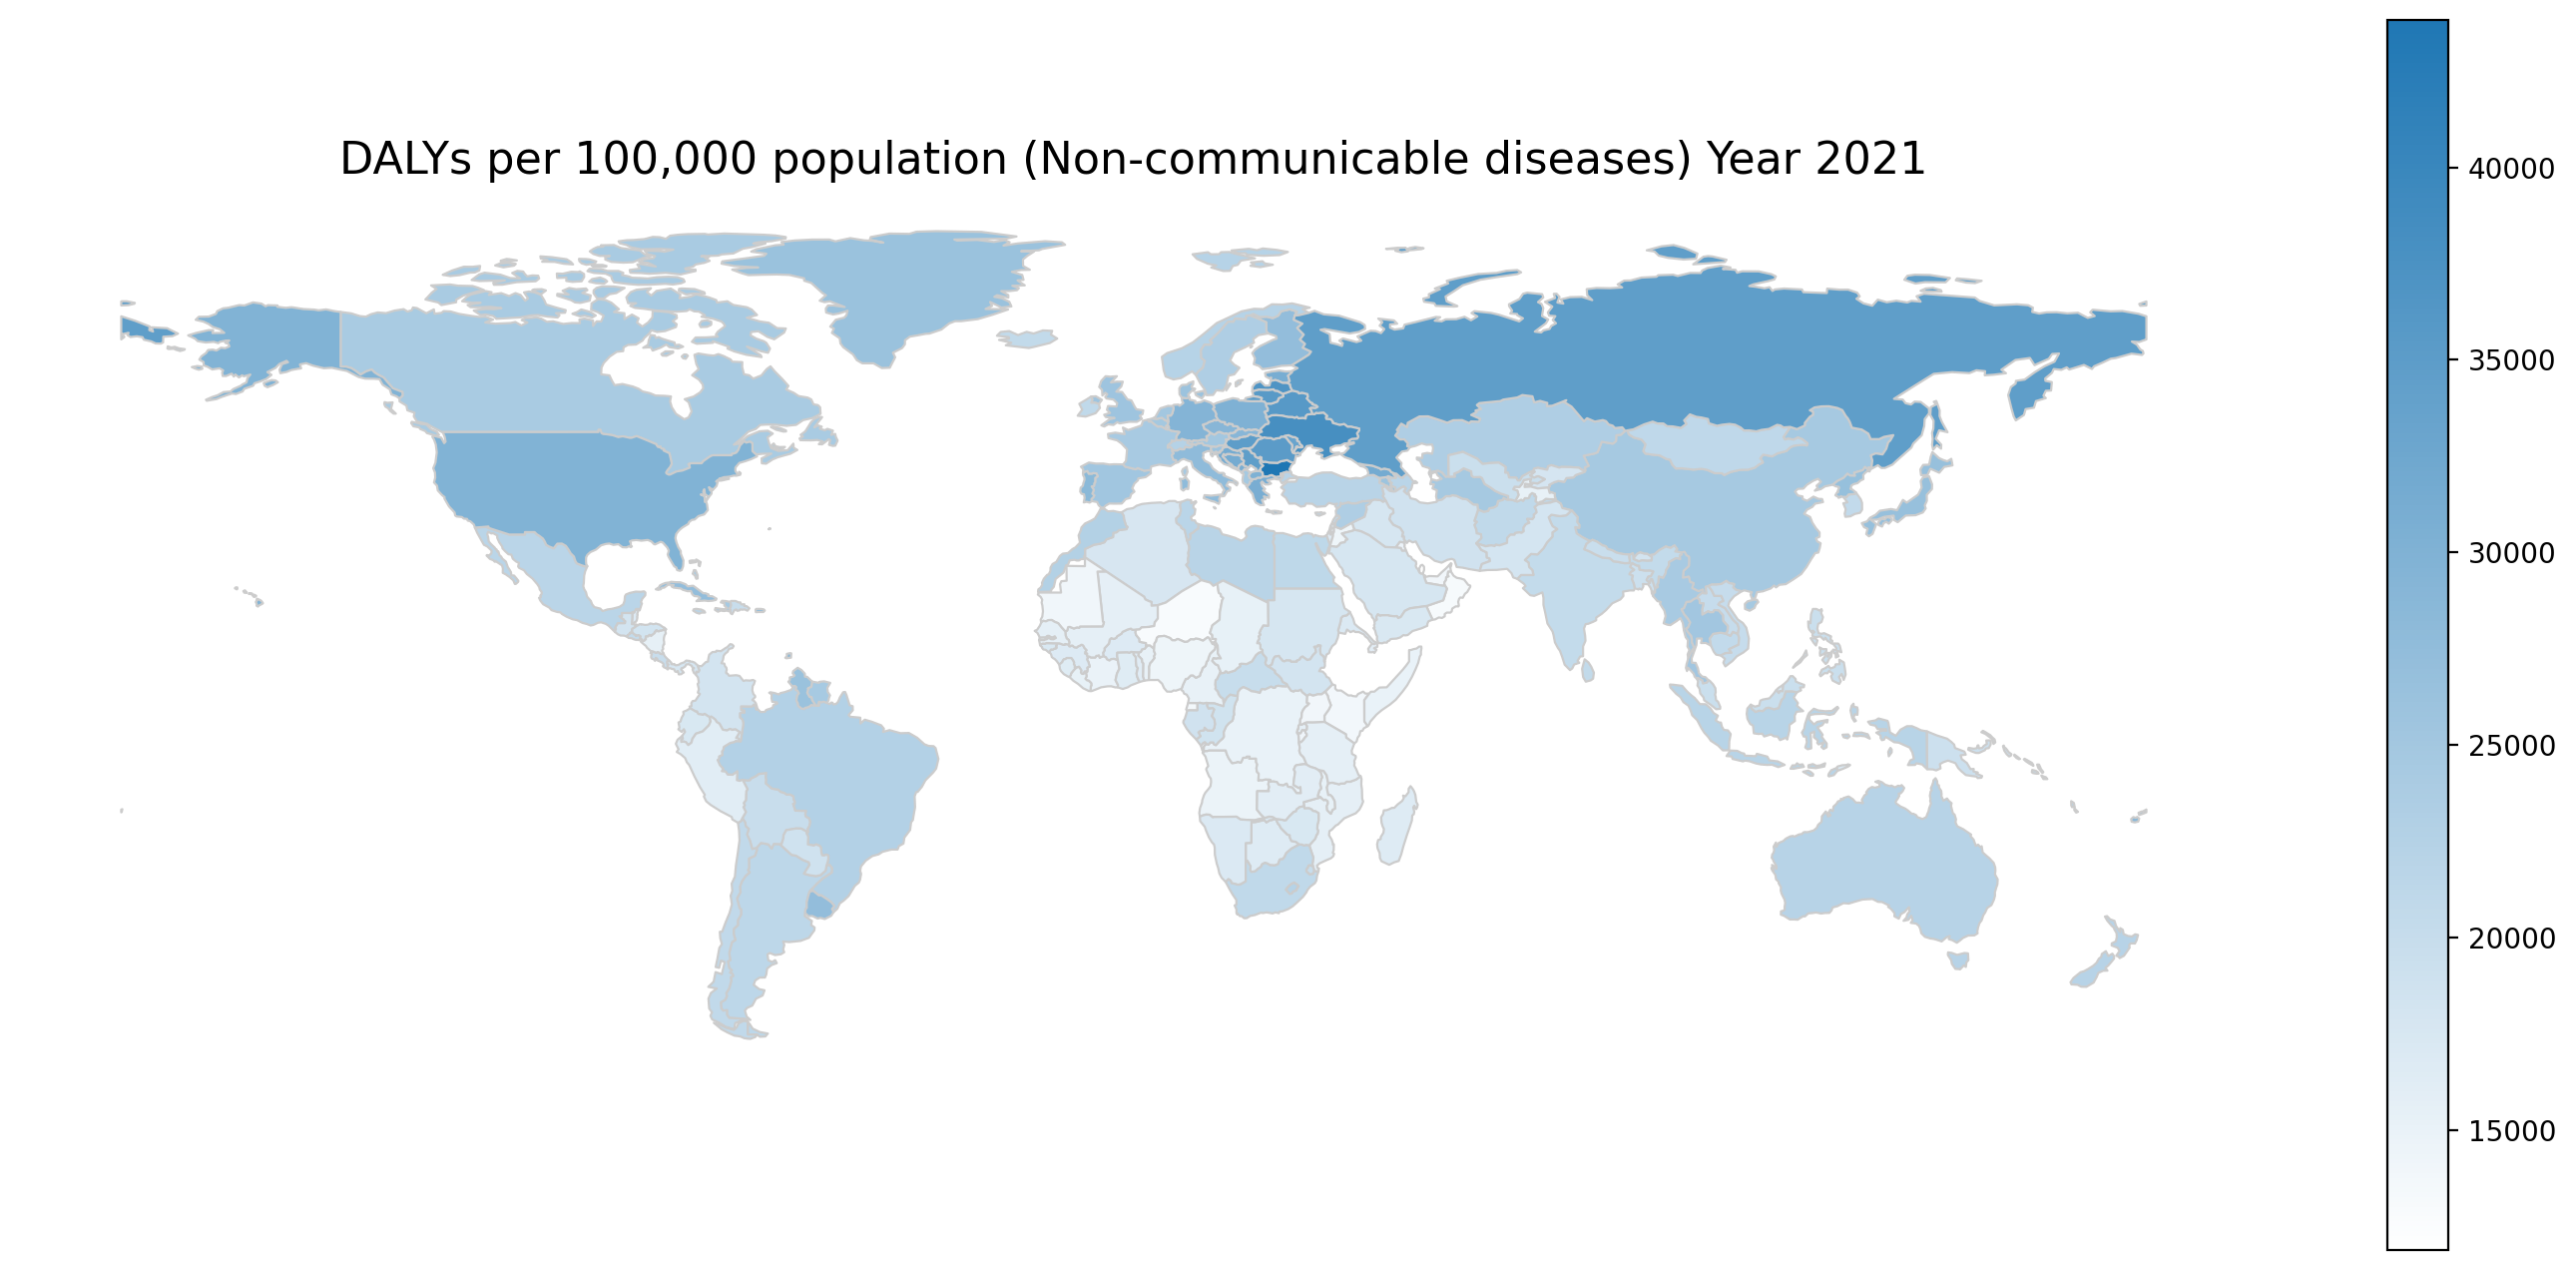

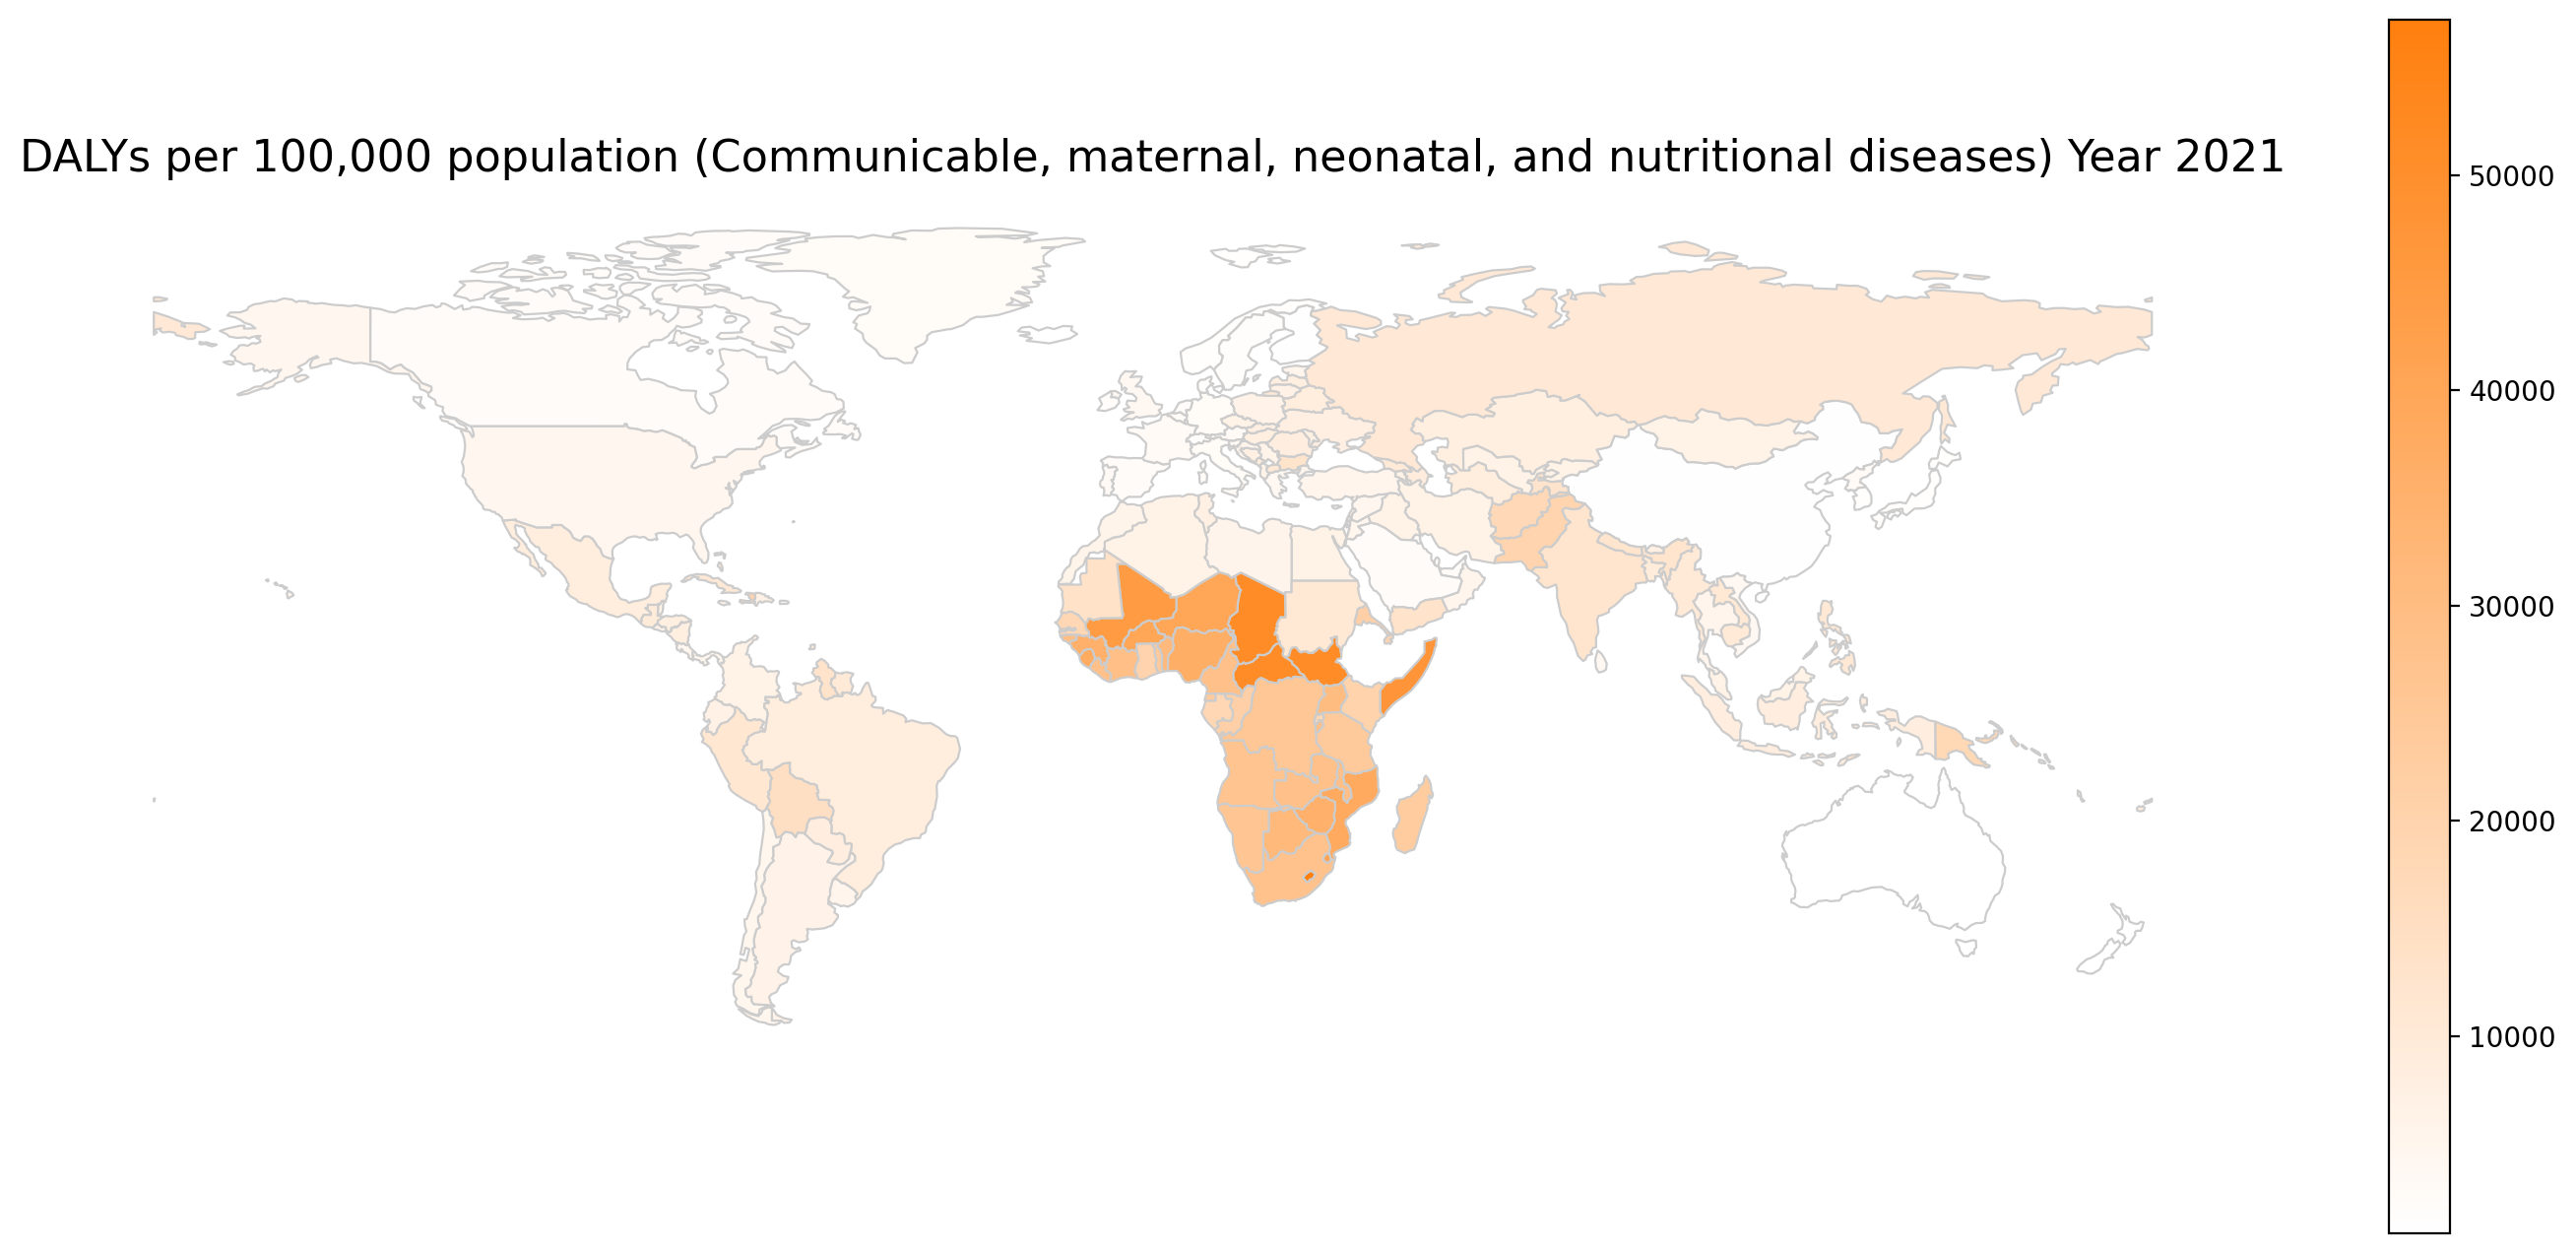

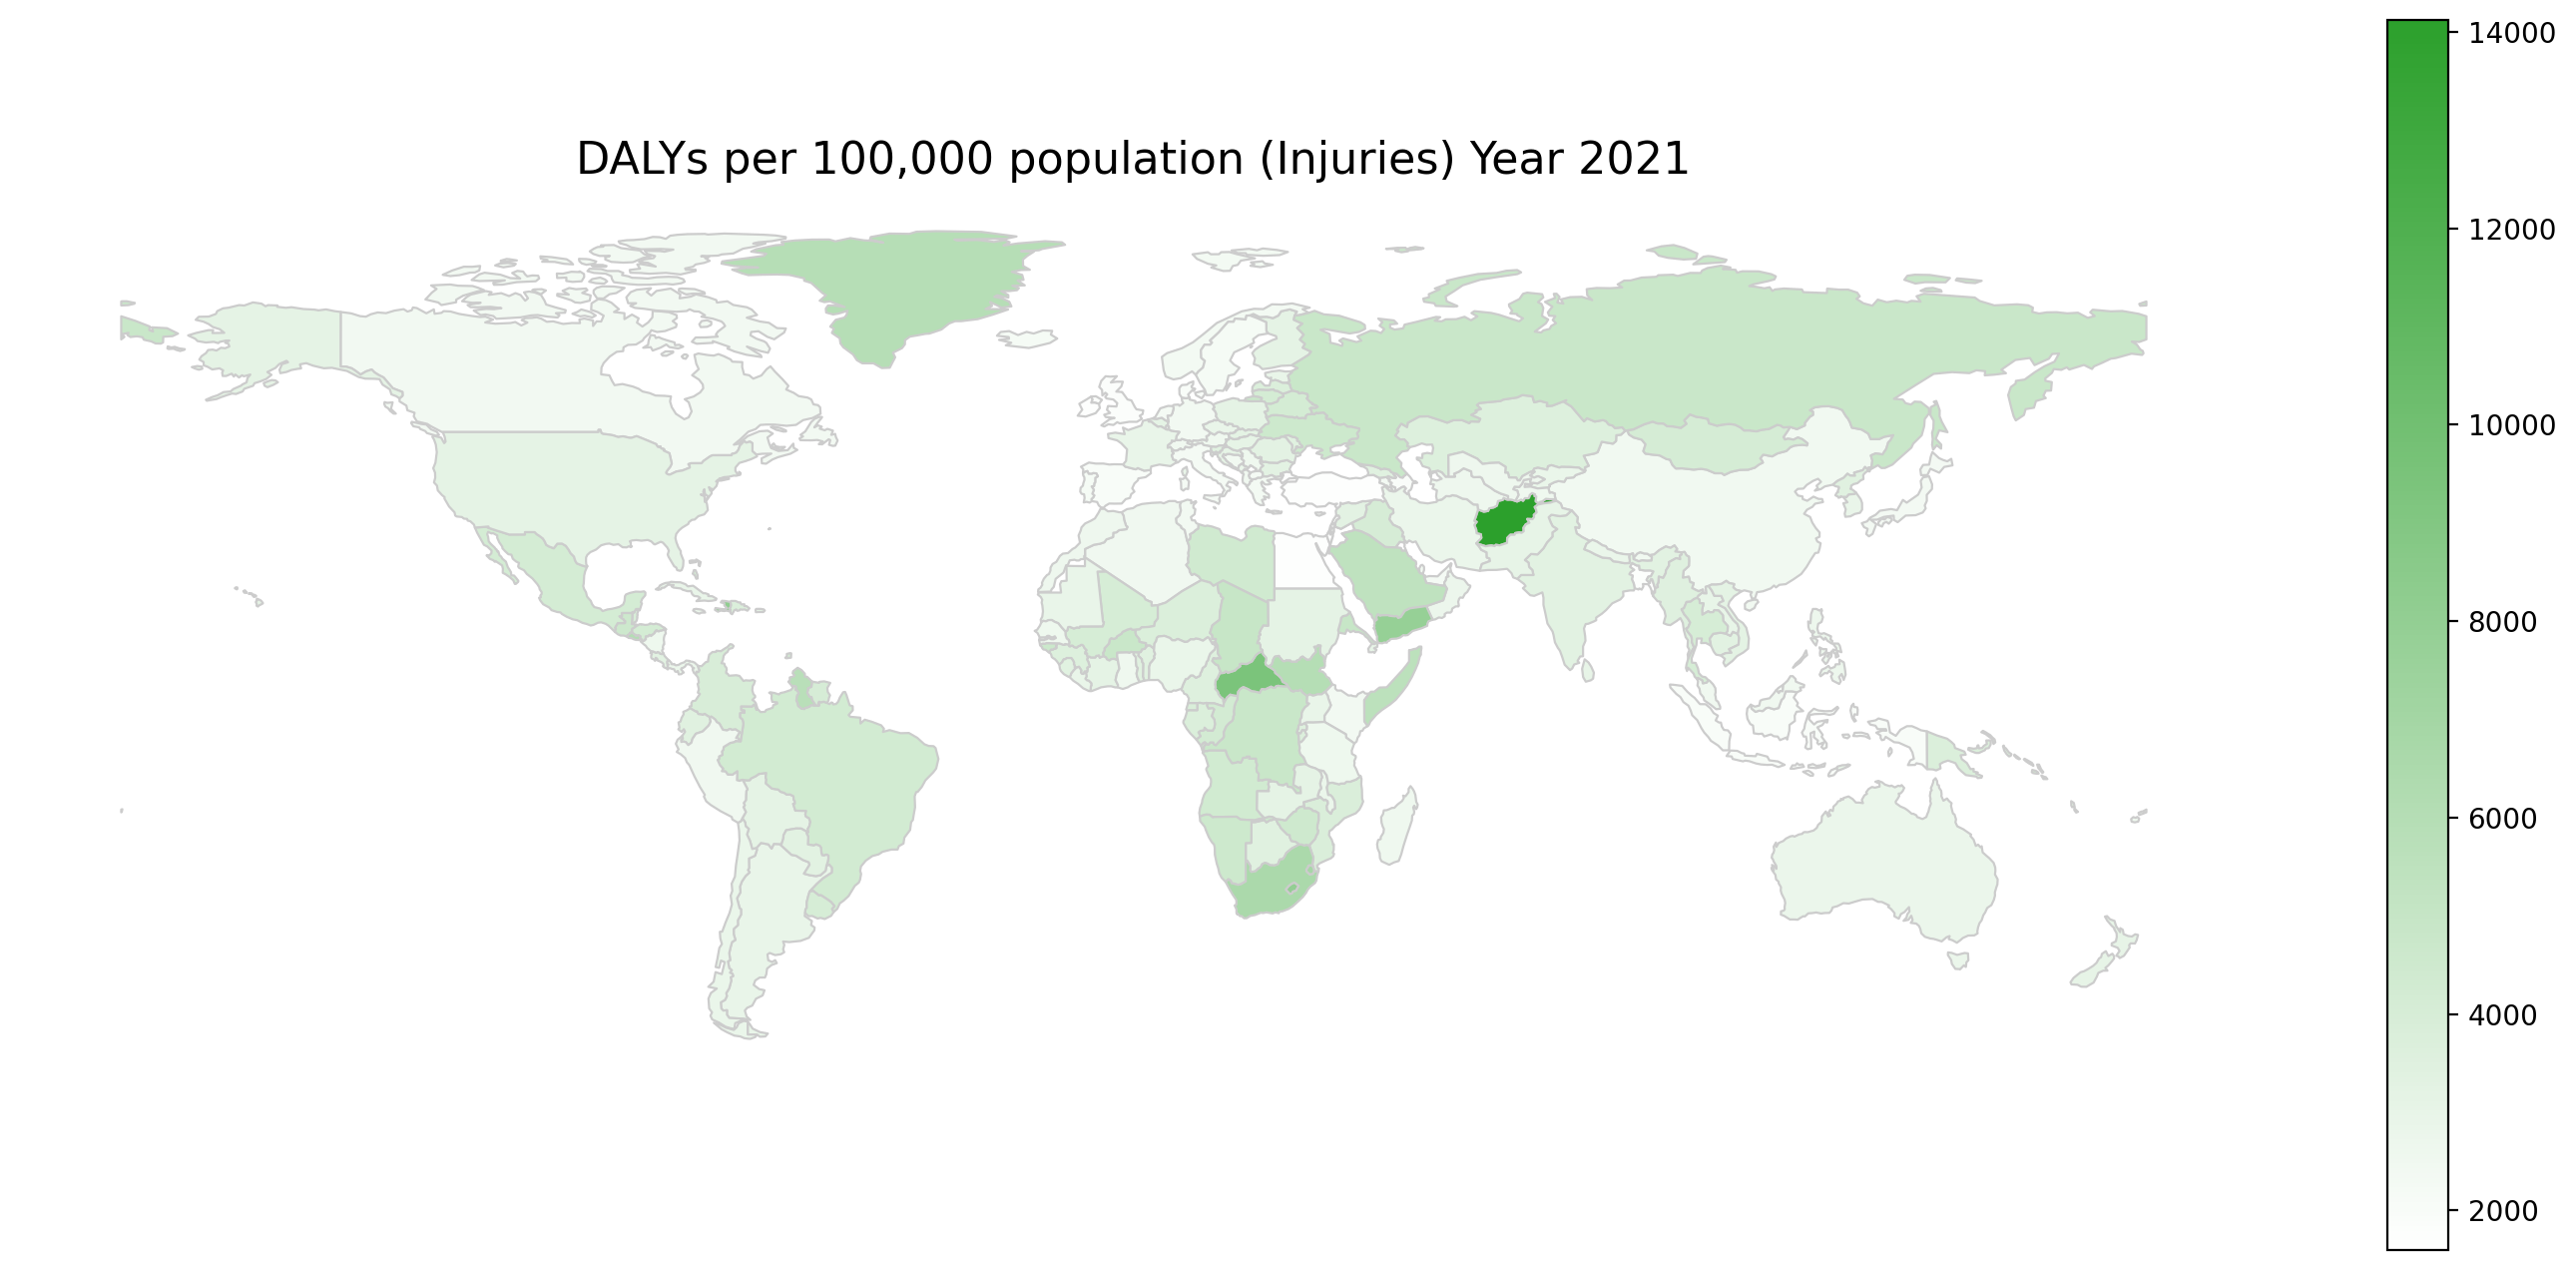

In [14]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# --- 1) Filter dataset ---
latest_year = df_gbd['year'].max()
df_latest = df_gbd[
    (df_gbd['measure_name'] == 'DALYs (Disability-Adjusted Life Years)') &
    (df_gbd['metric_name'] == 'Rate') &
    (df_gbd['year'] == latest_year)
].copy()

df_latest = df_latest[['Country Code', 'cause_name', 'val']]

# --- 2) Load world shapefile ---
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)
world = world.rename(columns={'id': 'Country Code'})

# --- 3) Merge ---
world = world.merge(df_latest, how='left', on='Country Code')

# --- 4) Define colors for categories ---
base_colors = {
    'Non-communicable diseases': '#1f77b4',    # ฟ้า
    'Communicable, maternal, neonatal, and nutritional diseases': '#ff7f0e', # ส้ม
    'Injuries': '#2ca02c',  # เขียว
    'Other COVID-19 pandemic-related outcomes': '#9467bd'  # ม่วง
}

# --- 5) Plot per category with gradient ---
categories = df_latest['cause_name'].unique()

for cat in categories:
    fig, ax = plt.subplots(1,1, figsize=(18,8), dpi=200)

    world_cat = world[world['cause_name'] == cat]

    # Create gradient colormap from light → base color
    cmap = LinearSegmentedColormap.from_list(f"{cat}_cmap", ['#ffffff', base_colors[cat]])

    world_cat.plot(
        column='val',
        cmap=cmap,
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True
    )

    ax.set_title(f'DALYs per 100,000 population ({cat}) Year {latest_year}', fontsize=16)
    ax.axis('off')

    plt.show()


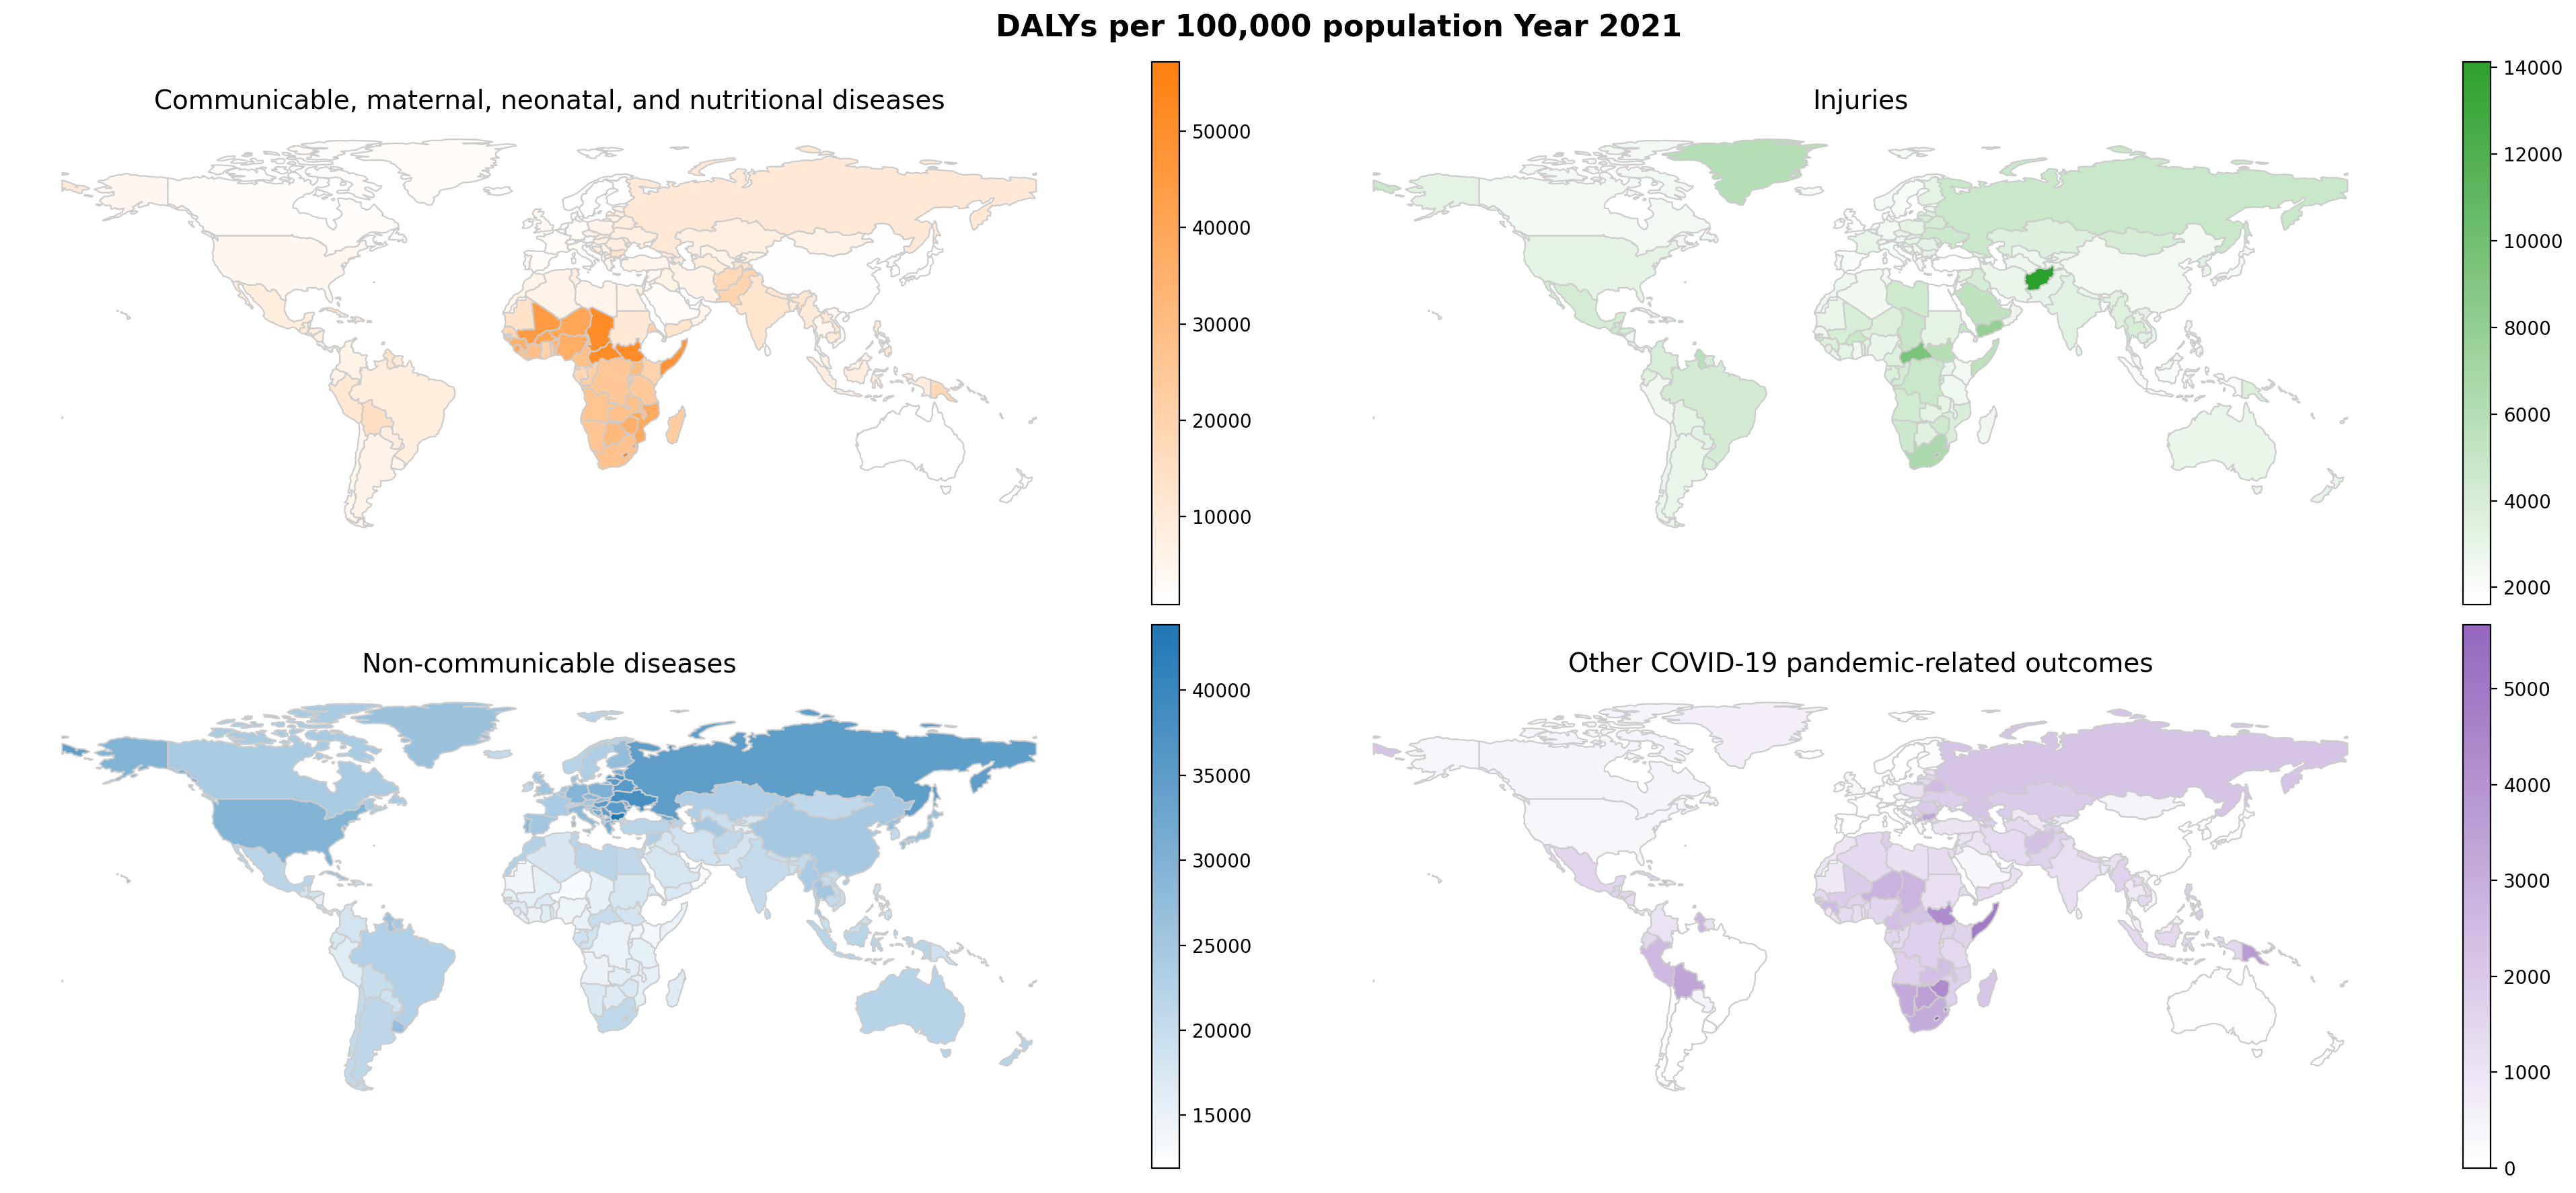

In [15]:
# ==========================
# Full Run-Ready: Choropleth Map – All Categories in Subplots

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# --- 1) Filter dataset สำหรับ metric และปีล่าสุด ---
latest_year = df_gbd['year'].max()
df_latest = df_gbd[
    (df_gbd['measure_name'] == 'DALYs (Disability-Adjusted Life Years)') &
    (df_gbd['metric_name'] == 'Rate') &
    (df_gbd['year'] == latest_year)
].copy()

df_latest = df_latest[['Country Code', 'cause_name', 'val']]

# --- 2) Load world shapefile ---
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
world = gpd.read_file(url)
world = world.rename(columns={'id': 'Country Code'})

# --- 3) Merge DALYs กับ shapefile ---
world = world.merge(df_latest, how='left', on='Country Code')

# --- 4) Define base colors per category ---
base_colors = {
    'Non-communicable diseases': '#1f77b4',    # ฟ้า
    'Communicable, maternal, neonatal, and nutritional diseases': '#ff7f0e', # ส้ม
    'Injuries': '#2ca02c',  # เขียว
    'Other COVID-19 pandemic-related outcomes': '#9467bd'  # ม่วง
}

# --- 5) Plot all categories in subplots ---
categories = ['Communicable, maternal, neonatal, and nutritional diseases',
              'Injuries',
              'Non-communicable diseases',
              'Other COVID-19 pandemic-related outcomes']

fig, axes = plt.subplots(2, 2, figsize=(20,9), dpi=200)
fig.suptitle(f'DALYs per 100,000 population Year {latest_year}', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, cat in enumerate(categories):
    ax = axes[i]
    world_cat = world[world['cause_name'] == cat]

    # Gradient colormap: white -> base color
    cmap = LinearSegmentedColormap.from_list(f"{cat}_cmap", ['#ffffff', base_colors[cat]])

    world_cat.plot(
        column='val',
        cmap=cmap,
        linewidth=0.8,
        ax=ax,
        edgecolor='0.8',
        legend=True
    )

    ax.set_title(f'{cat}', fontsize=14)
    ax.axis('off')

plt.tight_layout()
plt.show()


# 05 Linking Disease Burden to Spending





In [16]:
# --- Block 1: Setup & File Paths ---

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# สำหรับ regression plot
import seaborn.objects as so

# Google Drive path
data_path = "/content/drive/MyDrive/Use"

# File paths
file_dalys = f"{data_path}/gbd_cause_of_death.csv"                  # DALYs by cause
file_health_exp = f"{data_path}/health_expense_country.csv" # Health Expenditure per capita
file_pharma_exp = f"{data_path}/pharm_expense_2010-2023.csv" # Pharma Expenditure (OECD)
file_population = f"{data_path}/aging _65_and_above.csv"         # ใช้ %65+ population


In [17]:
# --- Block 2.1: Load & Preview ---

# Load datasets
df_dalys = pd.read_csv(file_dalys)
df_hexp = pd.read_csv(file_health_exp)
df_pharma = pd.read_csv(file_pharma_exp)
df_pop65 = pd.read_csv(file_population)

# Show preview as DataFrame
display(df_dalys.head())
display(df_hexp.head())
display(df_pharma.head())
display(df_pop65.head())

# Optional: shape summary
df_shapes = pd.DataFrame({
    "Dataset": ["DALYs", "Health Exp", "Pharma Exp", "Population 65+"],
    "Rows": [df_dalys.shape[0], df_hexp.shape[0], df_pharma.shape[0], df_pop65.shape[0]],
    "Columns": [df_dalys.shape[1], df_hexp.shape[1], df_pharma.shape[1], df_pop65.shape[1]]
})
display(df_shapes)


measure_id measure_name  location_id location_name Country Code  \
0           1       Deaths           52       Romania          ROU   
1           1       Deaths           52       Romania          ROU   
2           1       Deaths           52       Romania          ROU   
3           1       Deaths           35       Georgia          GEO   
4           1       Deaths           35       Georgia          GEO   

                  Region          IncomeGroup  sex_id sex_name  age_id  \
0  Europe & Central Asia          High income       3     Both      22   
1  Europe & Central Asia          High income       3     Both      22   
2  Europe & Central Asia          High income       3     Both      22   
3  Europe & Central Asia  Upper middle income       3     Both      22   
4  Europe & Central Asia  Upper middle income       3     Both      22   

   age_name  cause_id                                cause_name  metric_id  \
0  All ages       409                 Non-communicable diseases          1   
1  All ages       409                 Non-communicable diseases          2   
2  All ages       409                 Non-communicable diseases          3   
3  All ages      1058  Other COVID-19 pandemic-related outcomes          1   
4  All ages      1058  Other COVID-19 pandemic-related outcomes          2   

  metric_name  year            val          upper          lower  
0      Number  2010  238628.930900  240373.994100  236982.670600  
1     Percent  2010       0.920526       0.922522       0.918877  
2        Rate  2010    1153.518706    1161.954242    1145.560777  
3      Number  2010       0.000000       0.000000       0.000000  
4     Percent  2010       0.000000       0.000000       0.000000

Country Name Country Code  \
0                        World          WLD   
1                  Afghanistan          AFG   
2  Africa Eastern and Southern          AFE   
3   Africa Western and Central          AFW   
4                      Albania          ALB   

                                              Region          IncomeGroup  \
0                                                  0                    0   
1  Middle East, North Africa, Afghanistan & Pakistan           Low income   
2                                                  0                    0   
3                                                  0                    0   
4                              Europe & Central Asia  Upper middle income   

                                         Series Name        Series Code  \
0  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
1  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
2  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
3  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
4  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   900.1769017   974.1274671   982.0741499    992.234653   1014.944203   
1   46.42438889   52.18721771   52.45247269   56.16043472   60.04951096   
2    104.119647   112.2783817   109.0685562   104.7767173   98.49932875   
3   59.63198718   65.36715007    67.9295613   75.42266559   78.72483058   
4   253.9824677   273.7529297    260.683197   276.0765686   293.1267395   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   973.1539973   990.8286891   1027.118651    1066.64776   1084.163977   
1   59.91960526   61.37234497   66.82388306   71.22509003    74.0642395   
2   90.80057087   85.89921738   90.01315049   90.07565325   87.29824614   
3   70.66991392   61.44808881   58.22151491   56.12426456   59.06952771   
4   253.9334717   275.4367676    295.523468   349.2112732   366.3401489   

  2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023] 2024 [YR2024]  
0    1158.07093   1245.909858   1235.603151            ..            ..  
1    80.0892334   81.52112579    80.6516037            ..            ..  
2   81.55189502   92.38657488   92.58152097            ..            ..  
3   64.40742275   72.24109467   74.42135122            ..            ..  
4   396.1747742   465.5704346   414.3502502            ..            ..

Country Name Country Code  Year  US dollars/capita
0  United States          USA  2010           1146.495
1         Greece          GRC  2010            963.584
2         Canada          CAN  2010            911.490
3         France          FRA  2010            884.065
4        Germany          DEU  2010            870.773

Country Name Country Code  \
0                        World          WLD   
1                  Afghanistan          AFG   
2  Africa Eastern and Southern          AFE   
3   Africa Western and Central          AFW   
4                      Albania          ALB   

                                         Series Name        Series Code  \
0  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
1  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
4  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   7.579272993   7.662245788   7.784011289   7.921371254   8.077442882   
1   2.306614901   2.322140455   2.337911339   2.349769014   2.356535665   
2   2.948241908   2.951663664   2.962178526    2.97806605   2.998143998   
3   2.953771184   2.952036693   2.948626144   2.940205521   2.924323974   
4   10.92005505    11.2281831   11.50931408   11.82013518   12.16676921   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   8.257479376   8.448078985   8.654188218   8.875576344   9.104697573   
1   2.356695063   2.355497361   2.359737022   2.367120477   2.376153383   
2   3.020980063   3.044976799   3.074828314   3.113922348   3.157141942   
3   2.910265408   2.903209401   2.900339854   2.902687891   2.910184961   
4   12.54310654   12.92021216   13.30539111   13.73952183   14.24809866   

  2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023] 2024 [YR2024]  
0   9.330854124   9.526808074   9.738931635   9.981301095   10.20073927  
1   2.370733824   2.352549519   2.355142367   2.377537528   2.400970027  
2   3.192169102   3.216572769   3.246111381   3.286462923   3.331142169  
3   2.916504061   2.923993205   2.939791791   2.962248384   2.987953314  
4   14.76700441   15.26600507   15.77633816   16.30200007    16.9227562

Dataset   Rows  Columns
0           DALYs  58752       19
1      Health Exp    266       21
2      Pharma Exp    477        4
3  Population 65+    266       19

In [27]:
# --- Block 2.2: Clean datasets (selective drop & Health Expenditure row cleaning) ---

# === 1) Health Expenditure ===
# Drop future year columns
cols_to_drop_hexp = ['2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']
df_hexp = df_hexp.drop(columns=[c for c in cols_to_drop_hexp if c in df_hexp.columns])

# Drop rows ที่ Region = '0' หรือ '#N/A' OR IncomeGroup = '0' หรือ '#N/A' OR Country Name = 'Not classified'
df_hexp = df_hexp[~(
    df_hexp['Region'].isin(['0', '#N/A']) |
    df_hexp['IncomeGroup'].isin(['0', '#N/A']) |
    (df_hexp['Country Name'] == 'Not classified')
)]

# === 2) Population 65+ ===
cols_to_drop_pop65 = ['2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']
df_pop65 = df_pop65.drop(columns=[c for c in cols_to_drop_pop65 if c in df_pop65.columns])

# === 3) Pharma Expenditure (OECD) ===
# Drop rows year = 2022 or 2023
df_pharma = df_pharma[~df_pharma['Year'].isin([2022, 2023])]

# === 4) Quick preview ===
print("Health Expenditure cleaned:")
display(df_hexp.head())
print(f"Remaining rows: {df_hexp.shape[0]}")

print("\nPopulation 65+ cleaned:")
display(df_pop65.head())

print("\nPharma Expenditure cleaned:")
display(df_pharma.head())


Health Expenditure cleaned:


Country Name Country Code  \
1     Afghanistan          AFG   
4         Albania          ALB   
5         Algeria          DZA   
6  American Samoa          ASM   
7         Andorra          AND   

                                              Region          IncomeGroup  \
1  Middle East, North Africa, Afghanistan & Pakistan           Low income   
4                              Europe & Central Asia  Upper middle income   
5  Middle East, North Africa, Afghanistan & Pakistan  Upper middle income   
6                                East Asia & Pacific          High income   
7                              Europe & Central Asia          High income   

                                         Series Name        Series Code  \
1  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
4  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
5  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
6  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   
7  Current health expenditure per capita (current...  SH.XPD.CHEX.PC.CD   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
1   46.42438889   52.18721771   52.45247269   56.16043472   60.04951096   
4   253.9824677   273.7529297    260.683197   276.0765686   293.1267395   
5   227.9539642   285.5020752   340.0913391   337.5736084   366.5867004   
6            ..            ..            ..            ..            ..   
7   3277.785156   3550.908203   2785.188965   2887.025879   3001.196045   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
1   59.91960526   61.37234497   66.82388306   71.22509003    74.0642395   
4   253.9334717   275.4367676    295.523468   349.2112732   366.3401489   
5   296.7682495   265.5343933   270.9326172   271.5377808   242.0700226   
6            ..            ..            ..            ..            ..   
7   2672.264648   2769.152832   2876.178711   3158.136475   3021.432617   

  2020 [YR2020] 2021 [YR2021]  
1    80.0892334   81.52112579  
4   396.1747742   465.5704346  
5   211.0727692    208.526825  
6            ..            ..  
7   3282.817383   3535.989746

Remaining rows: 215

Population 65+ cleaned:


Country Name Country Code  \
0                        World          WLD   
1                  Afghanistan          AFG   
2  Africa Eastern and Southern          AFE   
3   Africa Western and Central          AFW   
4                      Albania          ALB   

                                         Series Name        Series Code  \
0  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
1  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
2  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
3  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   
4  Population ages 65 and above (% of total popul...  SP.POP.65UP.TO.ZS   

  2010 [YR2010] 2011 [YR2011] 2012 [YR2012] 2013 [YR2013] 2014 [YR2014]  \
0   7.579272993   7.662245788   7.784011289   7.921371254   8.077442882   
1   2.306614901   2.322140455   2.337911339   2.349769014   2.356535665   
2   2.948241908   2.951663664   2.962178526    2.97806605   2.998143998   
3   2.953771184   2.952036693   2.948626144   2.940205521   2.924323974   
4   10.92005505    11.2281831   11.50931408   11.82013518   12.16676921   

  2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
0   8.257479376   8.448078985   8.654188218   8.875576344   9.104697573   
1   2.356695063   2.355497361   2.359737022   2.367120477   2.376153383   
2   3.020980063   3.044976799   3.074828314   3.113922348   3.157141942   
3   2.910265408   2.903209401   2.900339854   2.902687891   2.910184961   
4   12.54310654   12.92021216   13.30539111   13.73952183   14.24809866   

  2020 [YR2020] 2021 [YR2021]  
0   9.330854124   9.526808074  
1   2.370733824   2.352549519  
2   3.192169102   3.216572769  
3   2.916504061   2.923993205  
4   14.76700441   15.26600507


Pharma Expenditure cleaned:


Country Name Country Code  Year  US dollars/capita
0  United States          USA  2010           1146.495
1         Greece          GRC  2010            963.584
2         Canada          CAN  2010            911.490
3         France          FRA  2010            884.065
4        Germany          DEU  2010            870.773

In [28]:
# --- Block 3.1a: Clean → Merge → Aggregate DALYs vs Health Expenditure ---

import pandas as pd
import numpy as np

# -----------------------------
# 1) Filter DALYs dataset
# -----------------------------
causes_of_interest = [
    "Other COVID-19 pandemic-related outcomes",
    "Non-communicable diseases",
    "Communicable, maternal, neonatal, and nutritional diseases",
    "Injuries"
]

df_dalys_clean = df_dalys[
    (df_dalys['measure_name'] == "DALYs (Disability-Adjusted Life Years)") &
    (df_dalys['cause_name'].isin(causes_of_interest)) &
    (df_dalys['metric_name'] == "Rate")
][['Country Code', 'Region', 'IncomeGroup', 'cause_name', 'metric_name', 'year', 'val']]

df_dalys_clean = df_dalys_clean.rename(columns={'val':'DALYs_rate'})

# Convert DALYs_rate to numeric
df_dalys_clean['DALYs_rate'] = pd.to_numeric(df_dalys_clean['DALYs_rate'], errors='coerce')

# Drop rows where conversion failed
df_dalys_clean = df_dalys_clean.dropna(subset=['DALYs_rate'])

# -----------------------------
# 2) Clean Health Expenditure dataset (wide → long)
# -----------------------------
year_cols = [col for col in df_hexp.columns if col.startswith(tuple(str(y) for y in range(2010,2022)))]

df_hexp_clean = df_hexp.melt(
    id_vars=['Country Name','Country Code','Region','IncomeGroup'],
    value_vars=year_cols,
    var_name='year',
    value_name='HE_per_capita'
)

# Extract numeric year from column names like '2010 [YR2010]'
df_hexp_clean['year'] = df_hexp_clean['year'].str.extract(r'(\d{4})').astype(int)

# Convert HE_per_capita to numeric
df_hexp_clean['HE_per_capita'] = pd.to_numeric(df_hexp_clean['HE_per_capita'], errors='coerce')

# Drop rows where conversion failed
df_hexp_clean = df_hexp_clean.dropna(subset=['HE_per_capita'])

# -----------------------------
# 3) Merge DALYs + Health Expenditure
# -----------------------------
df_merge = pd.merge(
    df_dalys_clean,
    df_hexp_clean[['Country Code','year','HE_per_capita']],
    on=['Country Code','year'],
    how='left'
)

# Keep relevant metadata
df_merge = df_merge[['Country Code','Region','IncomeGroup','year','cause_name','metric_name','DALYs_rate','HE_per_capita']]

# Drop any remaining missing values
df_merge = df_merge.dropna(subset=['DALYs_rate','HE_per_capita'])

# -----------------------------
# 4) Aggregate per country & IncomeGroup (2010–2021 avg)
# -----------------------------
df_merge_avg = (
    df_merge.groupby(['Country Code','IncomeGroup'], as_index=False)
    .agg({
        'HE_per_capita':'mean',
        'DALYs_rate':'mean'
    })
)

# -----------------------------
# 5) Log-transform for plot/regression
# -----------------------------
df_merge_avg['log_HE'] = np.log(df_merge_avg['HE_per_capita'])
df_merge_avg['log_DALY'] = np.log(df_merge_avg['DALYs_rate'])

# --- Check result ---
df_merge_avg.head()


Country Code          IncomeGroup  HE_per_capita    DALYs_rate    log_HE  \
0          AFG           Low income      63.524129  13790.244770  4.151420   
1          AGO  Lower middle income     100.018152  13263.458407  4.605352   
2          ALB  Upper middle income     313.317687   7096.716651  5.747218   
3          AND          High income    3068.173055   6502.836161  8.028838   
4          ARE          High income    1807.703013   4384.544961  7.499812   

   log_DALY  
0  9.531717  
1  9.492768  
2  8.867388  
3  8.779994  
4  8.385841

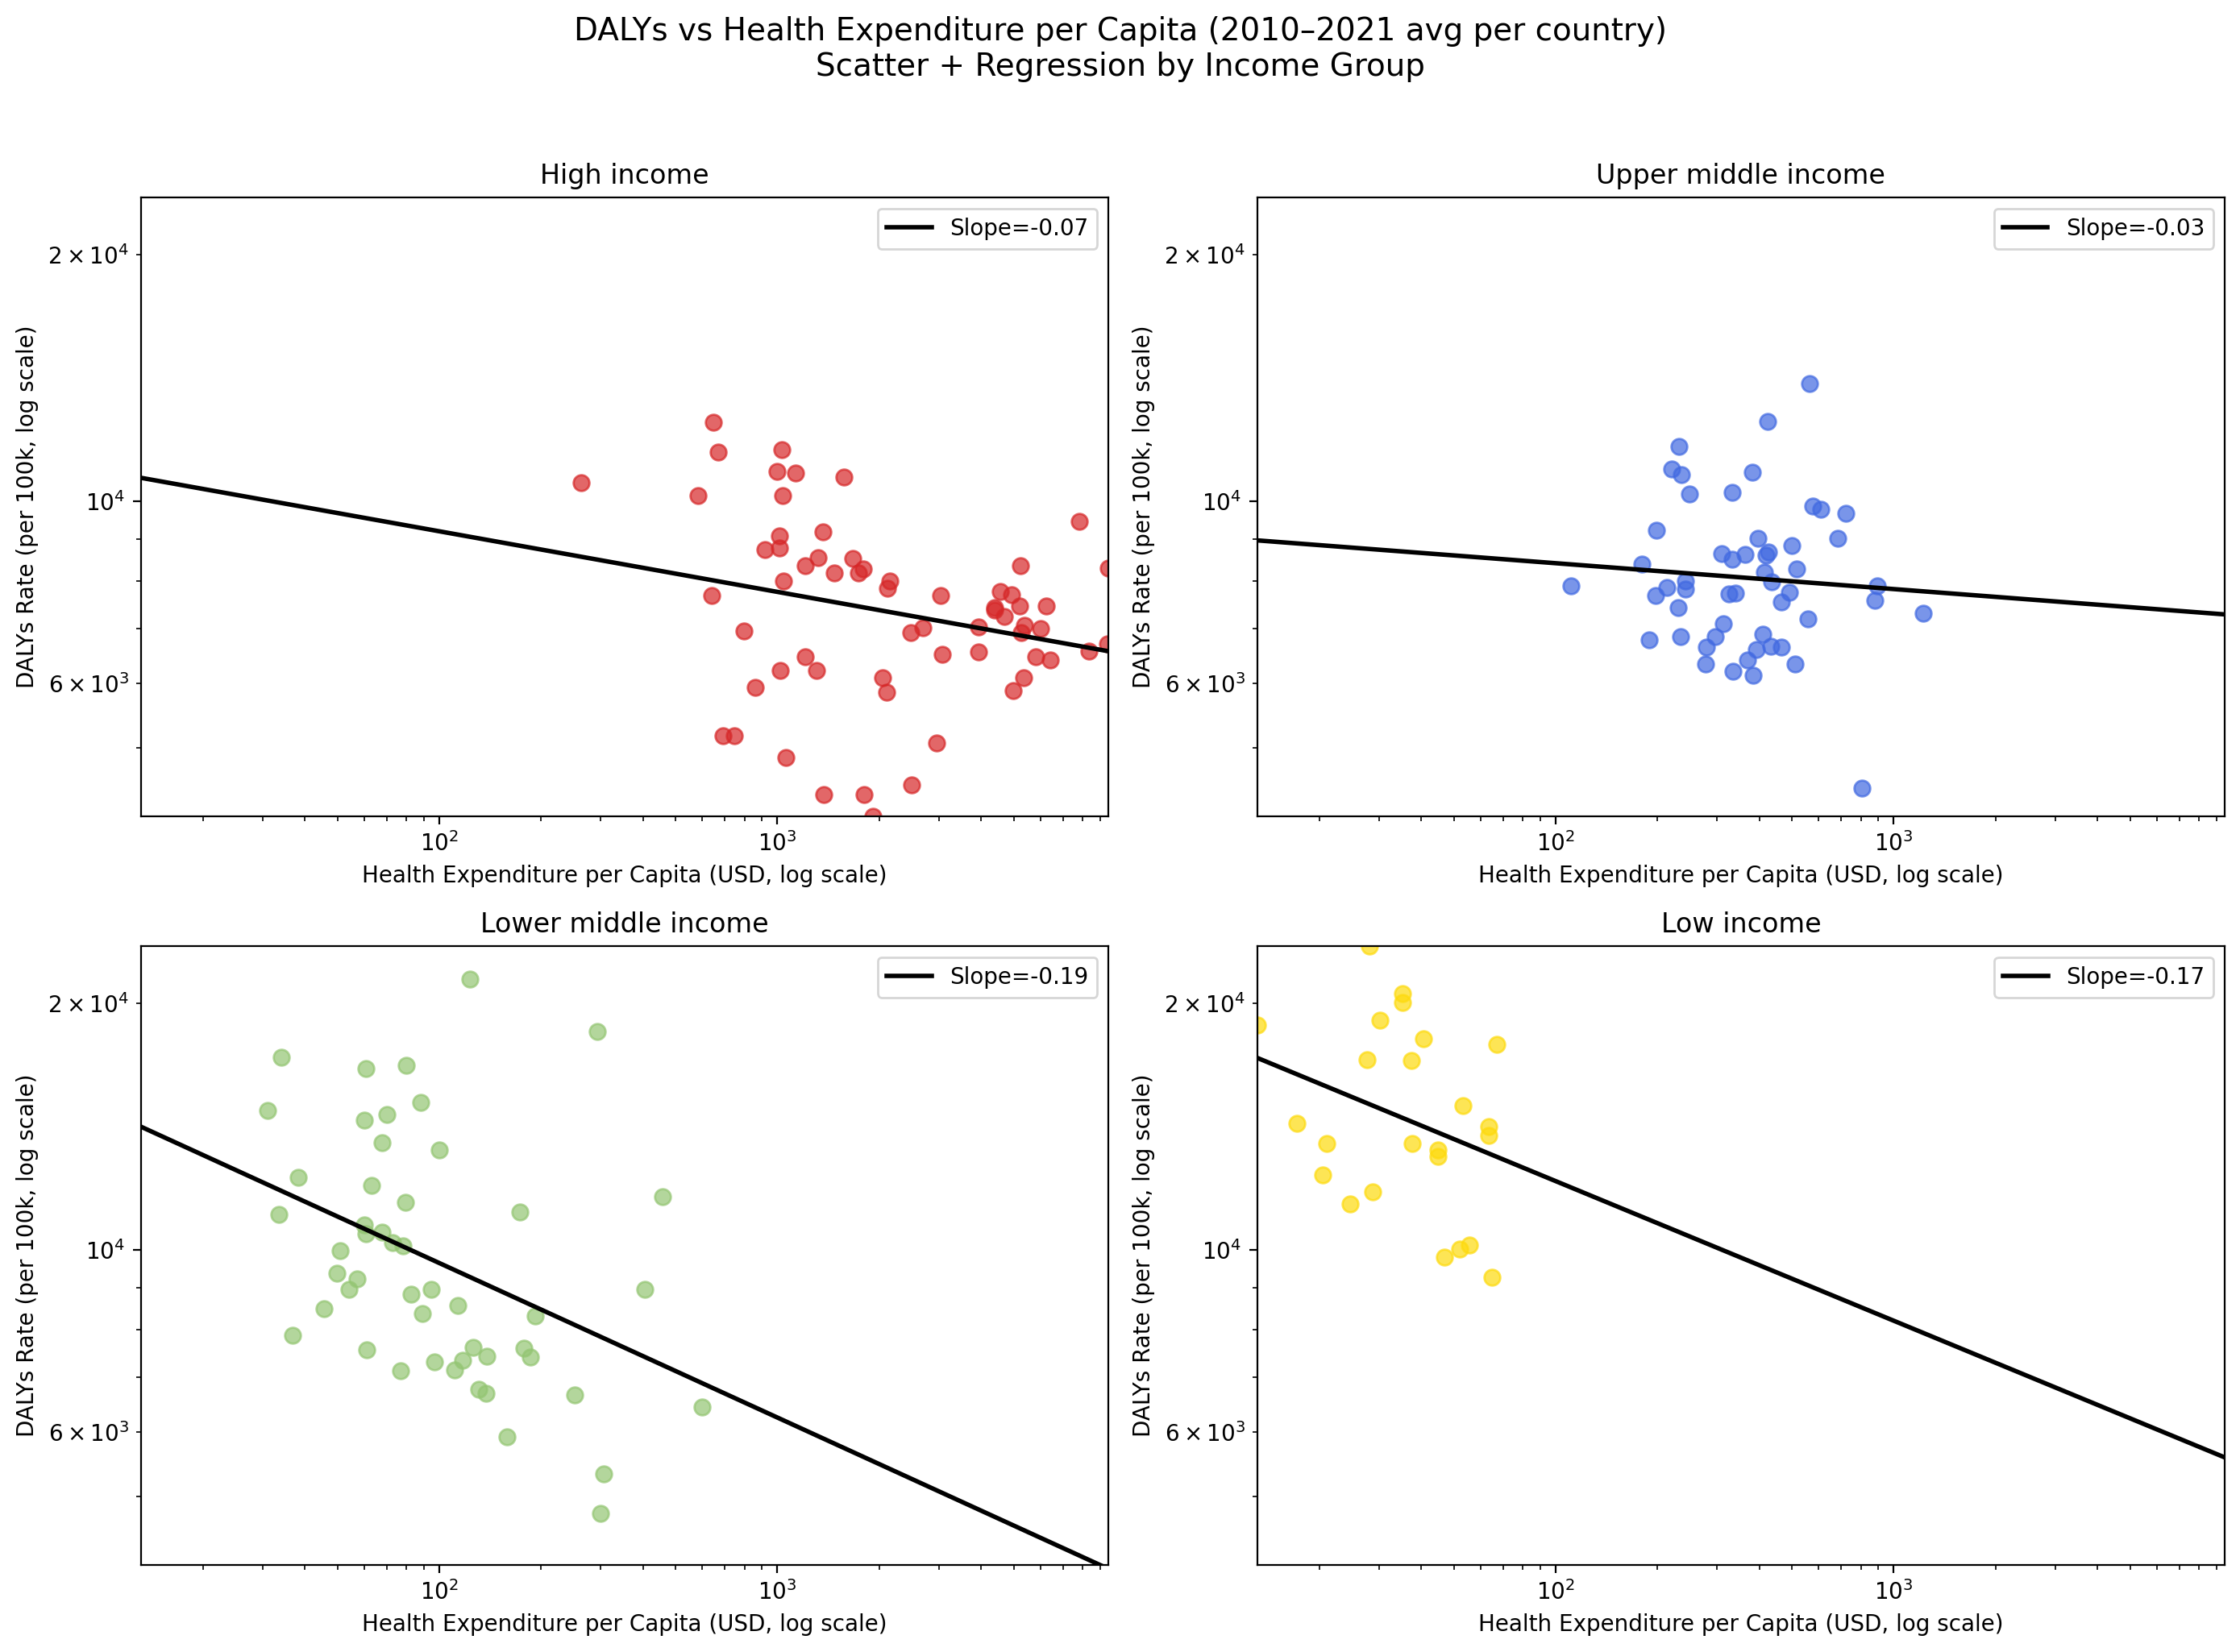

In [29]:
# --- Block 3.1: DALYs vs Health Expenditure (global, by income group) aggregate by country---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# --- Aggregate yearly DALYs & Health Expenditure per country ---
df_merge_avg = (
    df_merge.groupby(['Country Code','IncomeGroup'], as_index=False)
    .agg({
        'HE_per_capita':'mean',   # average Health Expenditure 2010-2021
        'DALYs_rate':'mean'       # average all-cause DALYs 2010-2021
    })
)

# --- Log transformation for regression / plotting ---
df_merge_avg['log_HE'] = np.log(df_merge_avg['HE_per_capita'])
df_merge_avg['log_DALY'] = np.log(df_merge_avg['DALYs_rate'])

# --- Custom income group order (fixed for subplot layout) ---
income_groups = ['High income', 'Upper middle income', 'Lower middle income', 'Low income']
colors = {
    'High income':'#d62728',
    'Upper middle income':'#4169E1',
    'Lower middle income':'#93C572',
    'Low income':'#FDDA0D'
}

fig, axes = plt.subplots(2, 2, figsize=(14,10), dpi=200)
axes = axes.flatten()  # [0]=top-left, [1]=top-right, [2]=bottom-left, [3]=bottom-right

x_min, x_max = df_merge_avg['HE_per_capita'].min(), df_merge_avg['HE_per_capita'].max()
y_min, y_max = df_merge_avg['DALYs_rate'].min(), df_merge_avg['DALYs_rate'].max()

for ax, ig in zip(axes, income_groups):
    sub = df_merge_avg[df_merge_avg['IncomeGroup']==ig]
    if sub.shape[0]==0:
        ax.set_title(f"{ig} (no data)")
        continue

    # Scatter
    ax.scatter(sub['HE_per_capita'], sub['DALYs_rate'],
               color=colors[ig], alpha=0.7, s=50)

    # Regression in log-log
    X = sm.add_constant(sub['log_HE'])
    ols = sm.OLS(sub['log_DALY'], X).fit()
    he_line = np.linspace(x_min, x_max, 100)
    log_pred = ols.params['const'] + ols.params['log_HE'] * np.log(he_line)
    ax.plot(he_line, np.exp(log_pred), color='black', lw=2,
            label=f"Slope={ols.params['log_HE']:.2f}")

    # Axis setup
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(ig)
    ax.set_xlabel('Health Expenditure per Capita (USD, log scale)')
    ax.set_ylabel('DALYs Rate (per 100k, log scale)')
    ax.legend()

fig.suptitle('DALYs vs Health Expenditure per Capita (2010–2021 avg per country)\nScatter + Regression by Income Group',
             fontsize=14, y=1.02)
plt.tight_layout()
plt.show()


/tmp/ipython-input-909573113.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


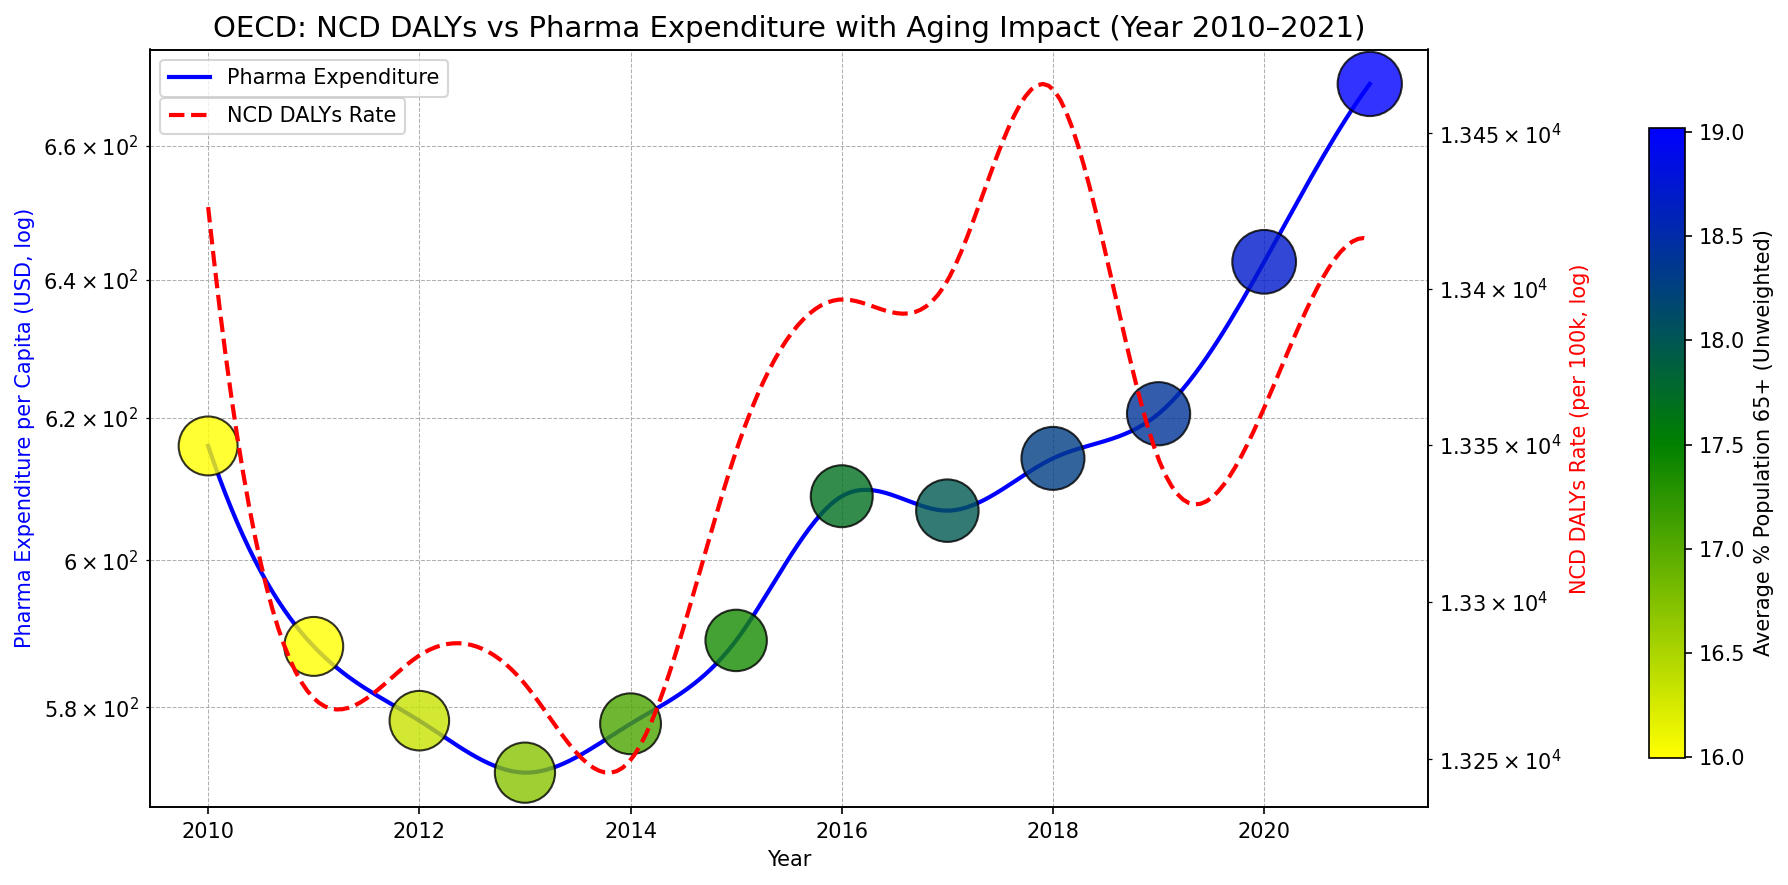

In [39]:
# ==========================
# Block 3.2 – OECD: NCD DALYs vs Pharma Expenditure + Aging Impact
# ==========================

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.cm as cm
from scipy.interpolate import make_interp_spline

# --- Custom colormap: yellow -> green -> blue ---
cmap_custom = LinearSegmentedColormap.from_list(
    'YellowGreenBlue', ['yellow', 'green', 'blue']
)

# --- OECD countries ---
oecd_countries = df_hexp[df_hexp['IncomeGroup']=='High income']['Country Code'].unique()

# --- NCD DALYs ---
df_ncd = df_dalys[
    (df_dalys['cause_name'] == 'Non-communicable diseases') &
    (df_dalys['metric_name'] == 'Rate') &
    (df_dalys['Country Code'].isin(oecd_countries))
].copy()
df_ncd['DALYs_rate'] = pd.to_numeric(df_ncd['val'], errors='coerce')
df_ncd = df_ncd[['Country Code','year','DALYs_rate']]

# --- Pharma Expenditure ---
df_pharma_clean = df_pharma.copy()
df_pharma_clean['Pharma_exp'] = pd.to_numeric(df_pharma_clean['US dollars/capita'], errors='coerce')
df_pharma_clean = df_pharma_clean[df_pharma_clean['Country Code'].isin(oecd_countries)]

# --- Population 65+ (reshape to long by year) ---
df_pop65_long = df_pop65.melt(
    id_vars=['Country Code'],
    var_name='Year',
    value_name='Pop65pct'
)
df_pop65_long['year'] = pd.to_numeric(df_pop65_long['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
df_pop65_long['Pop65pct'] = pd.to_numeric(df_pop65_long['Pop65pct'], errors='coerce')
df_pop65_long = df_pop65_long.dropna(subset=['year','Pop65pct'])
df_pop65_long = df_pop65_long[['Country Code','year','Pop65pct']]

# --- Merge ---
df_merge = pd.merge(df_ncd, df_pharma_clean, left_on=['Country Code','year'], right_on=['Country Code','Year'], how='inner')
df_merge = pd.merge(df_merge, df_pop65_long, on=['Country Code','year'], how='left')

# --- Aggregate per year ---
df_agg = df_merge.groupby('year', as_index=False).agg({
    'Pharma_exp':'mean',
    'DALYs_rate':'mean',
    'Pop65pct':'mean'
}).rename(columns={'Pop65pct':'Pop65pct_unweighted'})

# --- Filter positive values ---
df_agg = df_agg[(df_agg['Pharma_exp']>0) & (df_agg['DALYs_rate']>0) & (df_agg['Pop65pct_unweighted']>0)]

# --- Smooth lines ---
x = df_agg['year']
x_smooth = np.linspace(x.min(), x.max(), 200)
spl_pharma = make_interp_spline(x, df_agg['Pharma_exp'], k=3)
y_pharma_smooth = spl_pharma(x_smooth)
spl_dalys = make_interp_spline(x, df_agg['DALYs_rate'], k=3)
y_dalys_smooth = spl_dalys(x_smooth)

# --- Bubble size & color (ใช้ unweighted Pop65) ---
bubble_scale = 50
bubble_size = df_agg['Pop65pct_unweighted'] * bubble_scale
norm = Normalize(vmin=df_agg['Pop65pct_unweighted'].min(), vmax=df_agg['Pop65pct_unweighted'].max())

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6), dpi=150)
ax2 = ax1.twinx()

# Bubble + line Pharma
sc = ax1.scatter(df_agg['year'], df_agg['Pharma_exp'], s=bubble_size,
                 c=df_agg['Pop65pct_unweighted'], cmap=cmap_custom, norm=norm,
                 alpha=0.8, edgecolor='k', zorder=3)
ax1.plot(x_smooth, y_pharma_smooth, color='blue', lw=2, zorder=2, label='Pharma Expenditure')

# Line DALYs
ax2.plot(x_smooth, y_dalys_smooth, color='red', lw=2, linestyle='--', label='NCD DALYs Rate', zorder=4)

# Axis labels & colors
ax1.set_xlabel('Year')
ax1.set_ylabel('Pharma Expenditure per Capita (USD, log)', color='blue')
ax1.tick_params(axis='y', colors='blue')
ax2.set_ylabel('NCD DALYs Rate (per 100k, log)', color='red')
ax2.tick_params(axis='y', colors='red')

# Log scale
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.title('OECD: NCD DALYs vs Pharma Expenditure with Aging Impact (Year 2010–2021)', fontsize=14)
ax1.grid(True, which='both', ls='--', lw=0.5)

# Legend
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0), fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95), fontsize=10)

# --- Colorbar สำหรับ population 65+ ---
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_custom), cax=cax)
cbar.set_label('Average % Population 65+ (Unweighted)', fontsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


/tmp/ipython-input-846544474.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


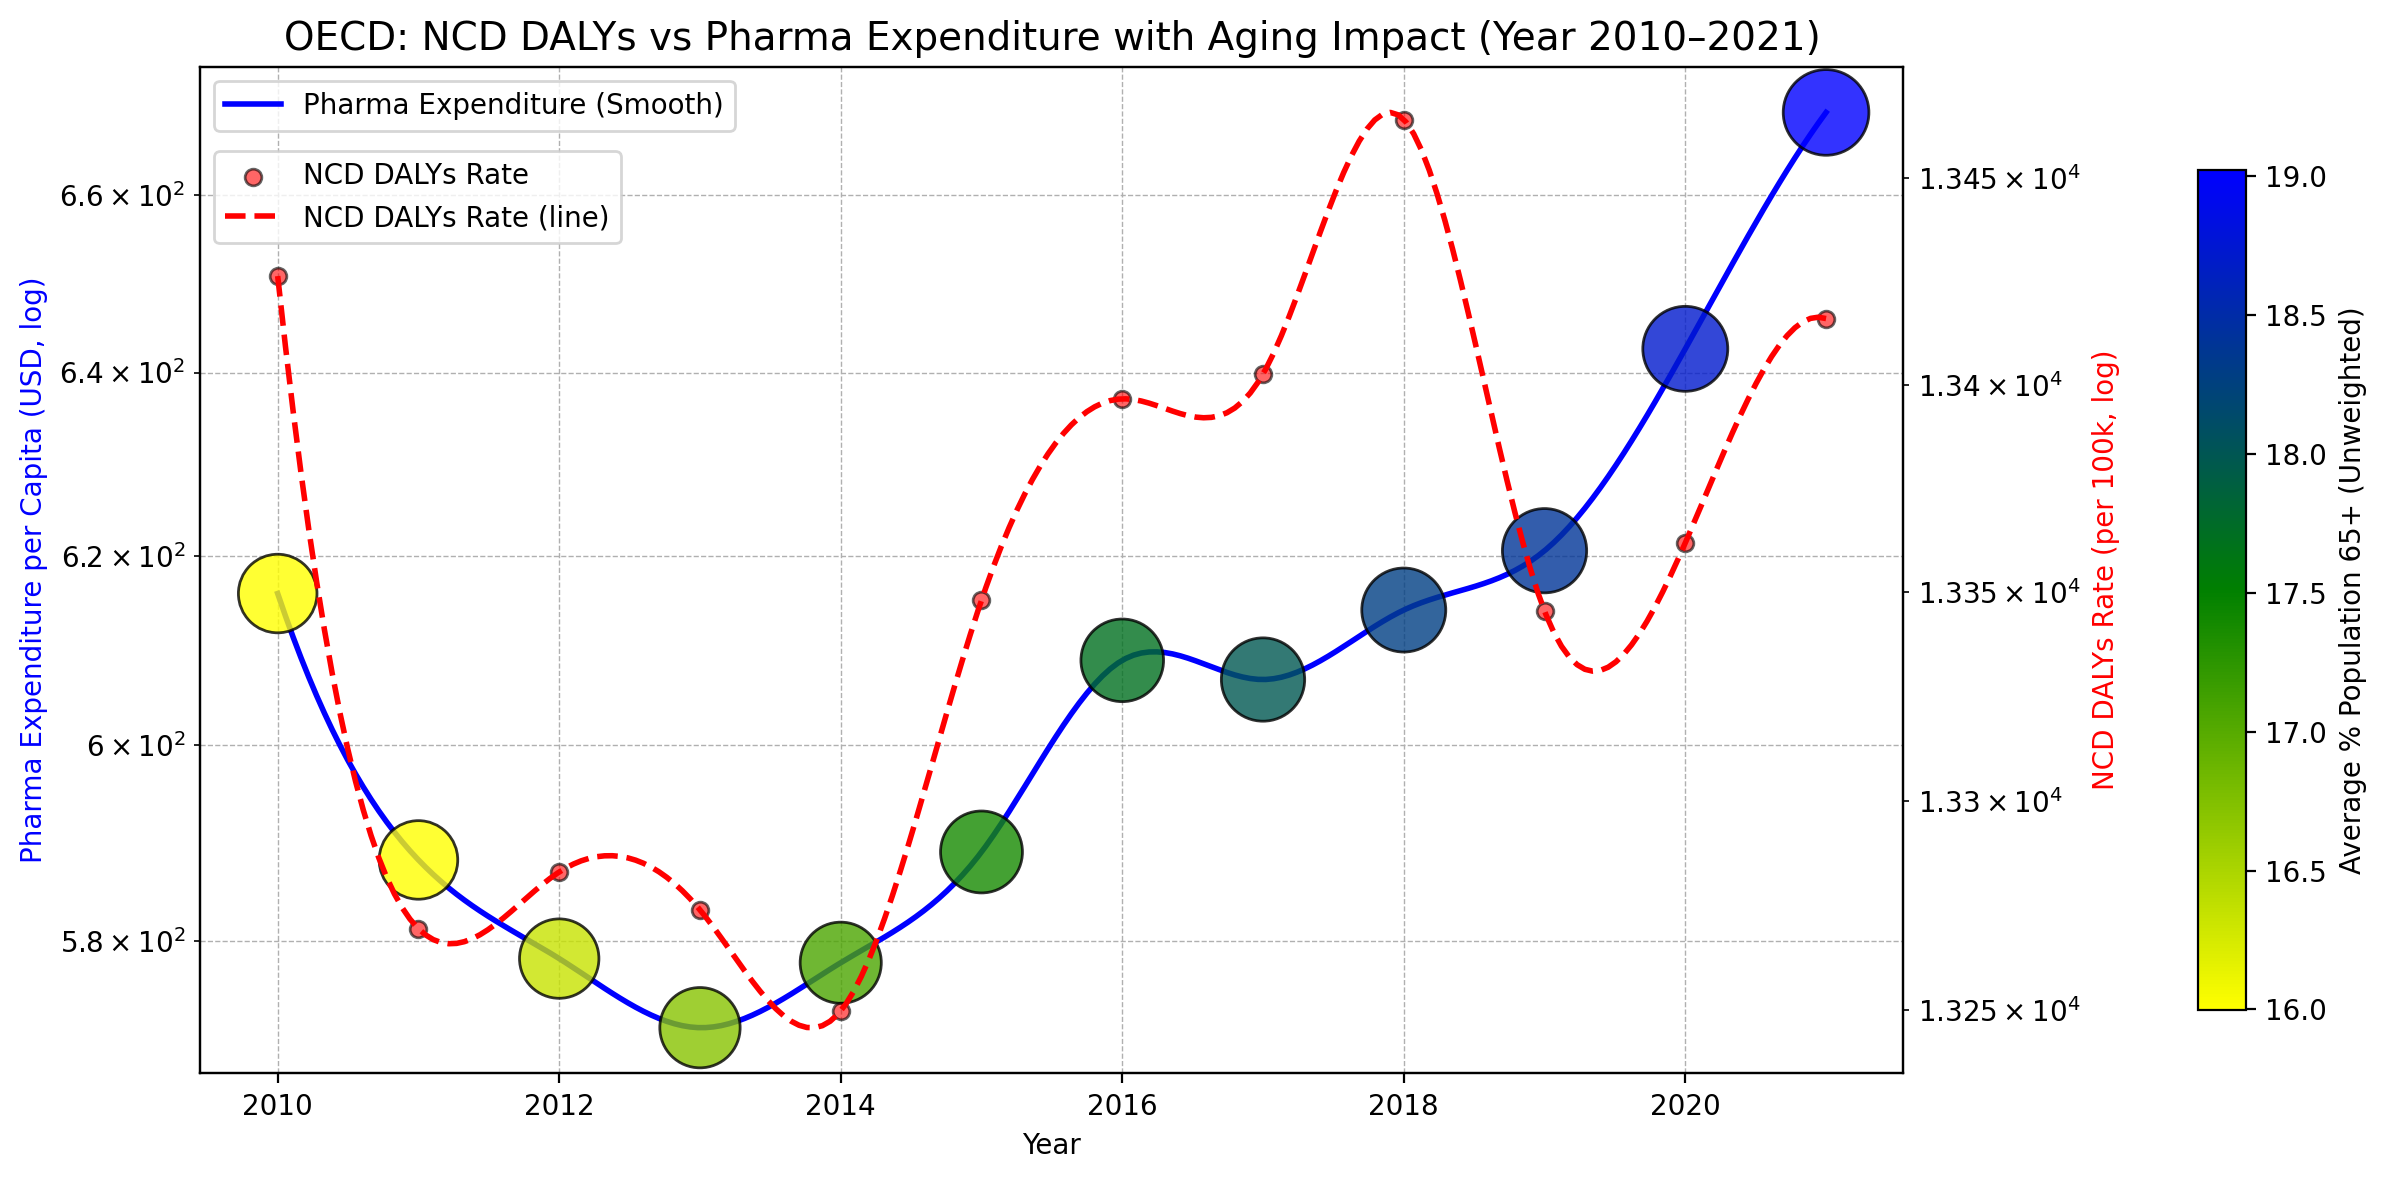

In [40]:
# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6), dpi=200)
ax2 = ax1.twinx()

# --- Pharma Expenditure ---
# 1. Scatter จุดจริง
sc = ax1.scatter(df_agg['year'], df_agg['Pharma_exp'], s=bubble_size,
                 c=df_agg['Pop65pct_unweighted'], cmap=cmap_custom, norm=norm,
                 alpha=0.8, edgecolor='k', zorder=3)

# 2. Smooth line
ax1.plot(x_smooth, y_pharma_smooth, color='blue', lw=2, zorder=2, label='Pharma Expenditure (Smooth)')

# --- NCD DALYs Rate ---
# 1. Scatter จุดจริง
ax2.scatter(df_agg['year'], df_agg['DALYs_rate'], color='red', edgecolor='k', alpha=0.6, zorder=4, label='NCD DALYs Rate')

# 2. Smooth line
ax2.plot(x_smooth, y_dalys_smooth, color='red', lw=2, linestyle='--', zorder=5, label='NCD DALYs Rate (line)')

# --- Axis labels & colors ---
ax1.set_xlabel('Year')
ax1.set_ylabel('Pharma Expenditure per Capita (USD, log)', color='blue')
ax1.tick_params(axis='y', colors='blue')
ax2.set_ylabel('NCD DALYs Rate (per 100k, log)', color='red')
ax2.tick_params(axis='y', colors='red')

# --- Log scale ---
ax1.set_yscale('log')
ax2.set_yscale('log')

plt.title('OECD: NCD DALYs vs Pharma Expenditure with Aging Impact (Year 2010–2021)', fontsize=14)
ax1.grid(True, which='both', ls='--', lw=0.5)

# --- Legends ---
ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.0), fontsize=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.93), fontsize=10)

# --- Colorbar สำหรับ population 65+ ---
cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap_custom), cax=cax)
cbar.set_label('Average % Population 65+ (Unweighted)', fontsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()
